In [66]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
from scipy.stats import shapiro

In [2]:
# Read CSV
csvpath = "output_data/census.csv"
census_df = pd.read_csv(csvpath,index_col="datapoint")
census_df["Zipcode"] = census_df["Zipcode"].astype("category")
census_df

Year Zipcode  Total Population  White Population  Black Population  \
datapoint                                                                       
0          2012   48009             20153             18622               663   
1          2013   48009             20241             18620               765   
2          2015   48009             20489             18864               587   
3          2017   48009             20836             19063               580   
4          2020   48009             21277             19011               688   
...         ...     ...               ...               ...               ...   
1245       2017   49548             32694             23495              3522   
1246       2012   49548             30155             23134              3109   
1247       2015   49548             30234             22081              3032   
1248       2020   49548             33608             23289              3177   
1249       2016   49548             31938             23352              3422   

           Employed Count  Unemployed Count  Poverty Count  \
datapoint                                                    
0                 10031.0             489.0          797.0   
1                 10138.0             553.0          704.0   
2                 10669.0             407.0          827.0   
3                 10795.0             393.0          914.0   
4                 10729.0             362.0         1001.0   
...                   ...               ...            ...   
1245              16310.0             963.0         6656.0   
1246              13743.0            1895.0         6416.0   
1247              14715.0            1308.0         6056.0   
1248              17354.0             722.0         5203.0   
1249              15880.0            1157.0         6463.0   

           Poverty Count - White  Poverty Count - Black  Median Income  \
datapoint                                                                
0                          767.0                    0.0       100789.0   
1                          669.0                    0.0        98750.0   
2                          730.0                   37.0       108135.0   
3                          726.0                   92.0       114537.0   
4                          790.0                  114.0       126646.0   
...                          ...                    ...            ...   
1245                      4210.0                  932.0        45534.0   
1246                      4296.0                 1162.0        39926.0   
1247                      3203.0                  996.0        40895.0   
1248                      3357.0                  749.0        50763.0   
1249                      3915.0                  896.0        43343.0   

           Median Rent  Median Home Value   County  Adjusted Median Income  \
datapoint                                                                    
0                993.0           339600.0  Oakland           128472.019282   
1               1070.0           347400.0  Oakland           124055.861168   
2               1121.0           410700.0  Oakland           133518.897062   
3               1223.0           467700.0  Oakland           136748.636321   
4               1498.0           538500.0  Oakland           143207.147803   
...                ...                ...      ...                     ...   
1245             695.0            82200.0     Kent            54364.200269   
1246             622.0            89700.0     Kent            50892.198969   
1247             648.0            78800.0     Kent            50494.800900   
1248             768.0           106800.0     Kent            57401.137374   
1249             664.0            80200.0     Kent            52850.732124   

           Adjusted Median Rent  Adjusted Median Home Value  
datapoint                                                    
0                   1265.740459               43

In [3]:
# Create column in DF for ratios of White/Black population and poverty counts AND employed / unemployed
for i in census_df.index:
    census_df.at[i,"% Black Population"] = 100*(census_df.at[i,"Black Population"] / census_df.at[i,"Total Population"])
    census_df.at[i,"% White Population"] = 100*(census_df.at[i,"White Population"] / census_df.at[i,"Total Population"])
    census_df.at[i,"% Unemployed"]       = 100*(census_df.at[i,"Unemployed Count"] / census_df.at[i,"Total Population"])
    census_df.at[i, "% Black Poverty"]   = 100*(census_df.at[i,"Poverty Count - Black"] / census_df.at[i,"Poverty Count"])
    census_df.at[i, "% White Poverty"]   = 100*(census_df.at[i,"Poverty Count - White"] / census_df.at[i,"Poverty Count"])
census_df

Year Zipcode  Total Population  White Population  Black Population  \
datapoint                                                                       
0          2012   48009             20153             18622               663   
1          2013   48009             20241             18620               765   
2          2015   48009             20489             18864               587   
3          2017   48009             20836             19063               580   
4          2020   48009             21277             19011               688   
...         ...     ...               ...               ...               ...   
1245       2017   49548             32694             23495              3522   
1246       2012   49548             30155             23134              3109   
1247       2015   49548             30234             22081              3032   
1248       2020   49548             33608             23289              3177   
1249       2016   49548             31938             23352              3422   

           Employed Count  Unemployed Count  Poverty Count  \
datapoint                                                    
0                 10031.0             489.0          797.0   
1                 10138.0             553.0          704.0   
2                 10669.0             407.0          827.0   
3                 10795.0             393.0          914.0   
4                 10729.0             362.0         1001.0   
...                   ...               ...            ...   
1245              16310.0             963.0         6656.0   
1246              13743.0            1895.0         6416.0   
1247              14715.0            1308.0         6056.0   
1248              17354.0             722.0         5203.0   
1249              15880.0            1157.0         6463.0   

           Poverty Count - White  Poverty Count - Black  ...  \
datapoint                                                ...   
0                          767.0                    0.0  ...   
1                          669.0                    0.0  ...   
2                          730.0                   37.0  ...   
3                          726.0                   92.0  ...   
4                          790.0                  114.0  ...   
...                          ...                    ...  ...   
1245                      4210.0                  932.0  ...   
1246                      4296.0                 1162.0  ...   
1247                      3203.0                  996.0  ...   
1248                      3357.0                  749.0  ...   
1249                      3915.0                  896.0  ...   

           Median Home Value   County  Adjusted Median Income  \
datapoint                                                       
0                   339600.0  Oakland           128472.019282   
1                   347400.0  Oakland           124055.861168   
2                   410700.0  Oakland           133518.897062   
3                   467700.0  Oakland           136748.636321   
4                   538500.0  Oakland           143207.147803   
...                      ...      ...                     ...   
1245                 82200.0     Kent            54364.200269   
1246                 89700.0     Kent            50892.198969   
1247                 78800.0     Kent            50494.800900   
1248                106800.0     Kent            57401.137374   
1249                 80200.0     Kent            52850.732124   

          Adjusted Median Rent  Adjusted Median Home Value  \
datapoint                                                    
0                  1265.740459               432875.589083   
1                  1344.200217               436425.378933   
2                  1384.146517               507108.808651   
3                  1460.170794               558398.920937   
4                  1693.889325               608918.158424   
...                        ...       

In [4]:
# Create separate DFs for each county
oakland_data = pd.DataFrame(census_df.loc[census_df["County"] == "Oakland"])
kent_data = pd.DataFrame(census_df.loc[census_df["County"] == "Kent"])
saginaw_data = pd.DataFrame(census_df.loc[census_df["County"] == "Saginaw"])

# Ensure zipcodes are categorical
oakland_data["Zipcode"] = oakland_data["Zipcode"].astype("object")
kent_data["Zipcode"] = kent_data["Zipcode"].astype("object")
saginaw_data["Zipcode"] = saginaw_data["Zipcode"].astype("object")

# Export separate dataframes for use in Map Plots ipynb 
oakland_data.to_csv("output_data/oakland_data.csv",index_label="datapoint")
kent_data.to_csv("output_data/kent_data.csv",index_label="datapoint")
saginaw_data.to_csv("output_data/saginaw_data.csv",index_label="datapoint")

In [72]:
# Determine if any of the datasets are normally distributed
oakland_shapiro_df = pd.DataFrame({"Total Population": [shapiro(oakland_data["Total Population"])],
                                   "Adjusted Median Income": [shapiro(oakland_data["Adjusted Median Income"])] ,
                                   "Adjusted Median Rent": [shapiro(oakland_data["Adjusted Median Rent"])] ,
                                   "Adjusted Median Home Value": [shapiro(oakland_data["Adjusted Median Home Value"])] ,
                                   "% Black Population": [shapiro(oakland_data["% Black Population"])] ,
                                   "% White Population": [shapiro(oakland_data["% White Population"])] ,
                                   "% Unemployed": [shapiro(oakland_data["% Unemployed"])] , 
                                   "% Black Poverty":  [shapiro(oakland_data["% Black Poverty"])],
                                   "% White Poverty": [shapiro(oakland_data["% White Poverty"])]
                                  })
oakland_shapiro_df

## None of the p values (second number) are over .05, so the data does not come from a normal distribution

Total Population  \
0  (0.9829899072647095, 6.007644515193533e-07)   

                         Adjusted Median Income  \
0  (0.9850981831550598, 2.9024276955169626e-06)   

                          Adjusted Median Rent  \
0  (0.9205539226531982, 3.780136817209144e-18)   

                     Adjusted Median Home Value  \
0  (0.9804571866989136, 1.0337661393577946e-07)   

                            % Black Population  \
0  (0.6024346351623535, 2.734817489597544e-36)   

                          % White Population  \
0  (0.798740565776825, 8.18224692414609e-28)   

                                  % Unemployed  \
0  (0.9170214533805847, 1.493541184003802e-18)   

                                % Black Poverty  \
0  (0.7495205402374268, 2.0794583463221448e-30)   

                                % White Poverty  
0  (0.8959997296333313, 1.0083114370551899e-20)

In [73]:
# Determine if any of the datasets are normally distributed
saginaw_shapiro_df = pd.DataFrame({"Total Population": [shapiro(saginaw_data["Total Population"])],
                                   "Adjusted Median Income": [shapiro(saginaw_data["Adjusted Median Income"])] ,
                                   "Adjusted Median Rent": [shapiro(saginaw_data["Adjusted Median Rent"])] ,
                                   "Adjusted Median Home Value": [shapiro(saginaw_data["Adjusted Median Home Value"])] ,
                                   "% Black Population": [shapiro(saginaw_data["% Black Population"])] ,
                                   "% White Population": [shapiro(saginaw_data["% White Population"])] ,
                                   "% Unemployed": [shapiro(saginaw_data["% Unemployed"])] , 
                                   "% Black Poverty":  [shapiro(saginaw_data["% Black Poverty"])],
                                   "% White Poverty": [shapiro(saginaw_data["% White Poverty"])]
                                  })
saginaw_shapiro_df
## None of the p values (second number) are over .05, so the data does not come from a normal distribution

Total Population  \
0  (0.78984135389328, 1.2240926415747573e-17)   

                        Adjusted Median Income  \
0  (0.9703394770622253, 4.526455086306669e-05)   

                          Adjusted Median Rent  \
0  (0.9724913239479065, 9.221657091984525e-05)   

                     Adjusted Median Home Value  \
0  (0.9772344827651978, 0.00048494848306290805)   

                             % Black Population  \
0  (0.5146529674530029, 1.0299066609047832e-25)   

                             % White Population  \
0  (0.5821046829223633, 3.7675732564952275e-24)   

                                  % Unemployed  \
0  (0.9574605226516724, 9.987438716052566e-07)   

                                % Black Poverty  \
0  (0.6399199962615967, 1.2021384439258236e-22)   

                               % White Poverty  
0  (0.7496739625930786, 3.428189302649789e-19)

In [74]:
# Determine if any of the datasets are normally distributed
kent_shapiro_df = pd.DataFrame({"Total Population": [shapiro(kent_data["Total Population"])],
                                   "Adjusted Median Income": [shapiro(kent_data["Adjusted Median Income"])] ,
                                   "Adjusted Median Rent": [shapiro(kent_data["Adjusted Median Rent"])] ,
                                   "Adjusted Median Home Value": [shapiro(kent_data["Adjusted Median Home Value"])] ,
                                   "% Black Population": [shapiro(kent_data["% Black Population"])] ,
                                   "% White Population": [shapiro(kent_data["% White Population"])] ,
                                   "% Unemployed": [shapiro(kent_data["% Unemployed"])] , 
                                   "% Black Poverty":  [shapiro(kent_data["% Black Poverty"])],
                                   "% White Poverty": [shapiro(kent_data["% White Poverty"])]
                                  })
kent_shapiro_df
## None of the p values (second number) are over .05, so the data does not come from a normal distribution

Total Population  \
0  (0.9562539458274841, 5.295288119100405e-08)   

                         Adjusted Median Income  \
0  (0.8821704983711243, 1.0383693891161637e-14)   

                           Adjusted Median Rent  \
0  (0.8965504765510559, 1.0696739988994702e-13)   

                  Adjusted Median Home Value  \
0  (0.924335777759552, 1.99523297189641e-11)   

                           % Black Population  \
0  (0.727453351020813, 3.379025986520897e-22)   

                             % White Population  \
0  (0.8154786229133606, 1.6551756878166904e-18)   

                                   % Unemployed  \
0  (0.9685501456260681, 2.8070242024114123e-06)   

                               % Black Poverty  \
0  (0.8226539492607117, 3.748488886972865e-18)   

                              % White Poverty  
0  (0.919919490814209, 8.040207388759768e-12)

# Income in Each County, by Zipcode **Jonathan**

In [6]:
# Create scatter plot(s) for Income in each county


In [7]:
# Calculate the linear regression and correlation for each county's plot


In [8]:
# Add the linear regression line to the graph, if it makes sense (|r| > ?)


In [9]:
# Export final graph


# Home Values in Each County, by Zipcode **Tamica**

In [10]:
# Create scatter plot(s) for Home Values in each county


In [11]:
# Calculate the linear regression and correlation for each county's plot


In [12]:
# Add the linear regression line to the graph, if it makes sense (|r| > ?)


In [13]:
# Export final graph


# Rent Prices in Each County, by Zipcode **Stephanie**

In [14]:
# Create scatter plot(s) for Rent Prices in each county


In [15]:
# Calculate the linear regression and correlation for each county's plot


In [16]:
# Add the linear regression line to the graph, if it makes sense (|r| > ?)


In [17]:
# Export final graph


# Demographic Composition in Each County, by Zipcode **Rhi**

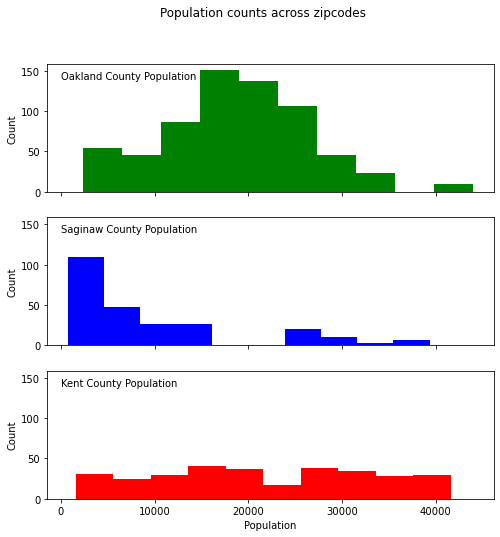

In [18]:
# Create histogram for population distribution across zipcodes
fig = plt.figure(figsize = (8,8))
ax1 = fig.add_subplot(311)
ax1.hist(oakland_data["Total Population"],color="green")
ax2 = fig.add_subplot(312,sharex=ax1, sharey=ax1)
ax2.hist(saginaw_data["Total Population"],color="blue")
ax3 = fig.add_subplot(313,sharex=ax1, sharey=ax1)
ax3.hist(kent_data["Total Population"],color="red")
ax1.text(.5,140,"Oakland County Population")
ax2.text(.5,140,"Saginaw County Population")
ax3.text(.5,140,"Kent County Population")
for ax in fig.get_axes():
    ax.set(xlabel="Population",ylabel="Count")
    ax.label_outer()
fig.suptitle("Population counts across zipcodes")
plt.savefig("output_data/overall_populations_across_counties")
plt.show()

In [19]:
# Create dataframes grouped by zipcode for zipcode analysis
oakland_grouped = oakland_data.groupby("Zipcode").median()
kent_grouped = kent_data.groupby("Zipcode").median()
saginaw_grouped = saginaw_data.groupby("Zipcode").median()

##  Oakland County Analyses

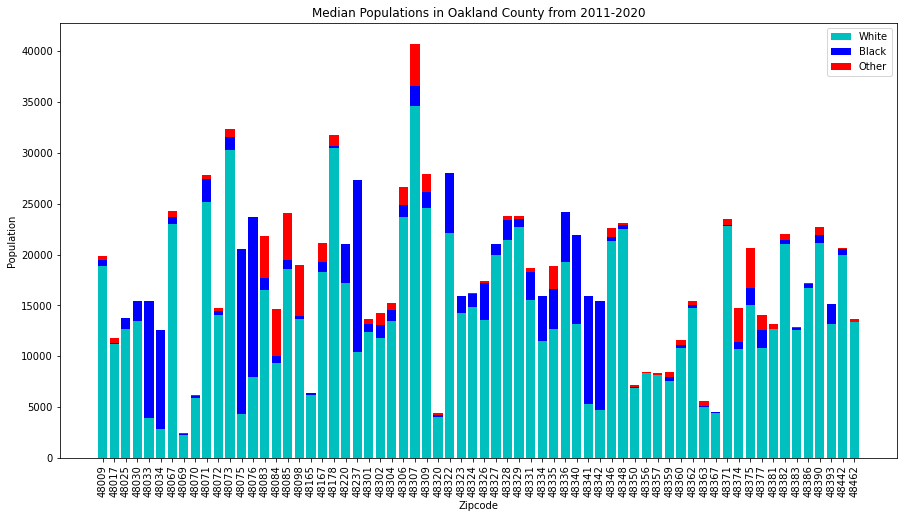

In [20]:
# Stacked bar chart for population by county

fig = plt.figure(figsize = (15,8))
xaxis = np.arange(0,len(oakland_grouped.index))
label = (oakland_grouped.index.tolist())
line1 = plt.bar(xaxis,oakland_grouped["White Population"],color='c',label="")
plt.xticks(ticks=xaxis,labels=label,rotation=90)
line3 = plt.bar(xaxis,(oakland_grouped["Total Population"]-oakland_grouped["Black Population"]-oakland_grouped["White Population"]),
                       label=label,bottom=oakland_grouped["White Population"],color='r')
line2 = plt.bar(xaxis,oakland_grouped["Black Population"],label=label,bottom=oakland_grouped["White Population"],color='b')
plt.legend([line1, line2,line3],["White","Black","Other"])
plt.xlabel("Zipcode")
plt.ylabel("Population")
plt.title("Median Populations in Oakland County from 2011-2020")
plt.savefig("output_data/populations_Oakland.png")
plt.show()


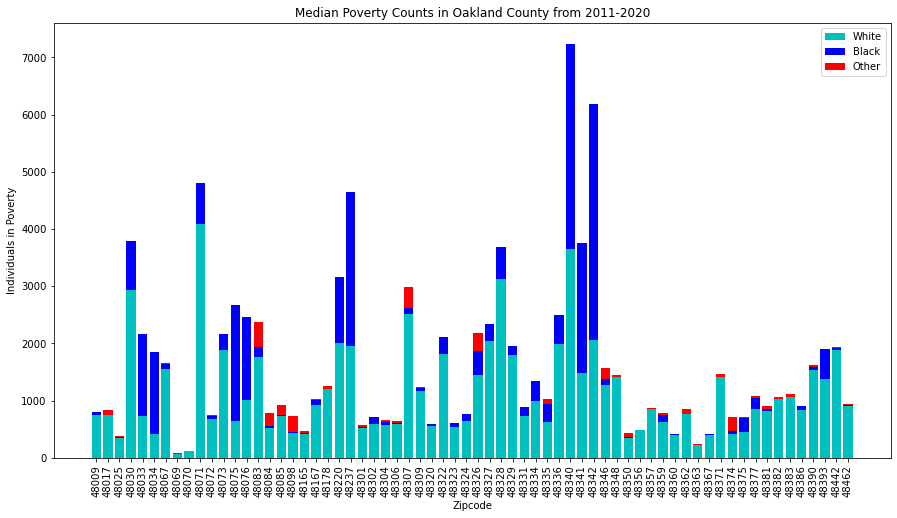

In [21]:
# Stacked bar chart for poverty rates
fig = plt.figure(figsize = (15,8))
xaxis = np.arange(0,len(oakland_grouped.index))
label = (oakland_grouped.index.tolist())
line1 = plt.bar(xaxis,oakland_grouped["Poverty Count - White"],color='c',label="")
plt.xticks(ticks=xaxis,labels=label,rotation=90)
line3 = plt.bar(xaxis,(oakland_grouped["Poverty Count"]-oakland_grouped["Poverty Count - Black"]-oakland_grouped["Poverty Count - White"]),
                       label=label,bottom=oakland_grouped["Poverty Count - White"],color='r')
line2 = plt.bar(xaxis,oakland_grouped["Poverty Count - Black"],label=label,bottom=oakland_grouped["Poverty Count - White"],color='b')
plt.legend([line1, line2,line3],["White","Black","Other"])
plt.xlabel("Zipcode")
plt.ylabel("Individuals in Poverty")
plt.title("Median Poverty Counts in Oakland County from 2011-2020")
plt.savefig("output_data/poverty_Oakland.png")
plt.show()

In [22]:
def time_analyses_stacked(df,col1,col2,col_total,labels,county):
    for zipcode in df["Zipcode"].unique():
        max_y = 1.1*(df[col_total].max())
        filtered = df.loc[df["Zipcode"] == zipcode]
        filtered = filtered.sort_values(by=["Zipcode","Year"])
        filtered["Other"] = filtered[col_total]-filtered[col1]-filtered[col2]
        
        fig = plt.figure(figsize = (15,8))
        line1 = plt.bar(filtered["Year"],filtered[col2],color='c')
        line3 = plt.bar(filtered["Year"],filtered["Other"],bottom=filtered[col2],color='r')
        line2 = plt.bar(filtered["Year"],filtered[col1],bottom=filtered[col2],color='b')
        plt.legend([line1, line2,line3],labels)
        plt.xlabel("Year")
        plt.ylabel(col_total)
        ax.set(ylim = [0, max_y])
        plt.title(col_total + " in "  + str(zipcode) + ", " + county + " County from 2011-2020")
        plt.savefig(f"output_data/zipcode_graphs/{county}_{col_total}_{str(zipcode)}")
        plt.show()

<Figure size 504x288 with 0 Axes>

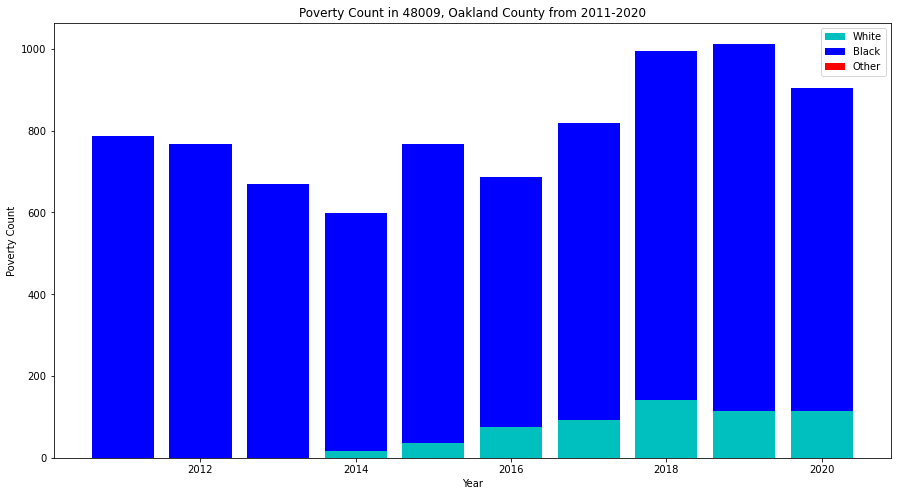

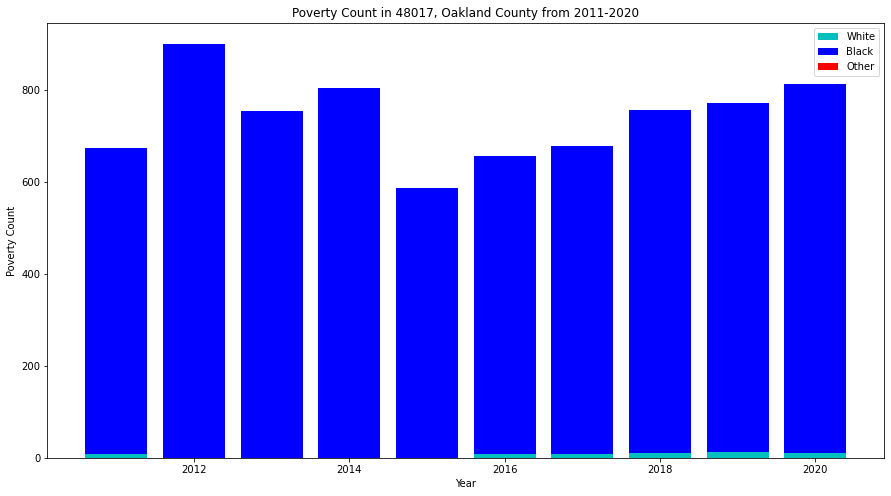

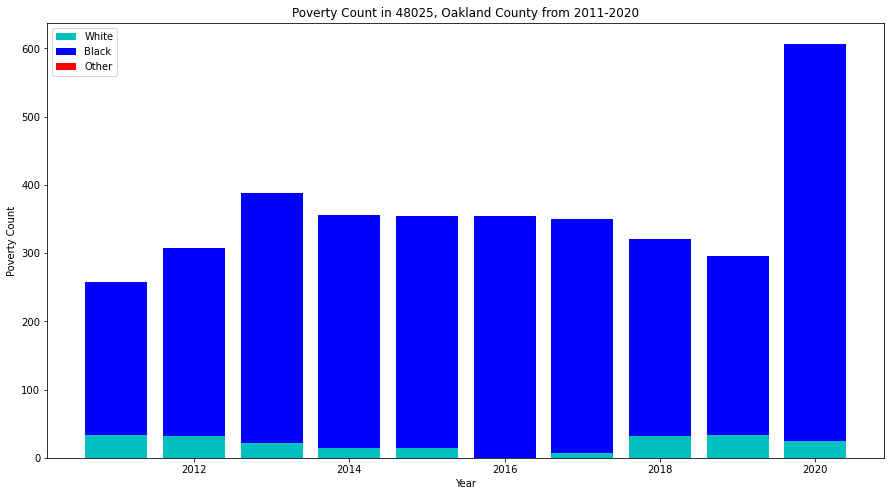

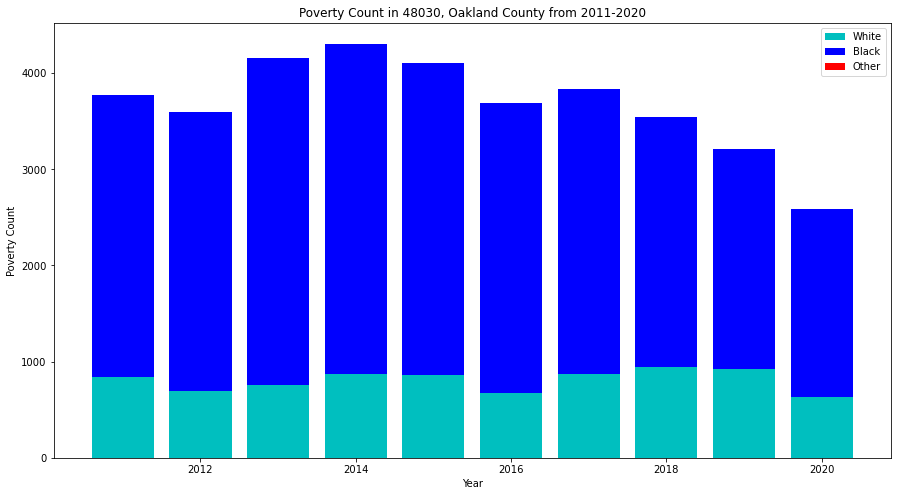

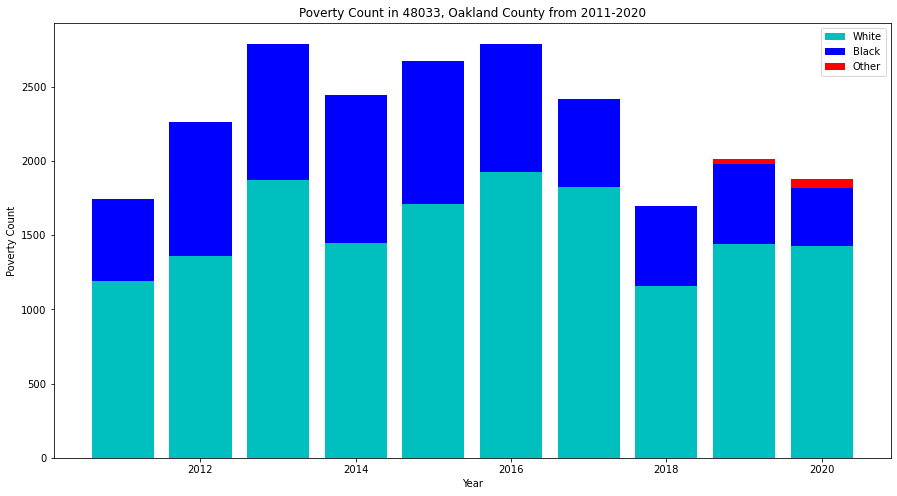

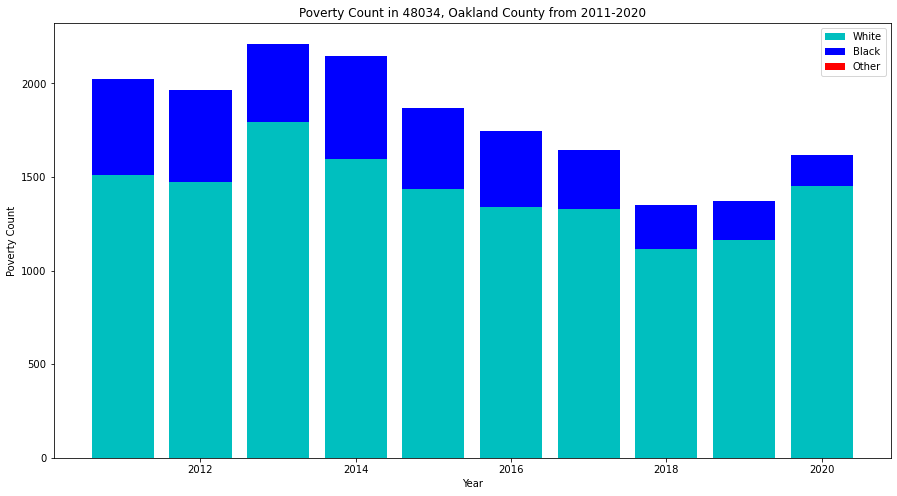

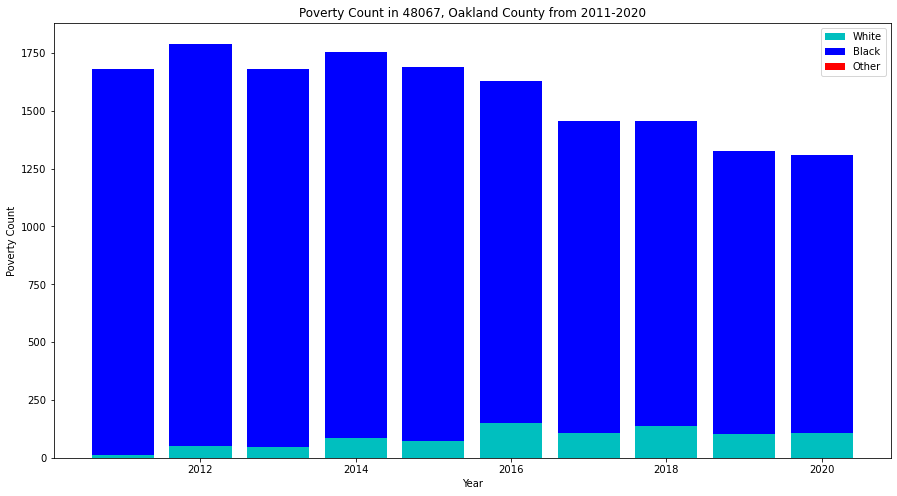

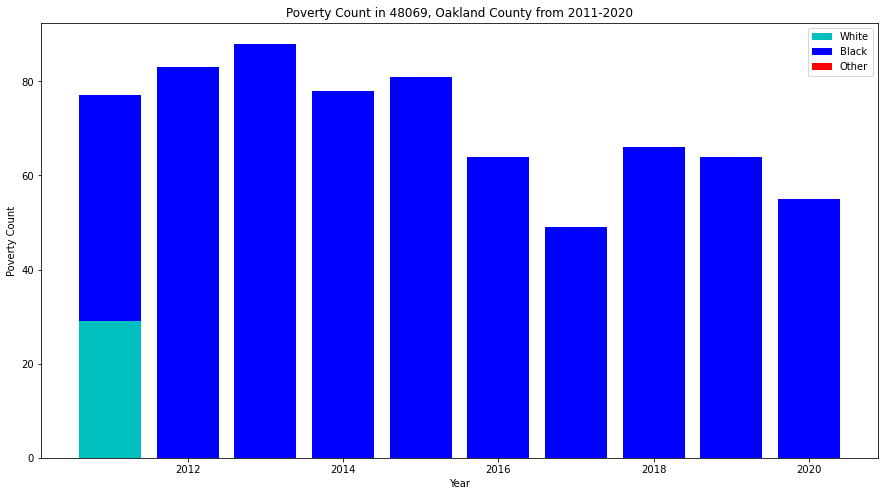

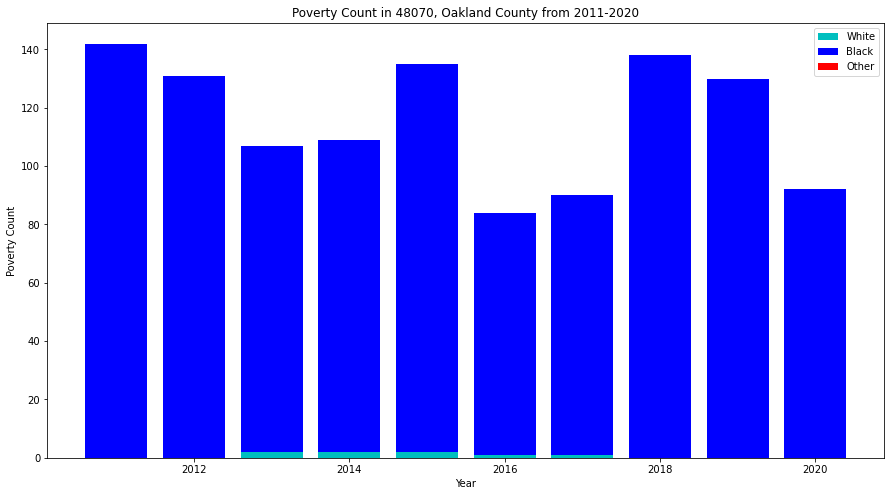

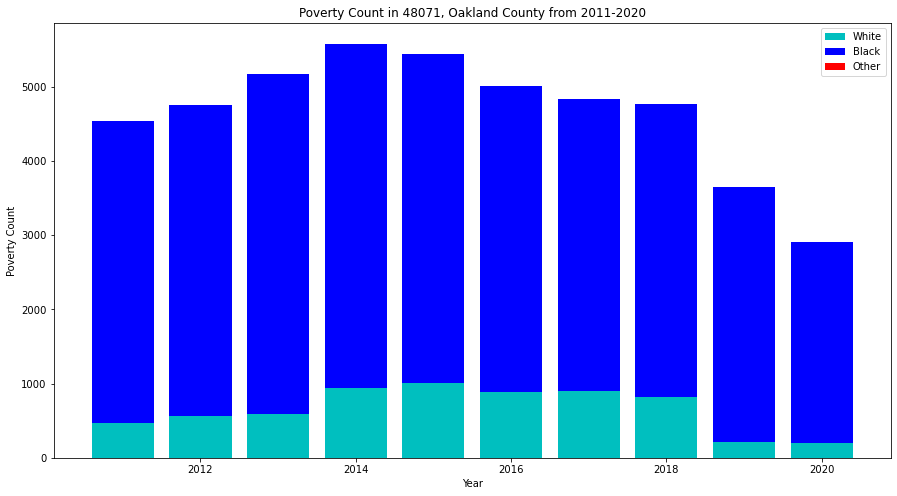

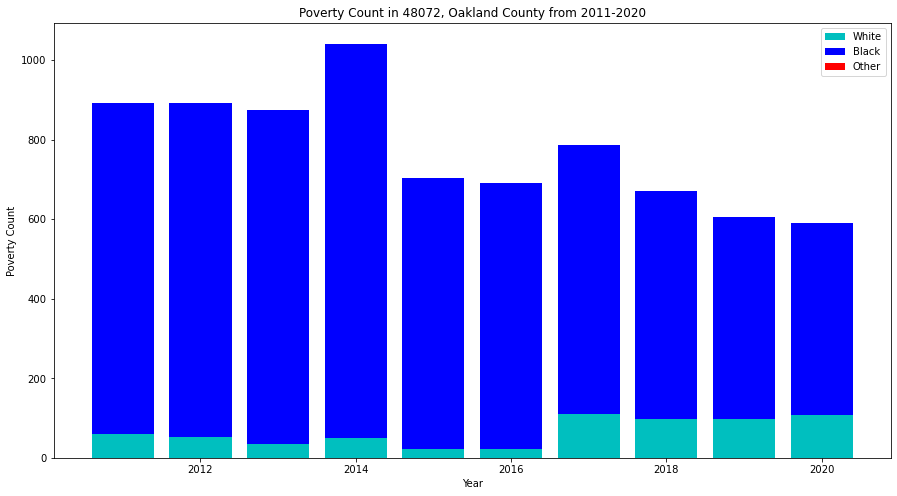

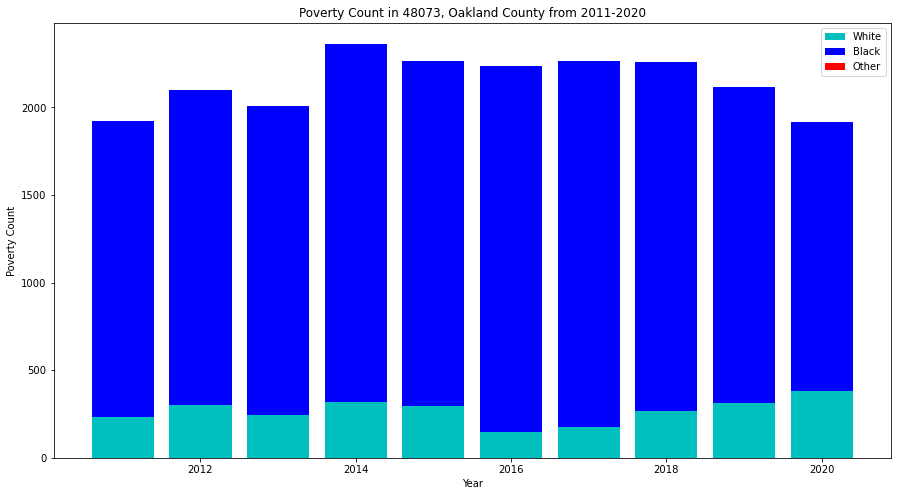

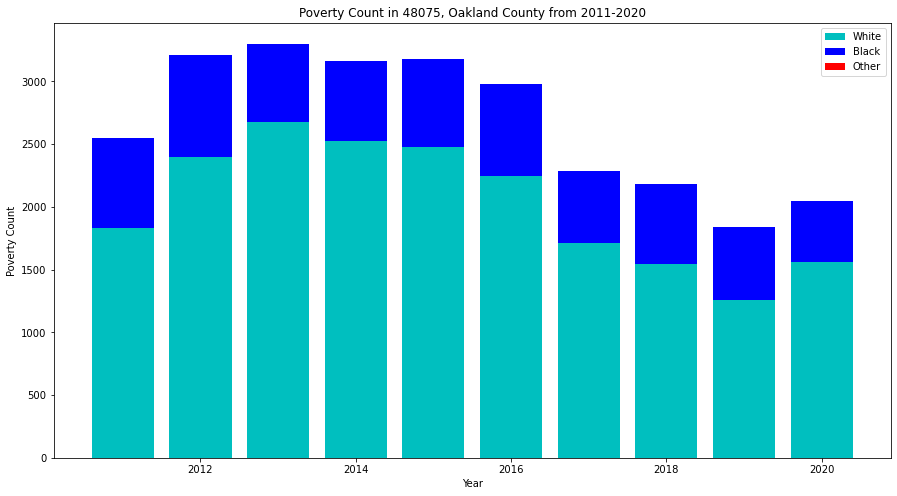

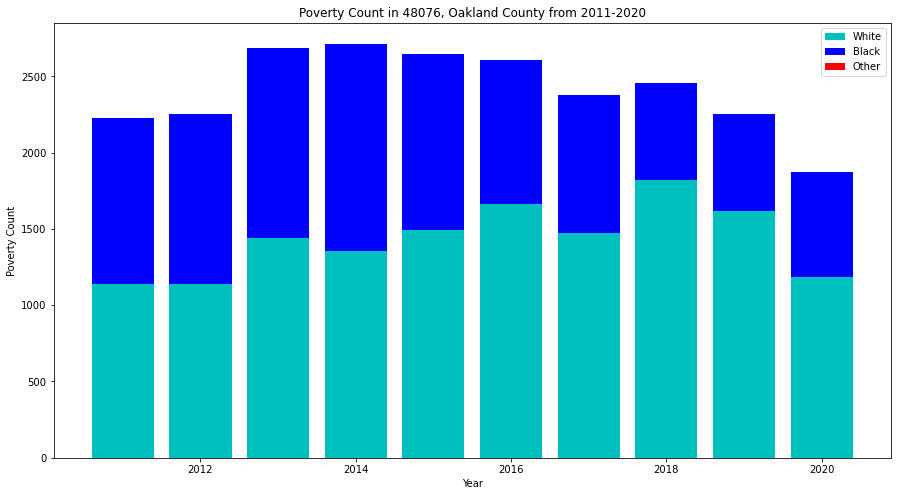

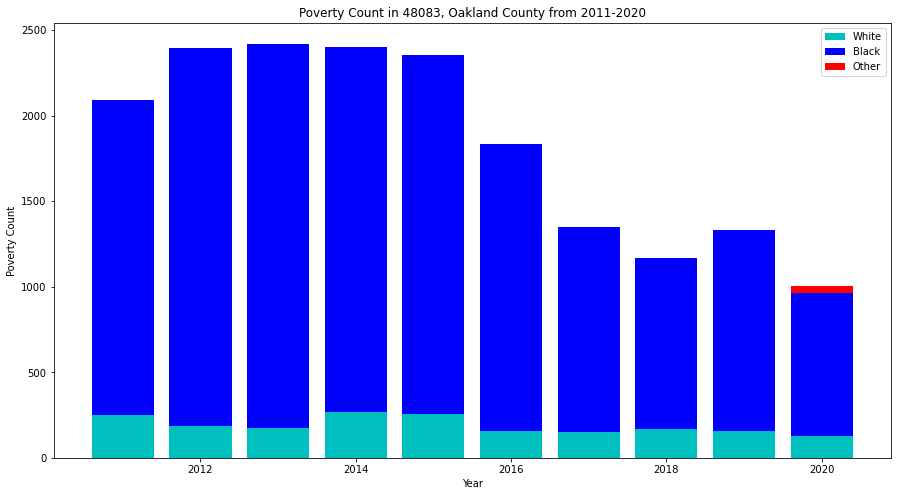

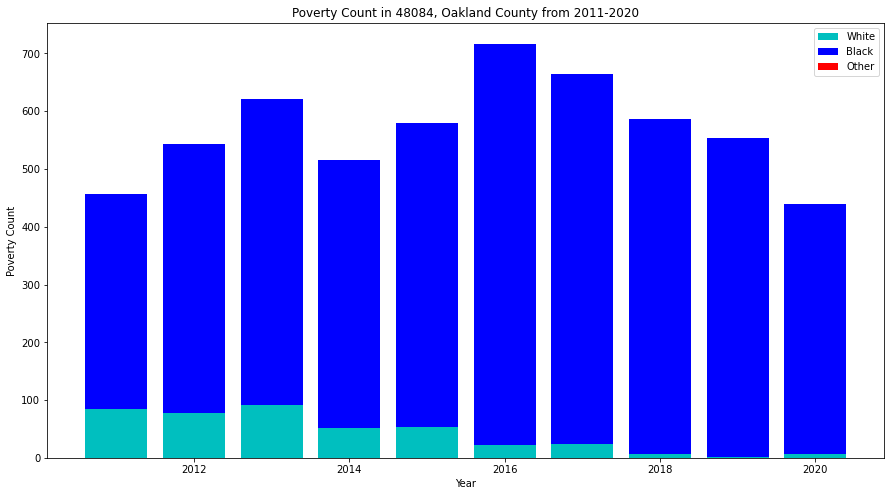

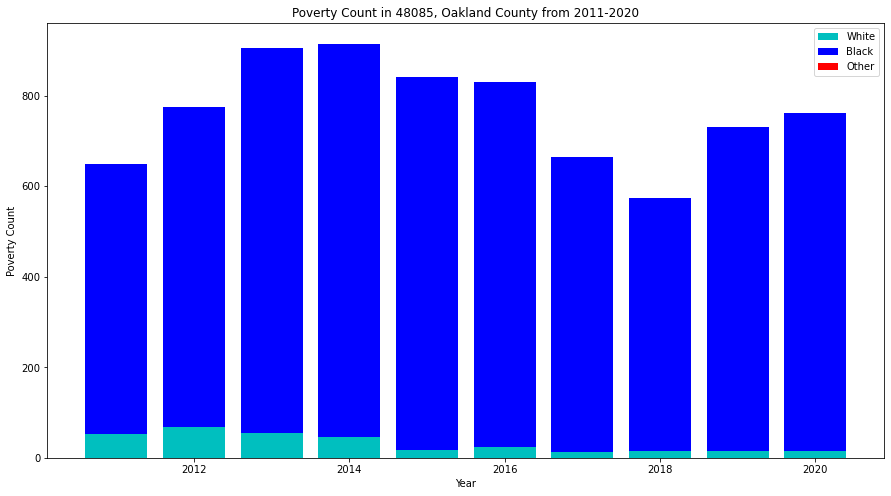

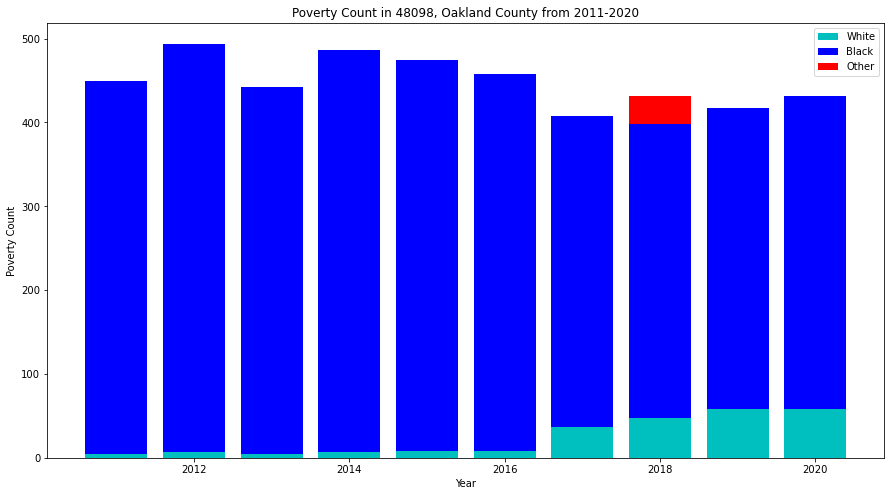

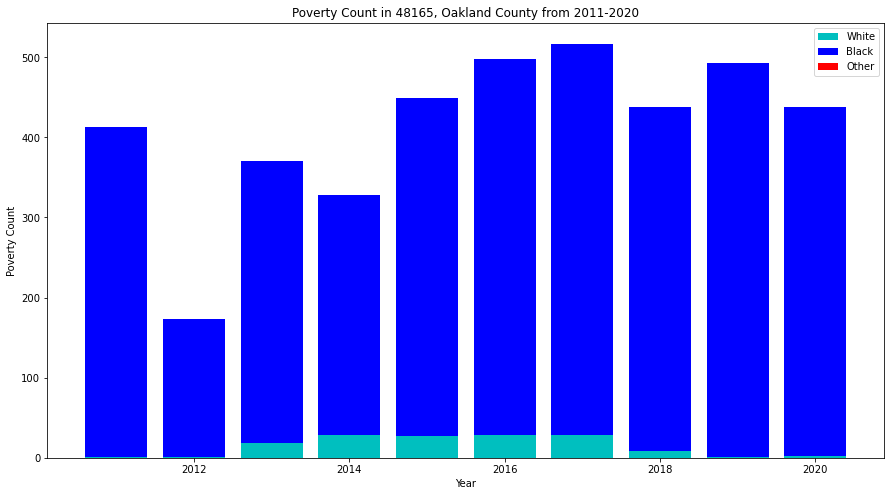

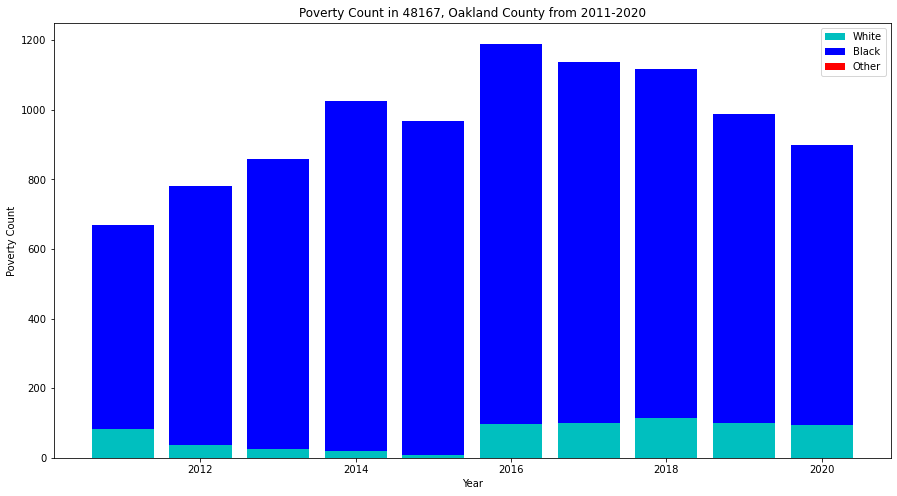

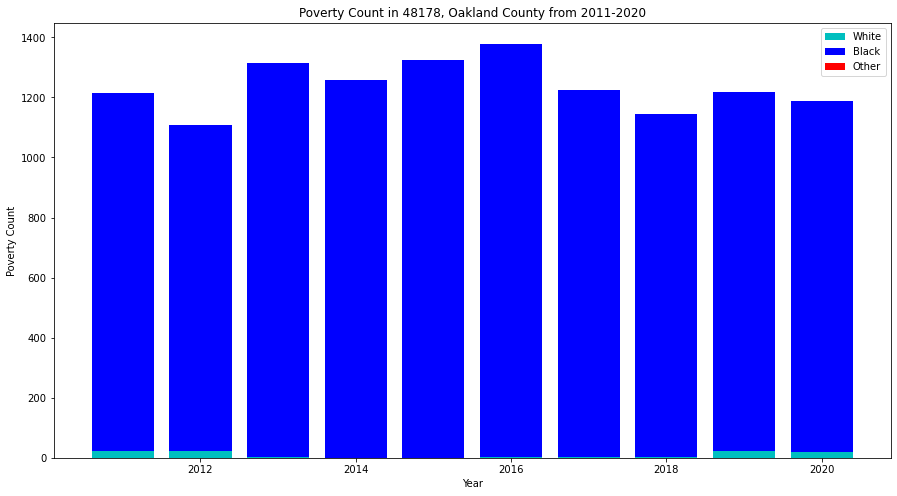

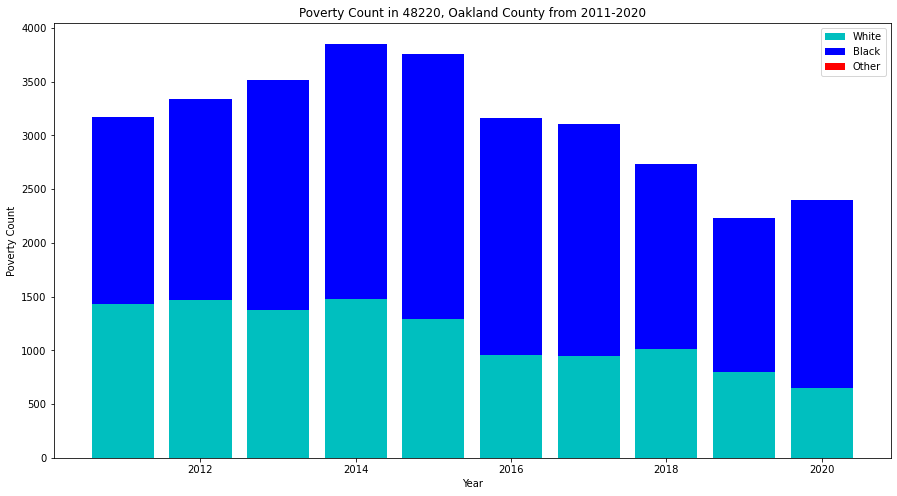

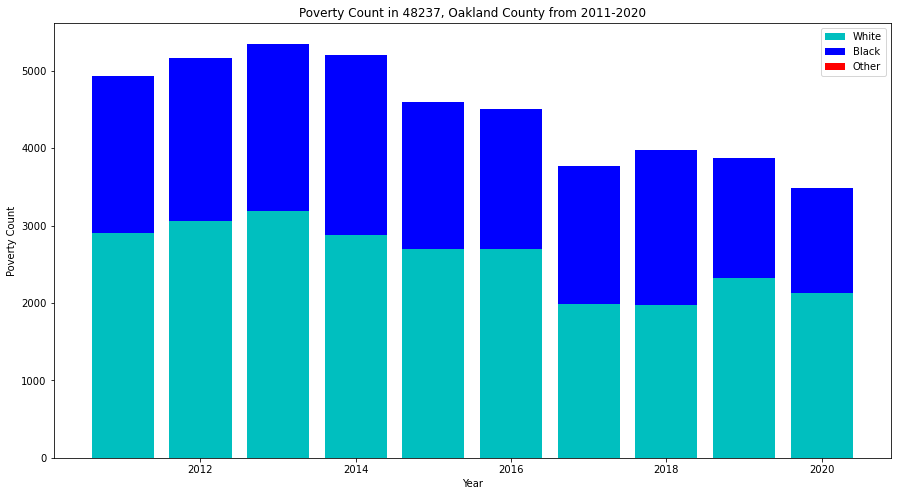

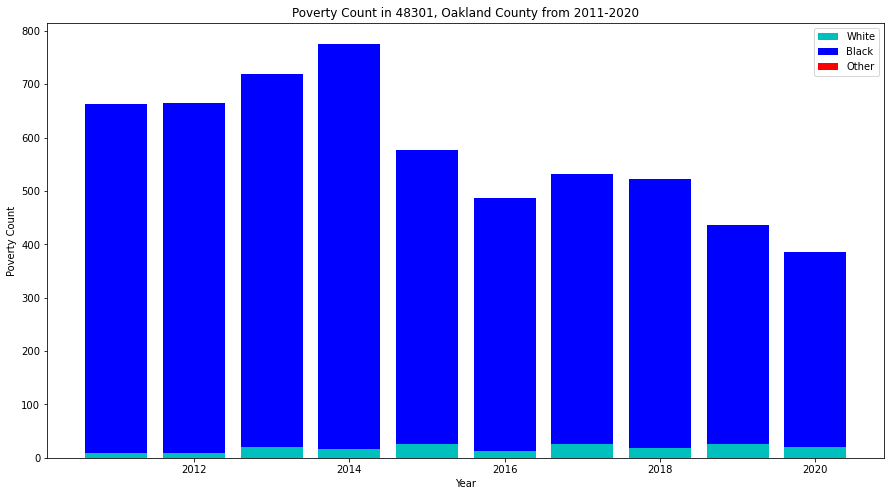

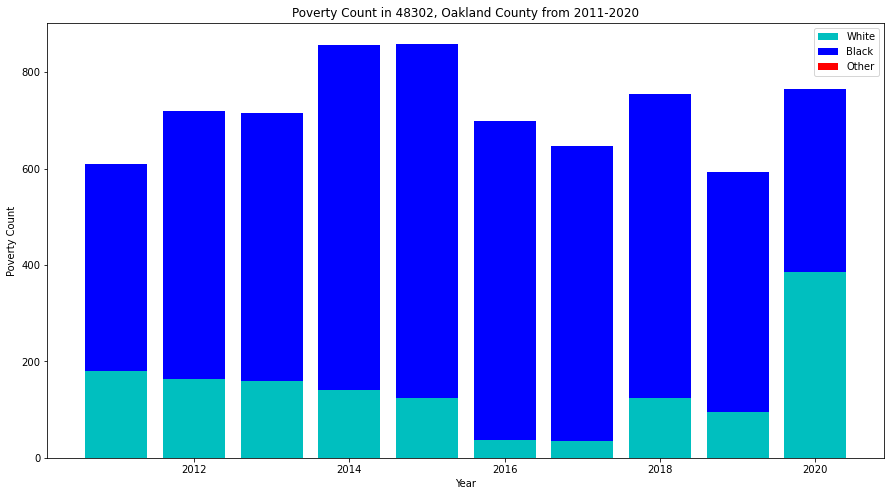

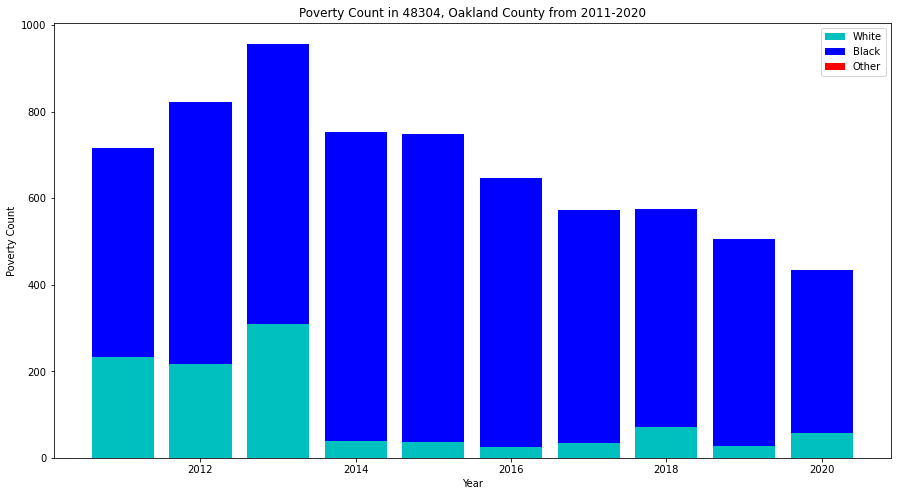

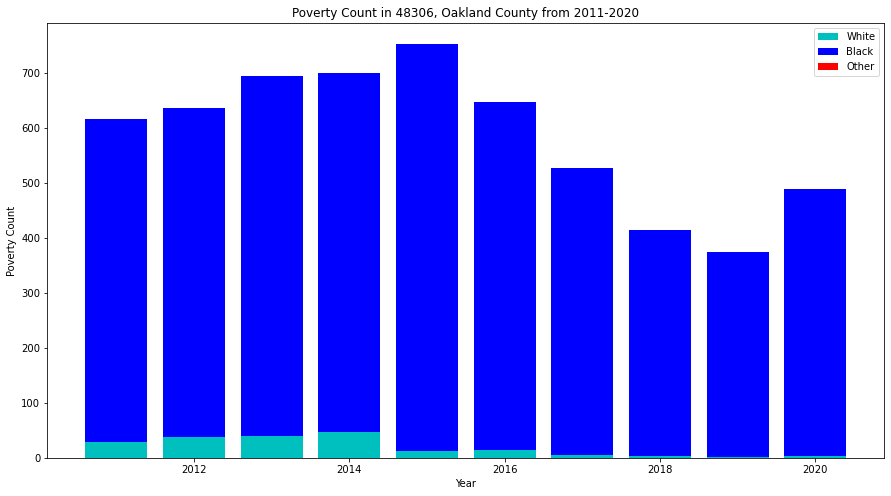

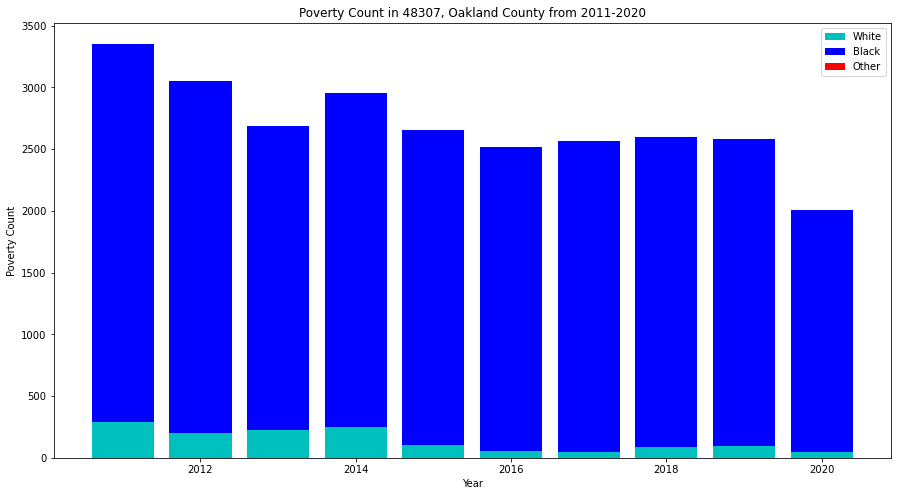

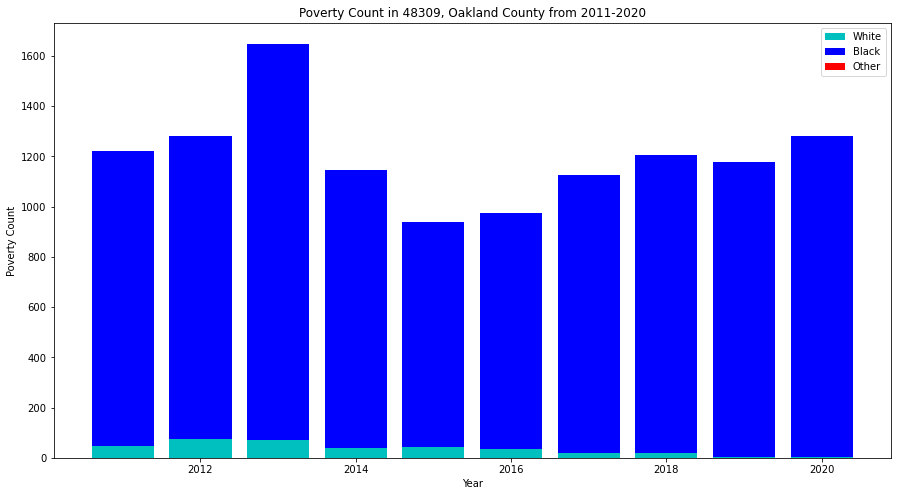

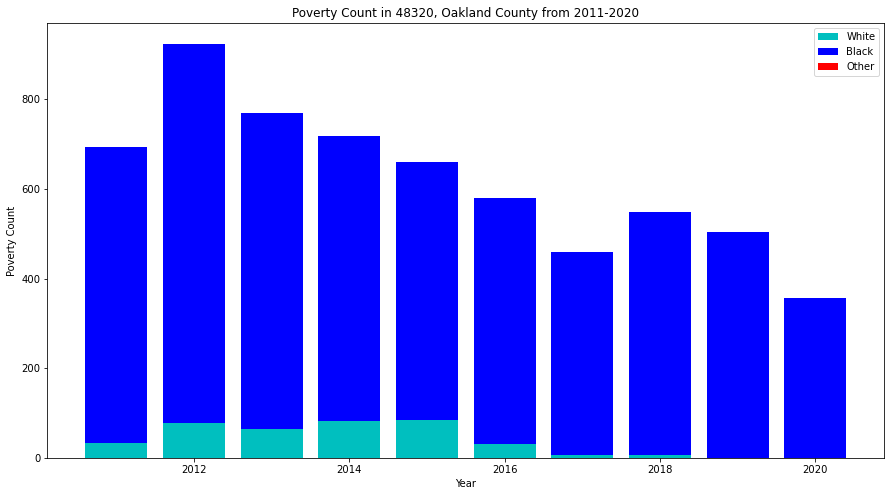

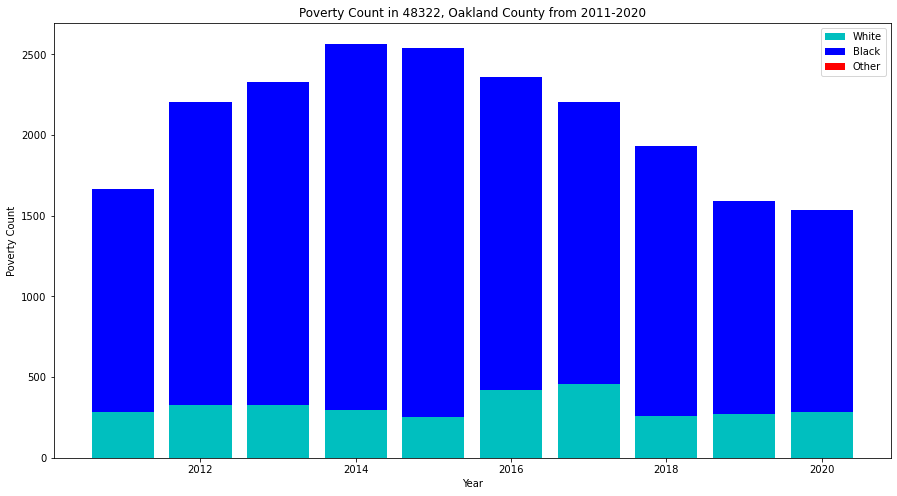

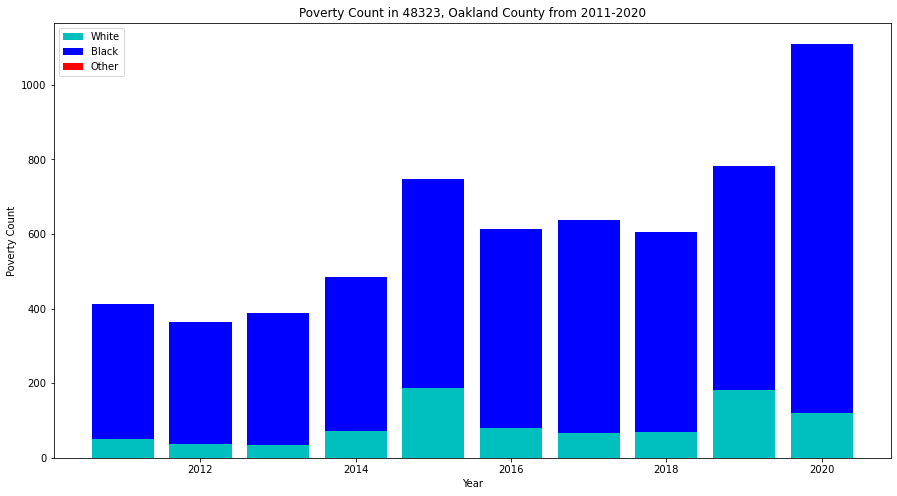

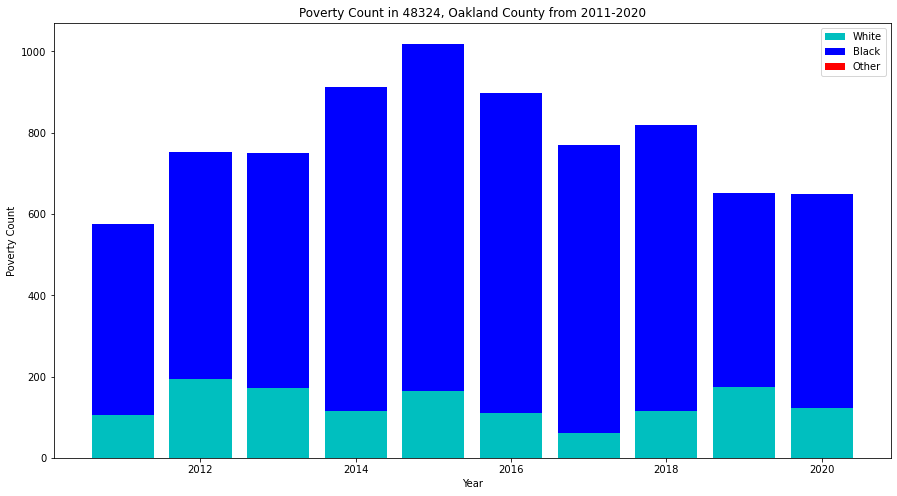

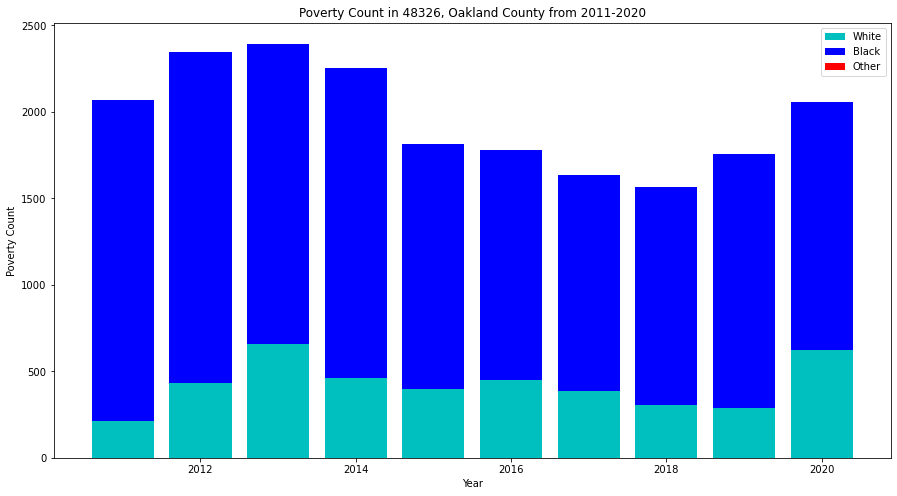

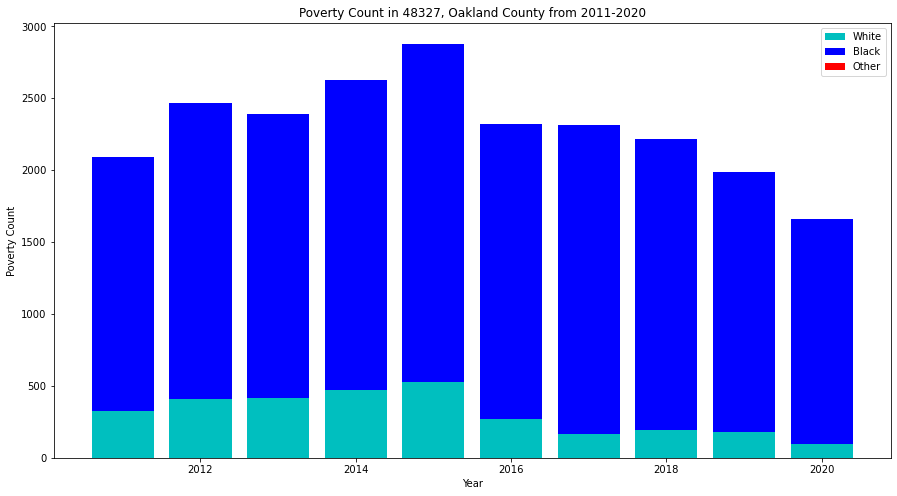

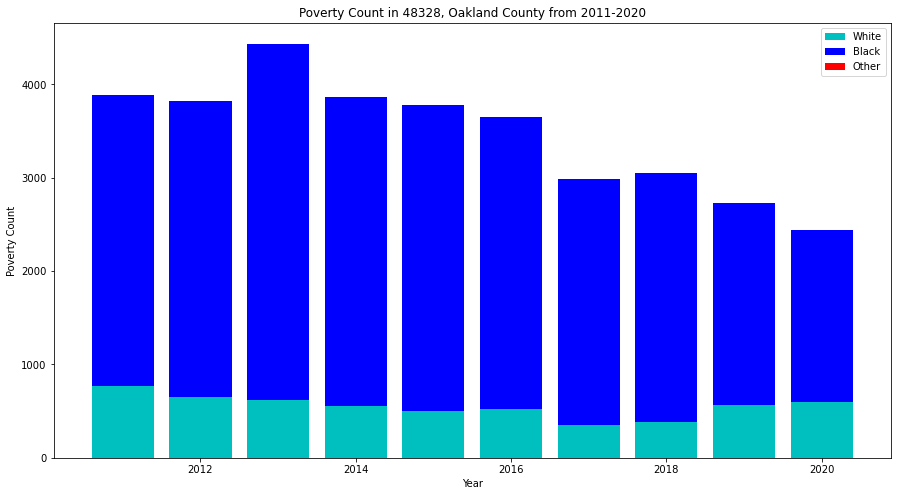

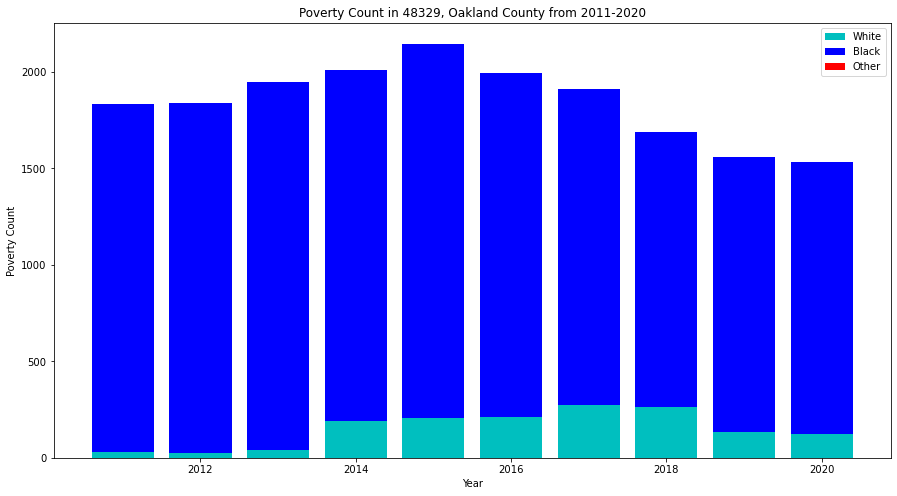

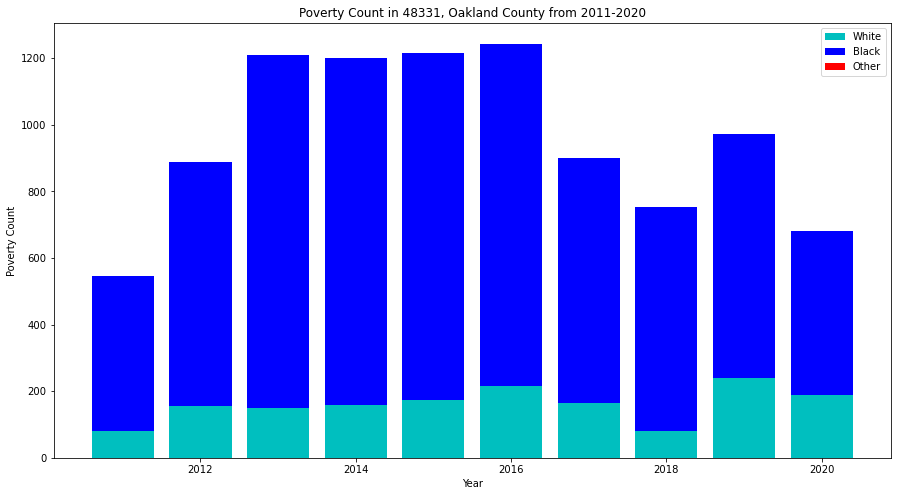

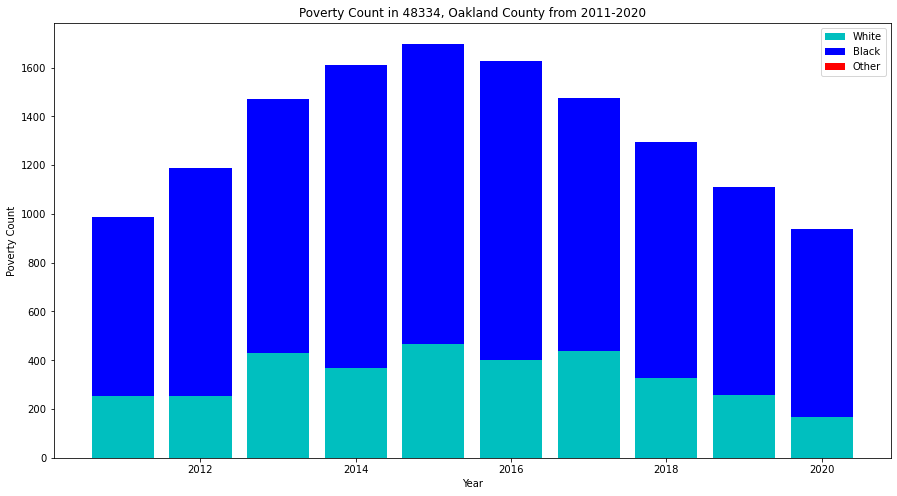

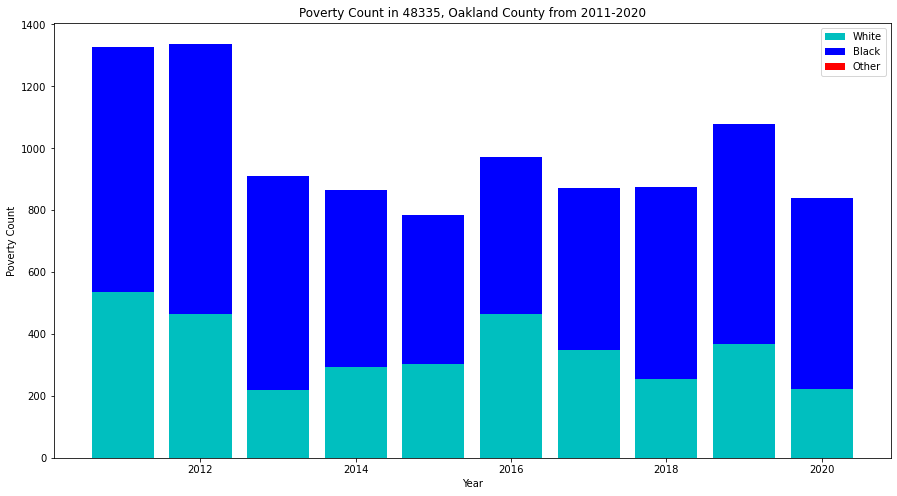

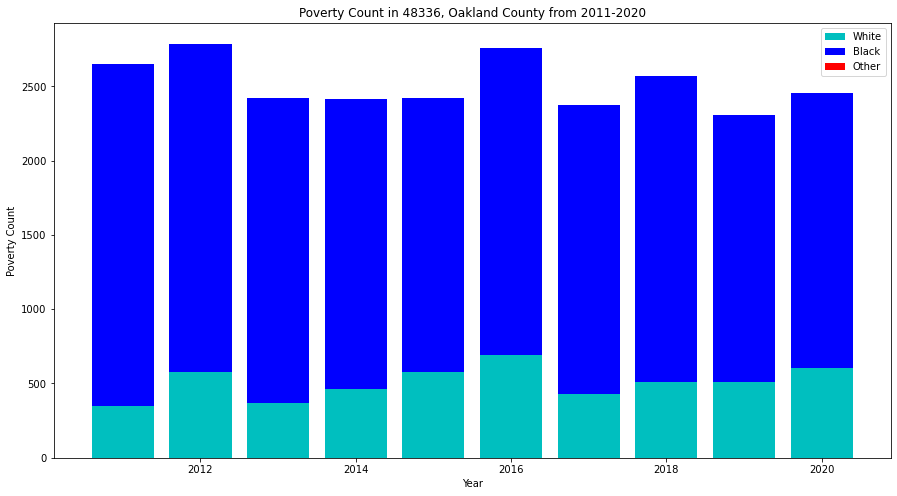

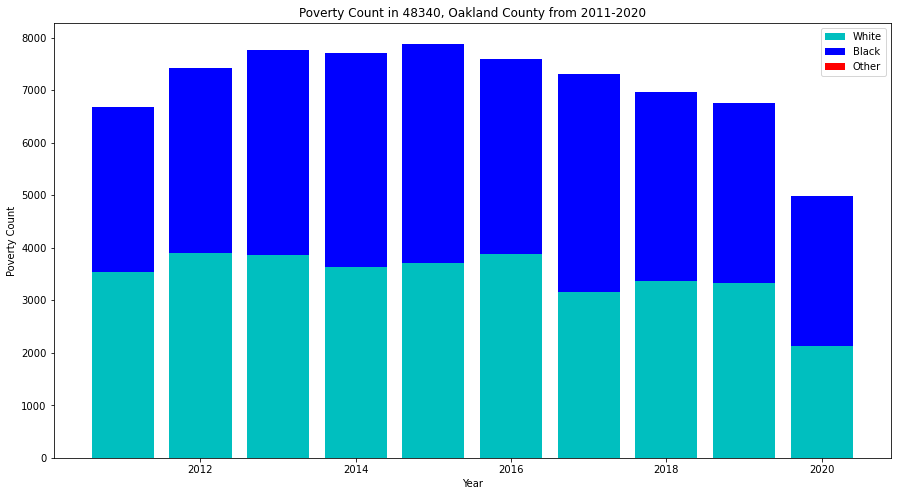

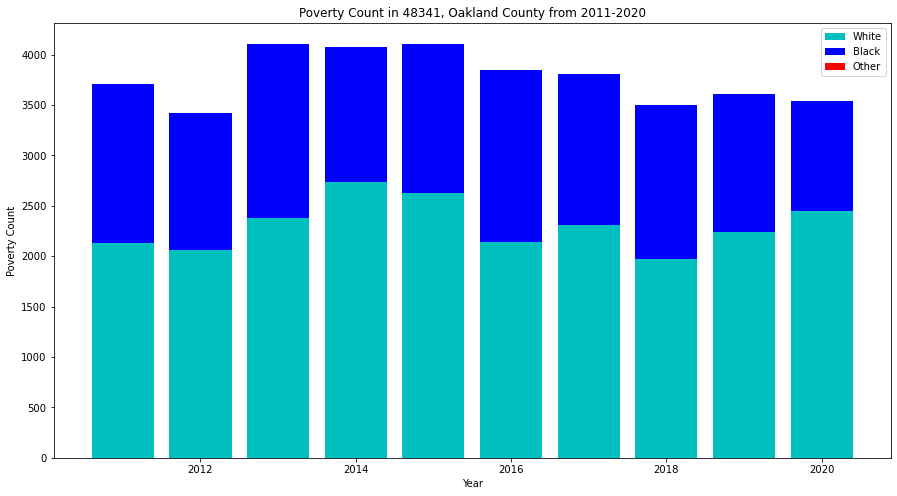

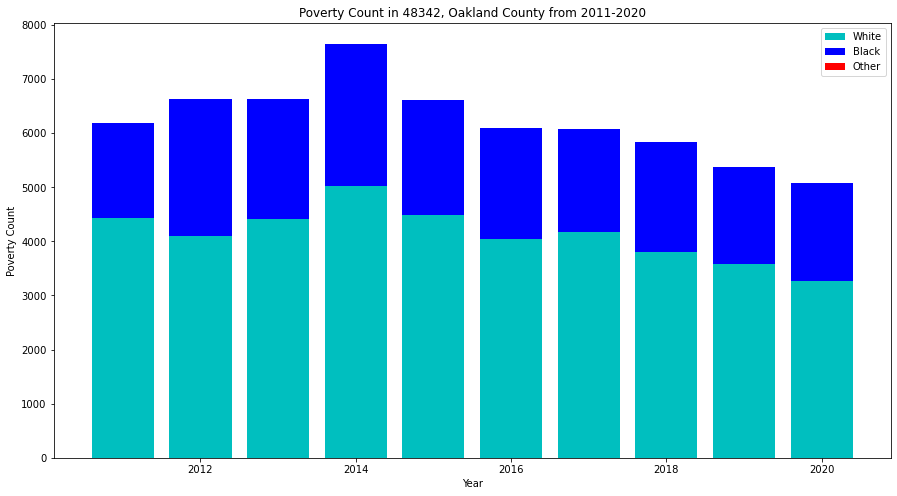

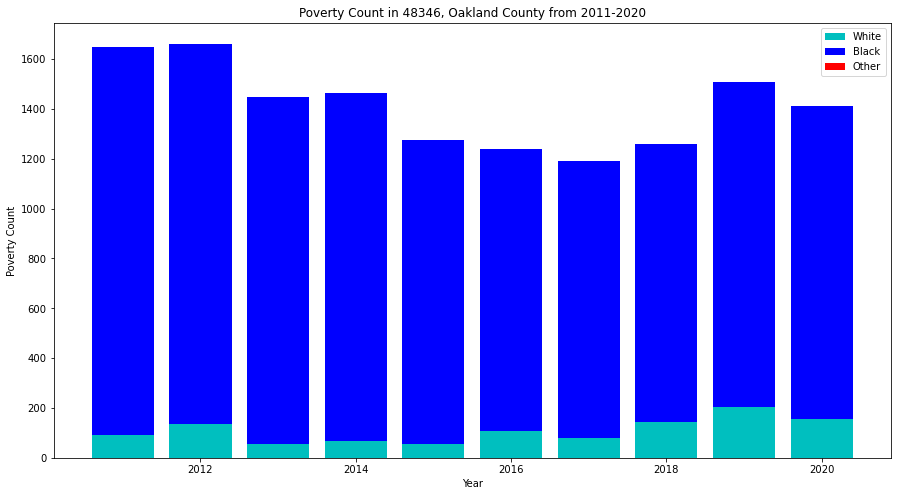

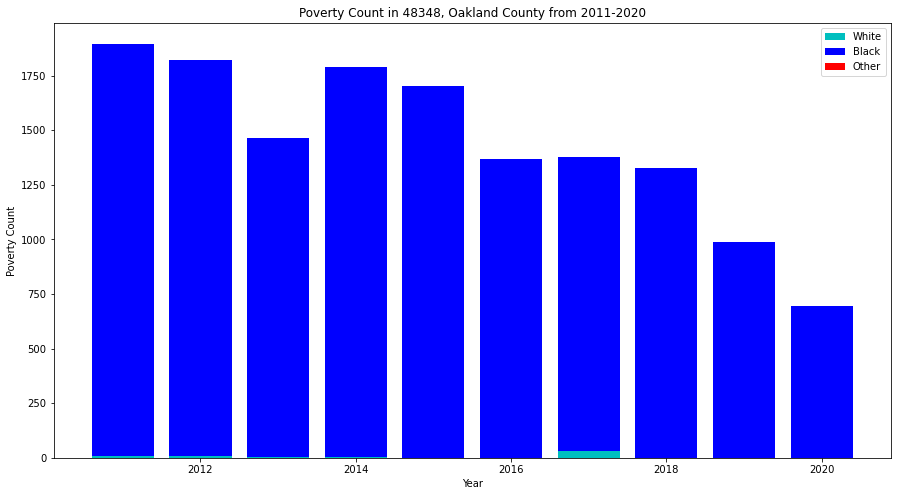

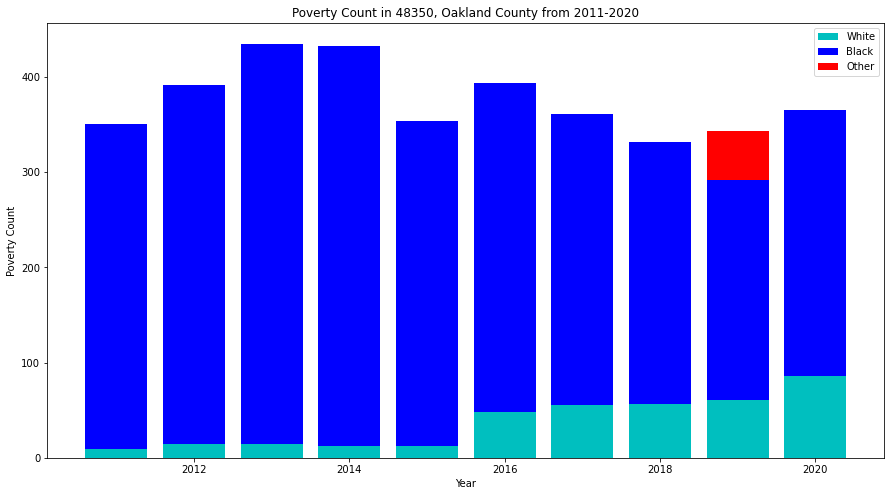

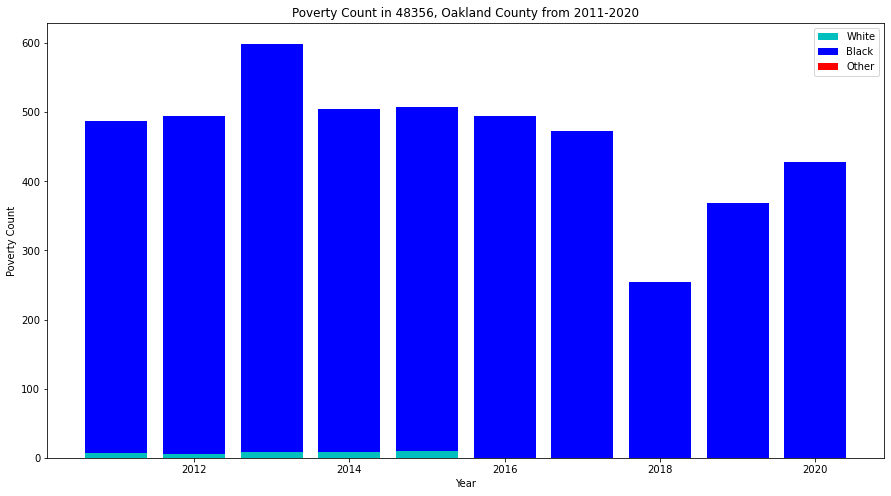

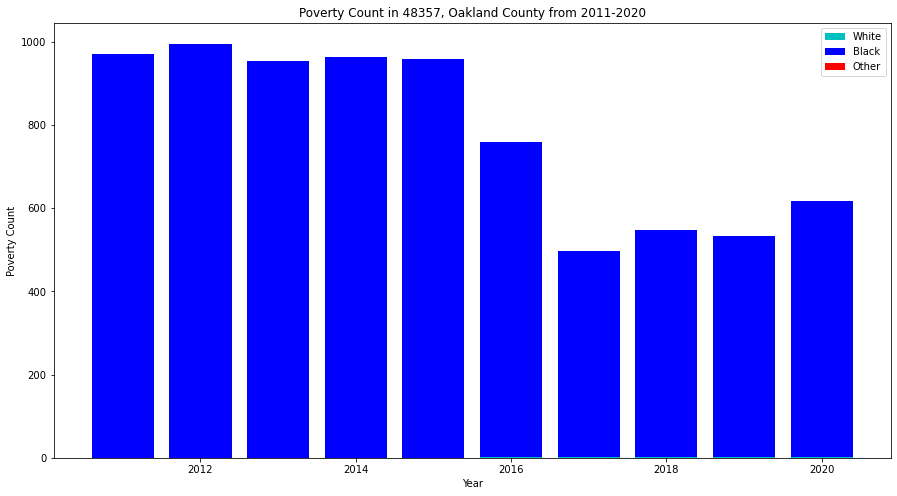

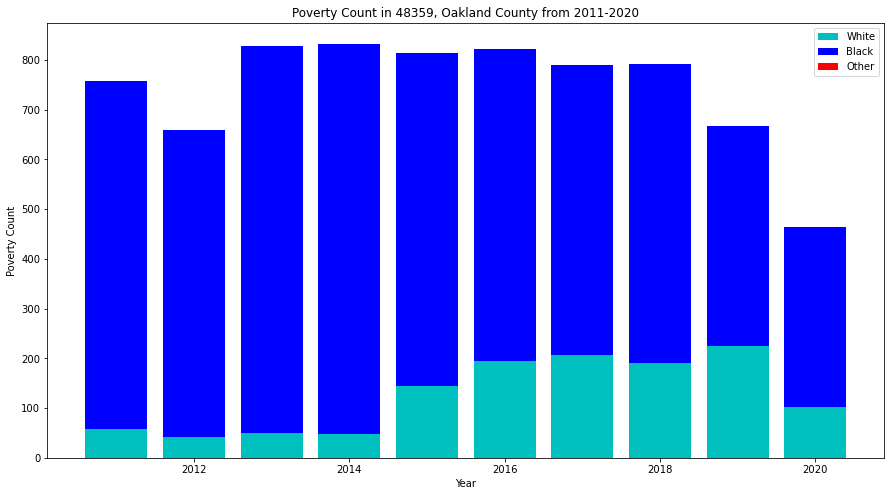

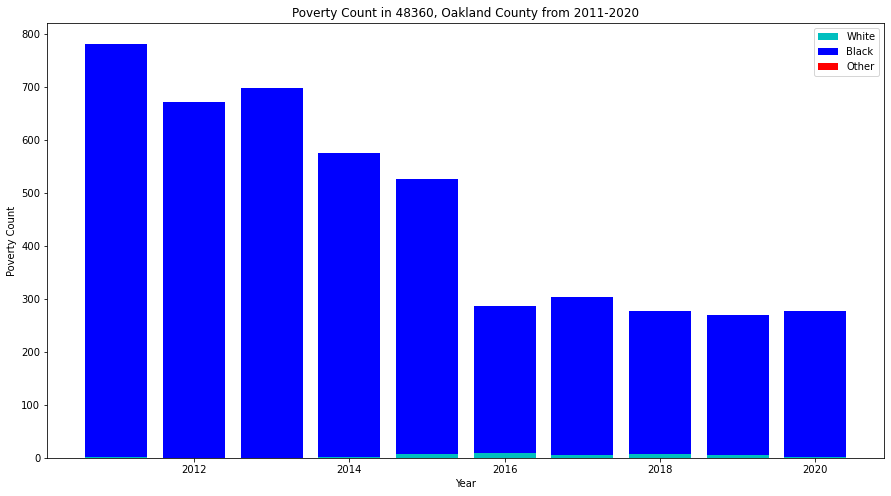

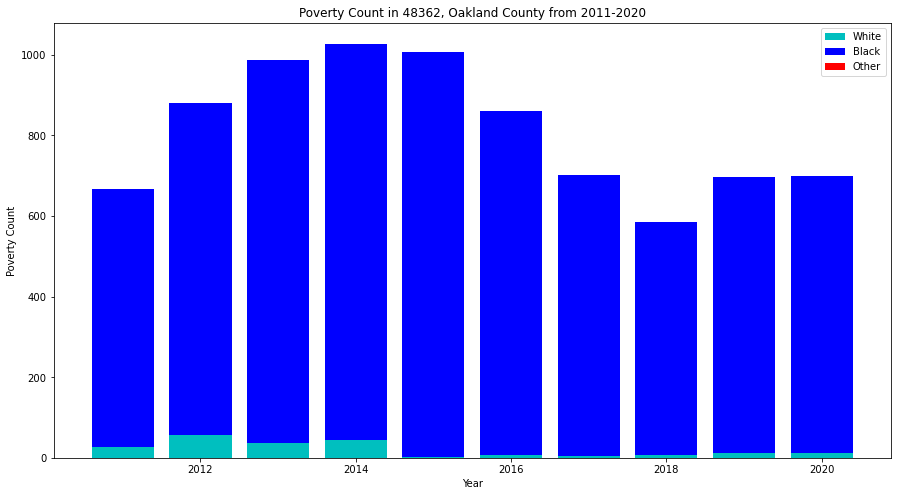

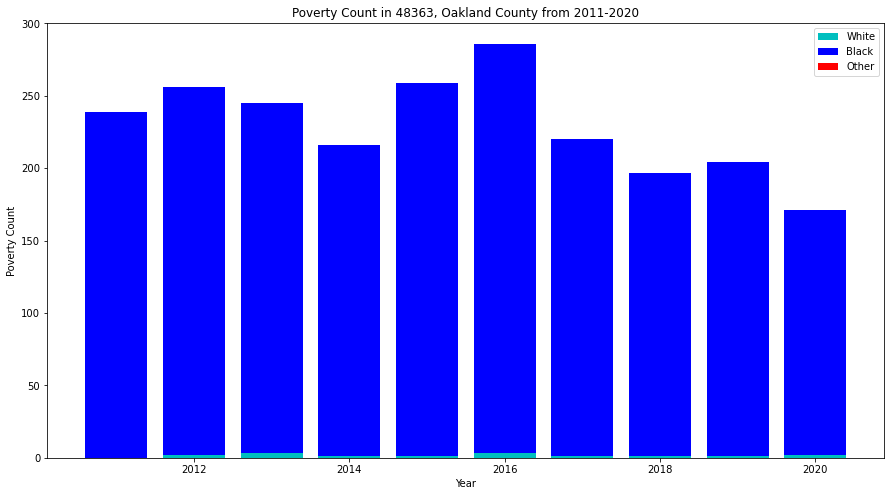

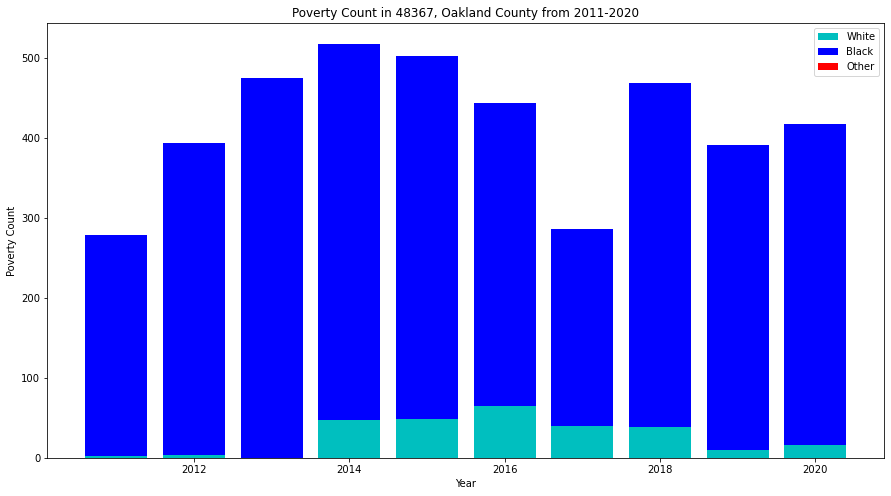

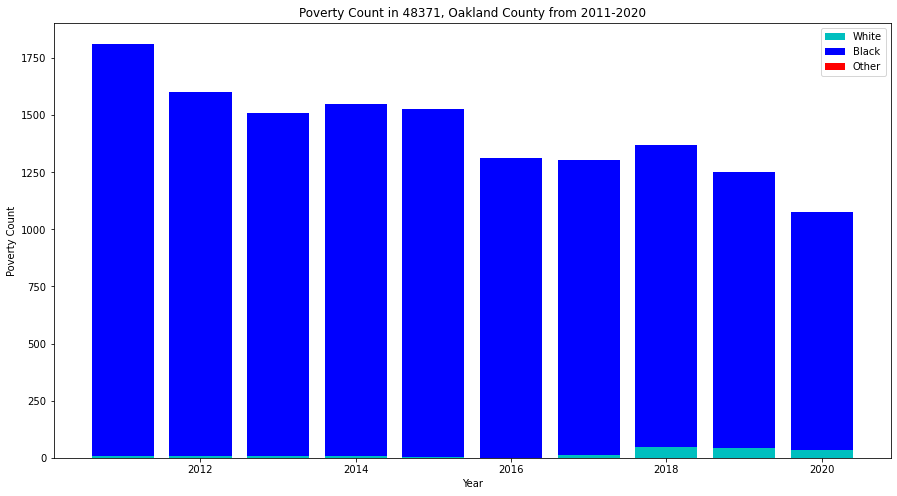

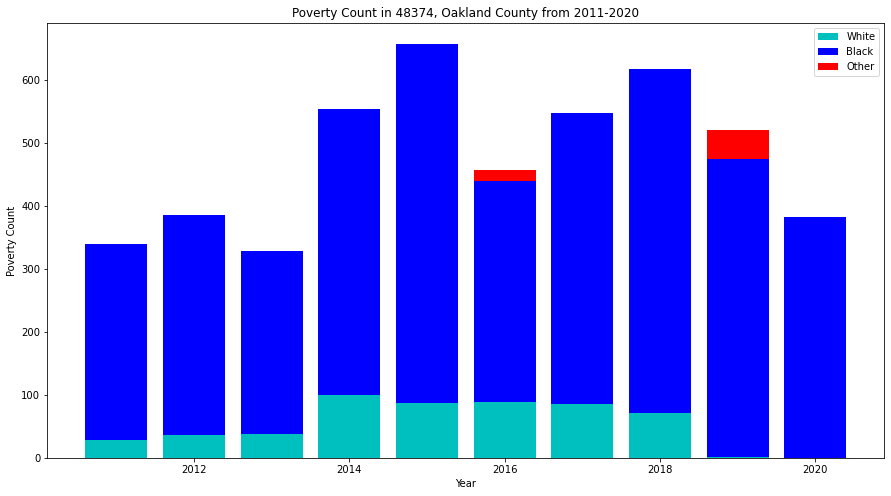

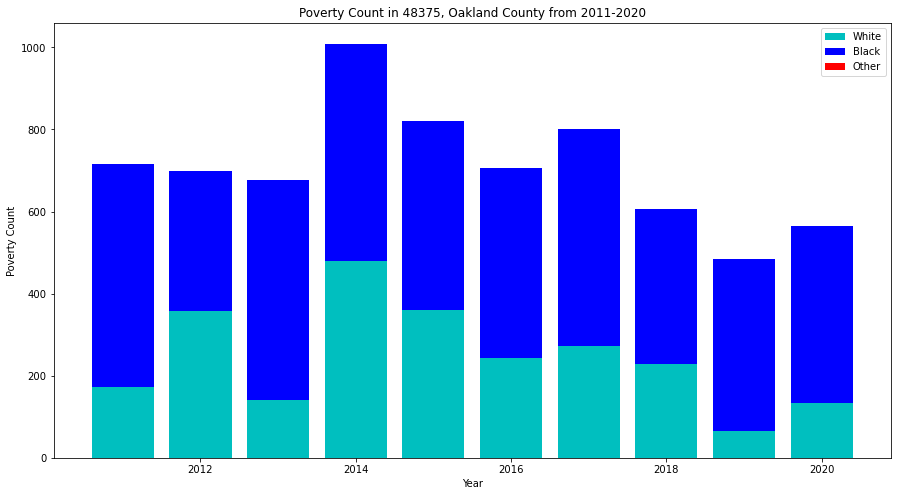

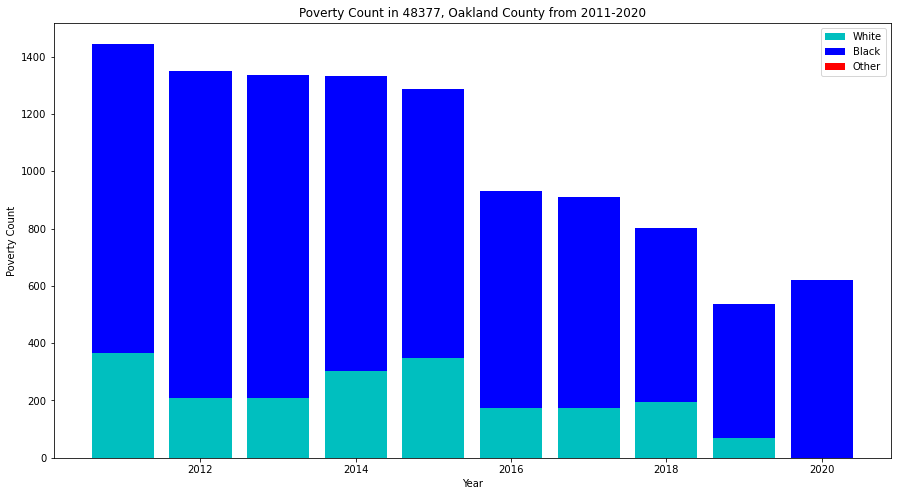

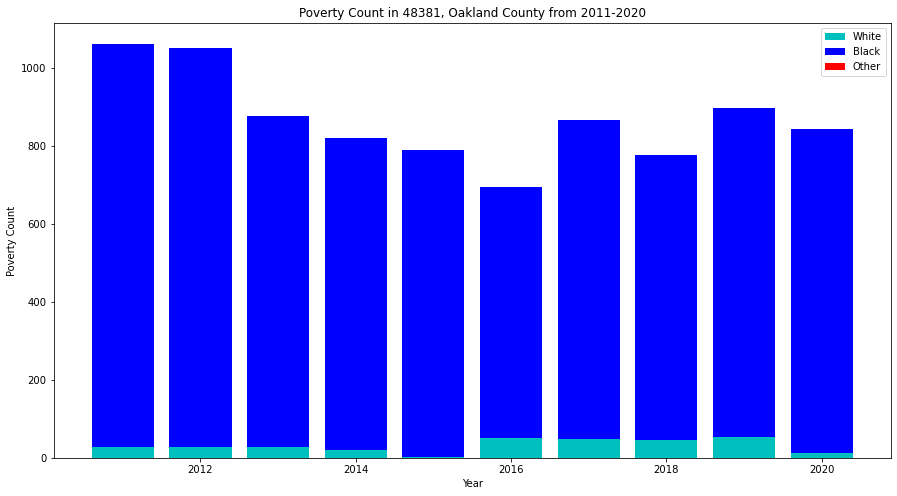

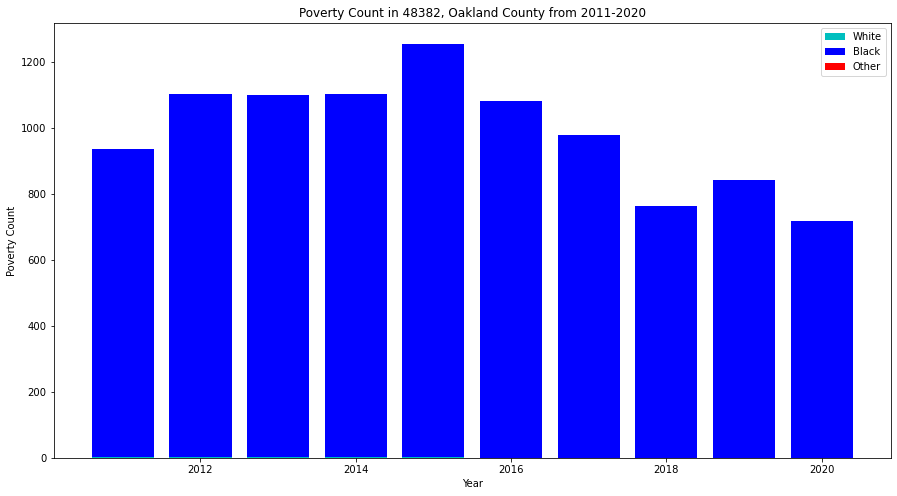

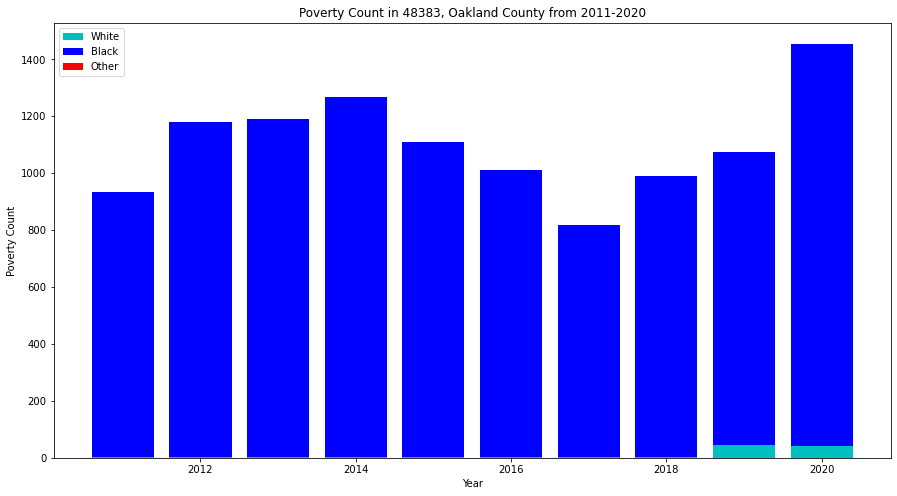

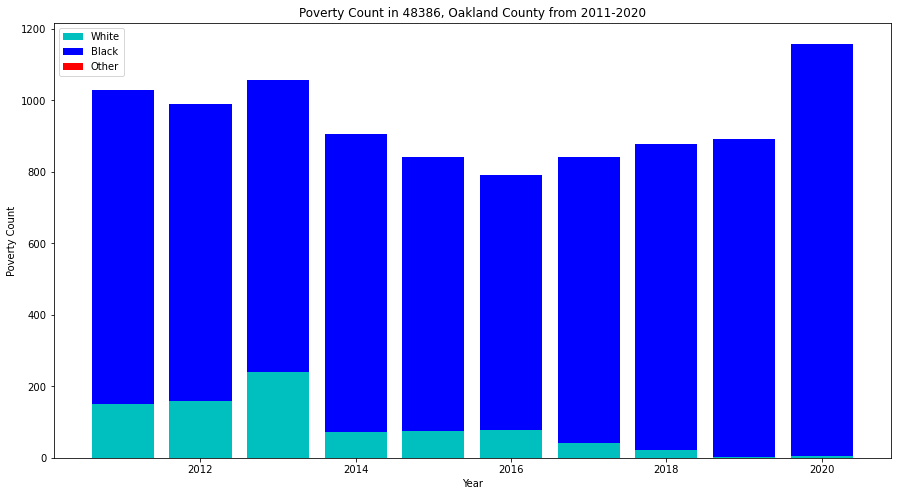

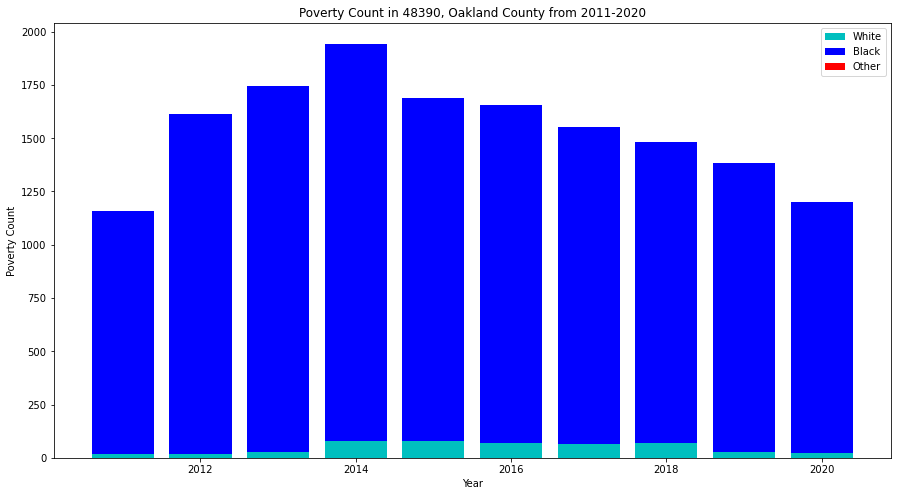

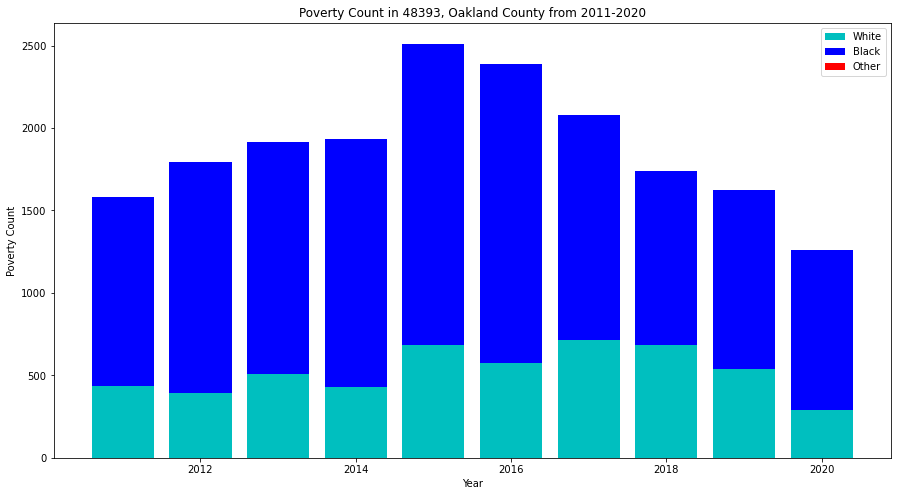

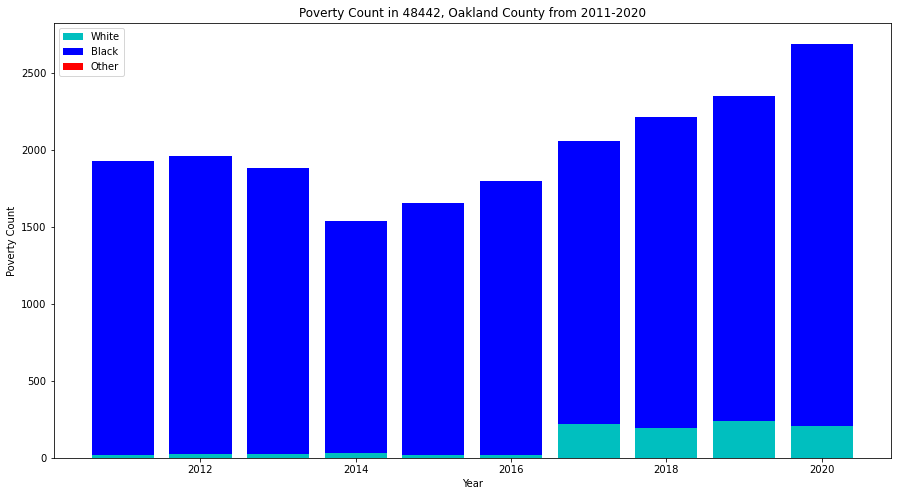

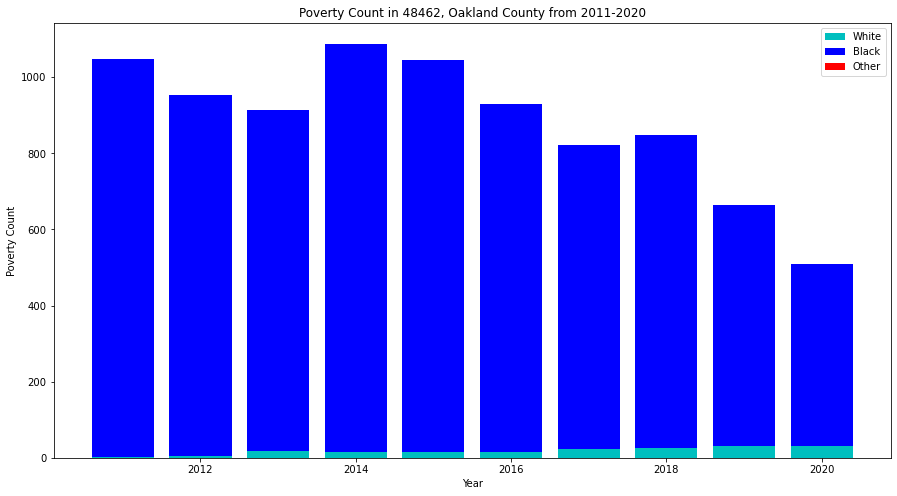

In [23]:
# Time analyses for poverty
fig = plt.figure(figsize = (7,4))
time_analyses_stacked(oakland_data,"Poverty Count - White","Poverty Count - Black", 
                      "Poverty Count",["White","Black","Other"],"Oakland")

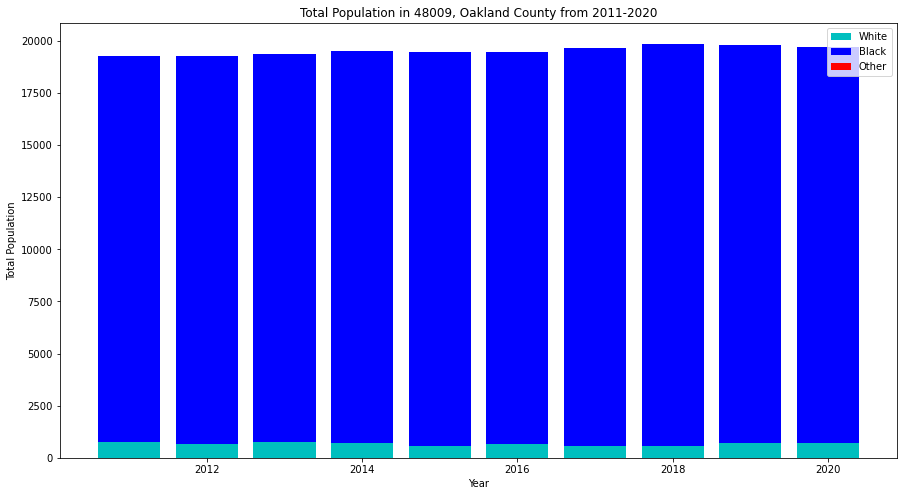

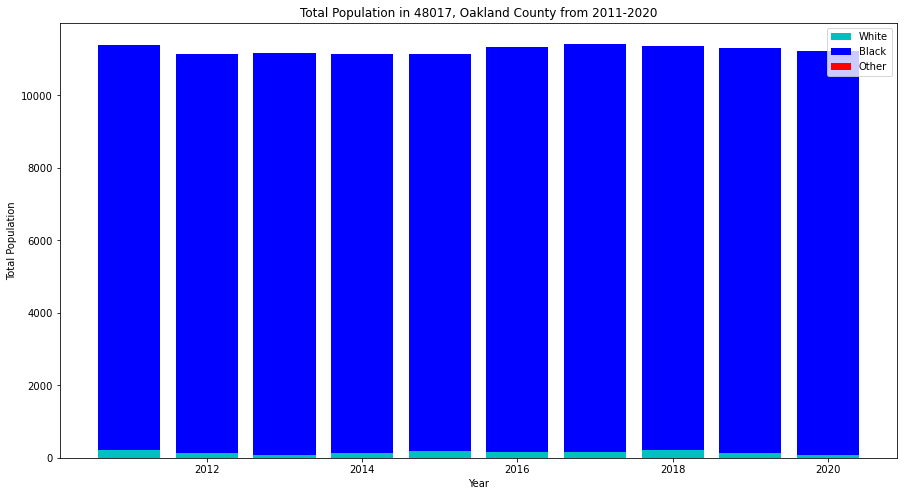

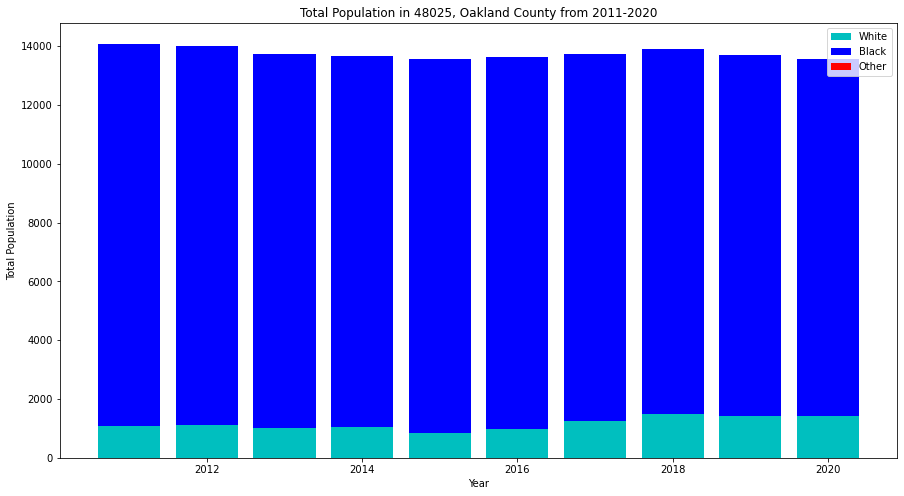

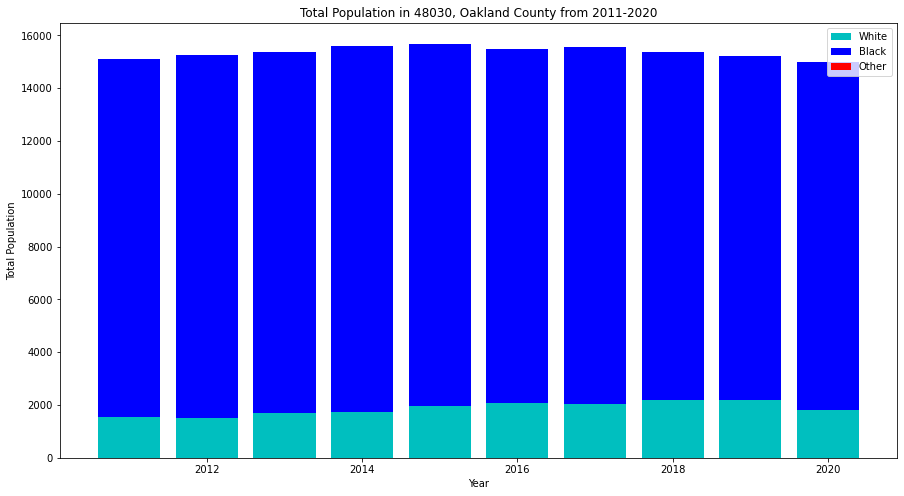

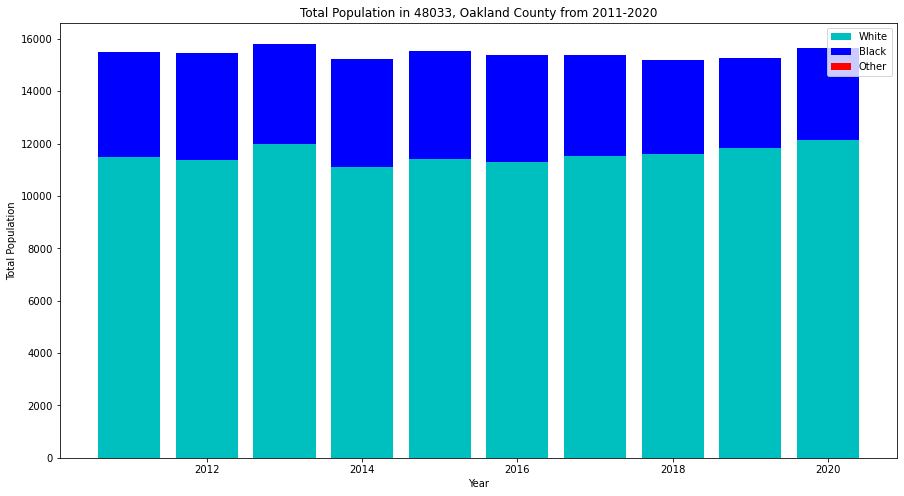

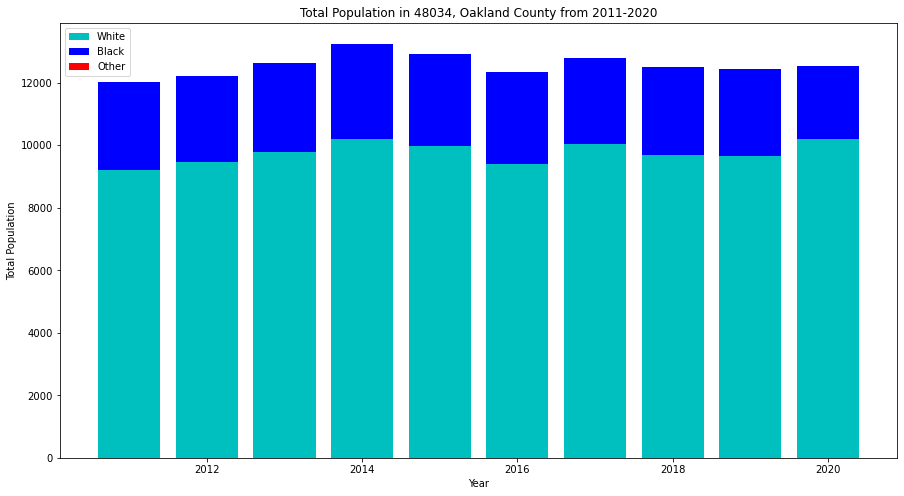

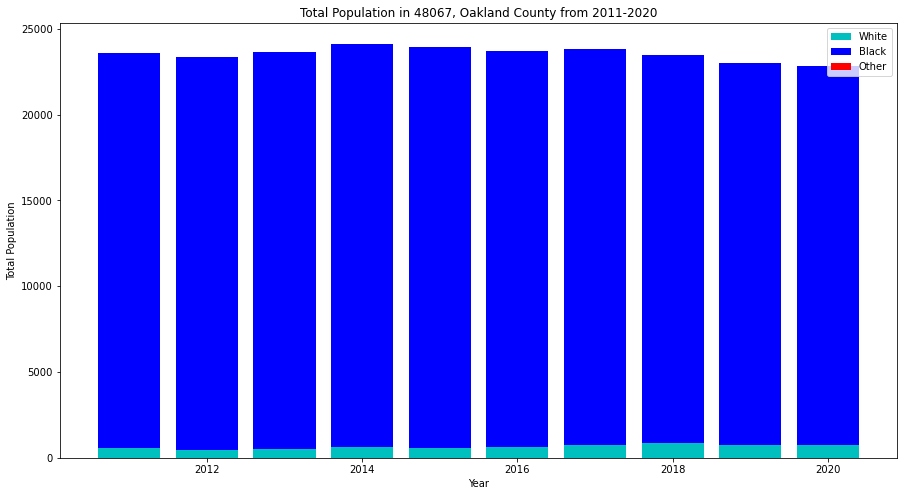

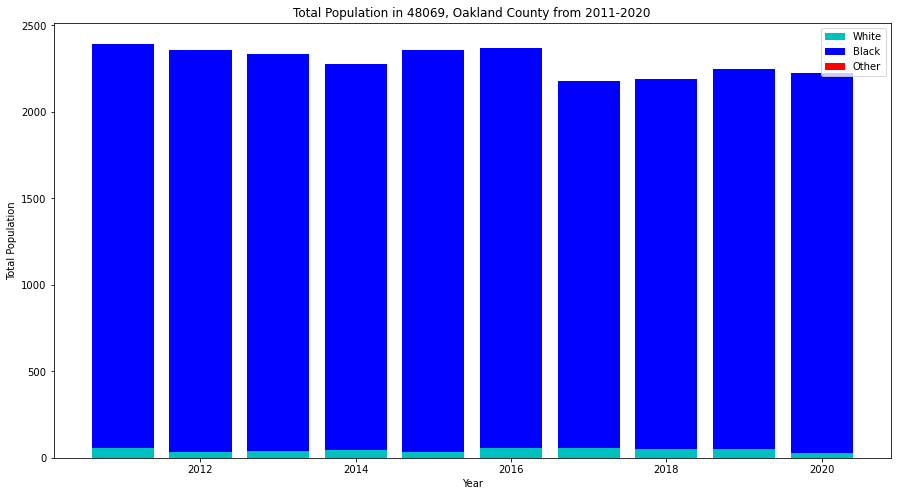

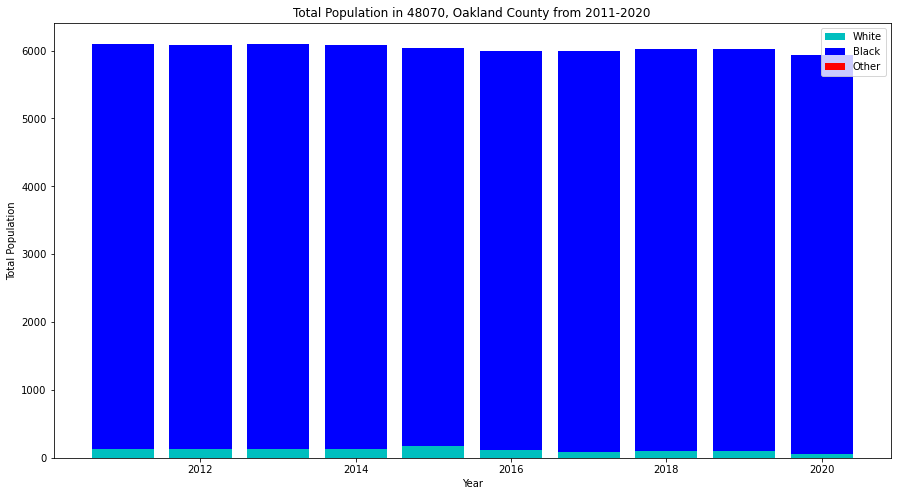

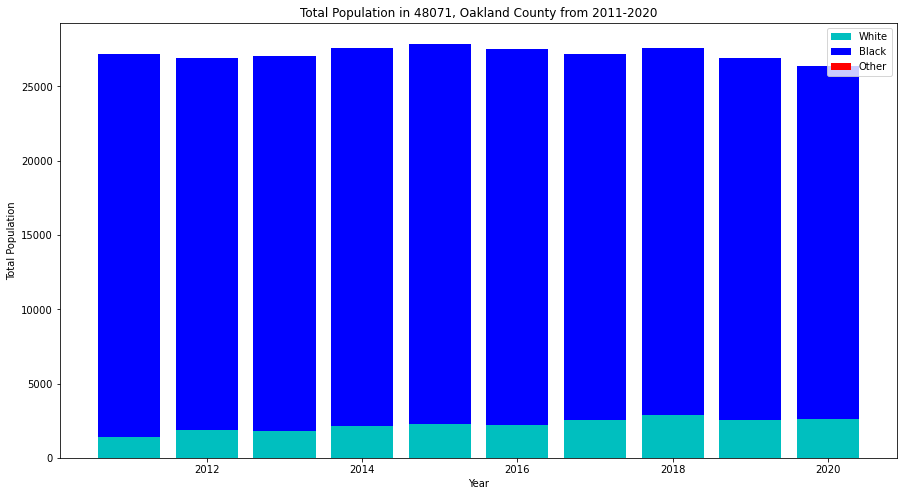

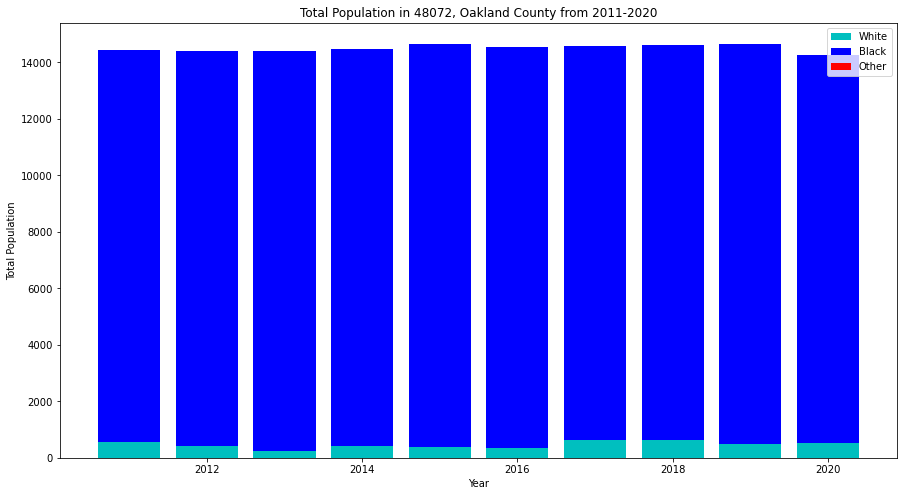

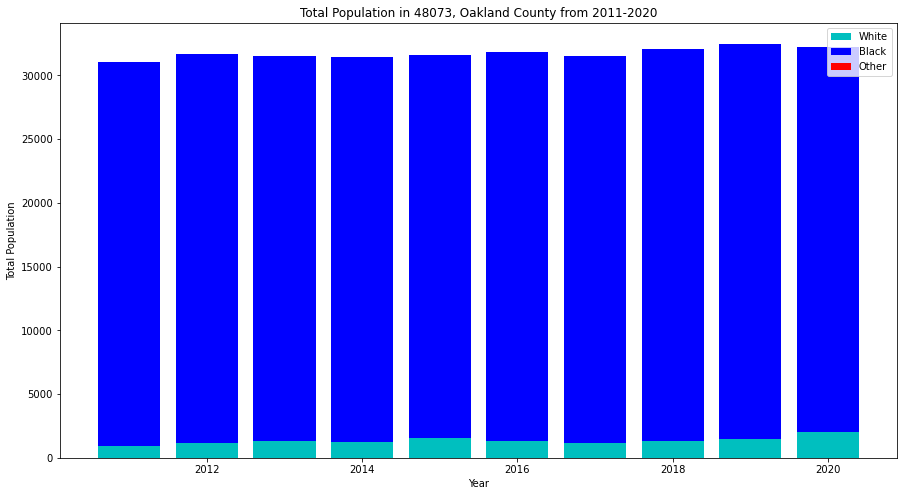

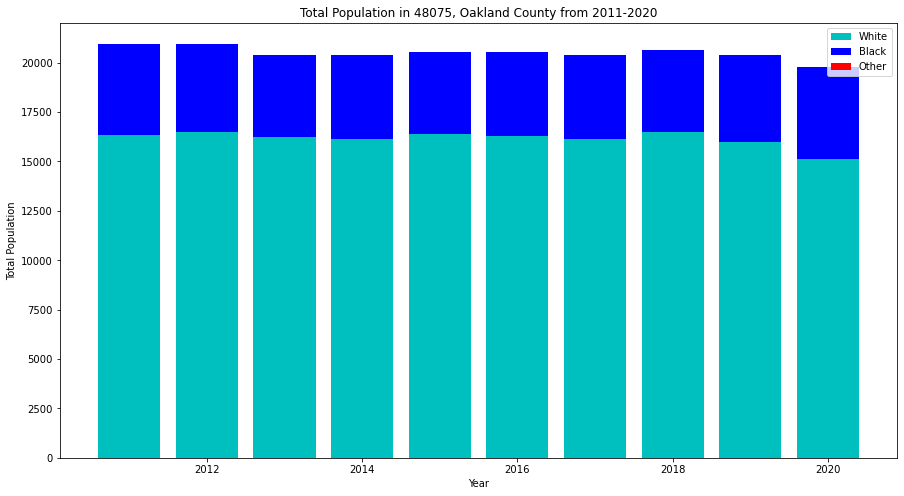

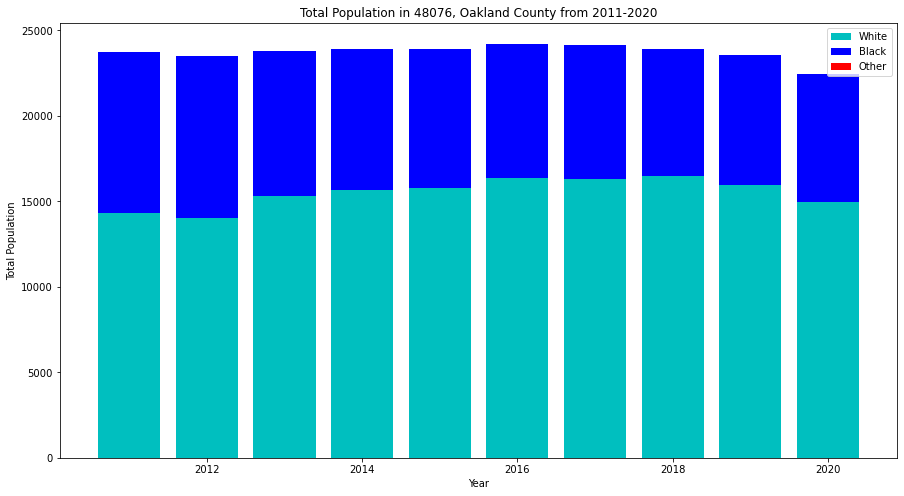

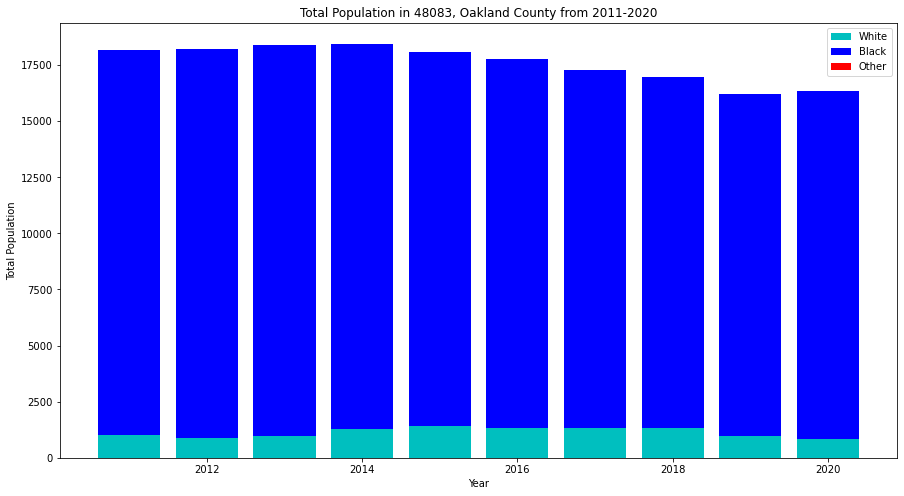

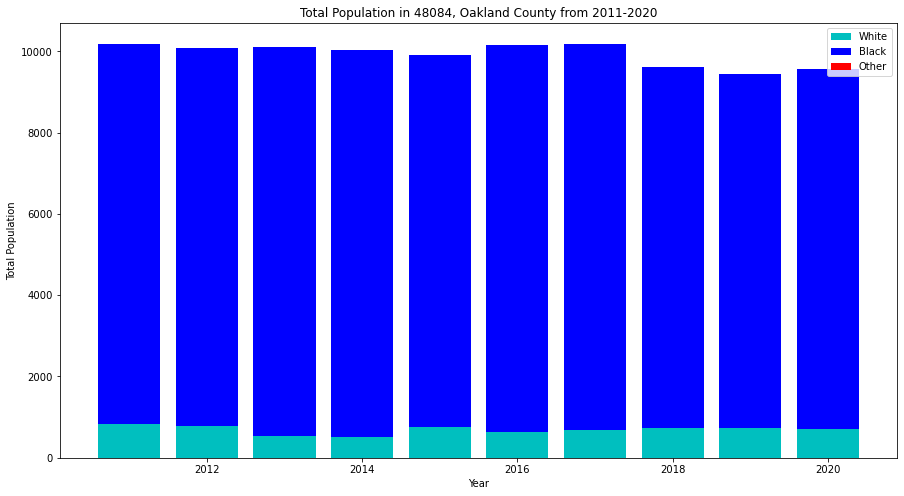

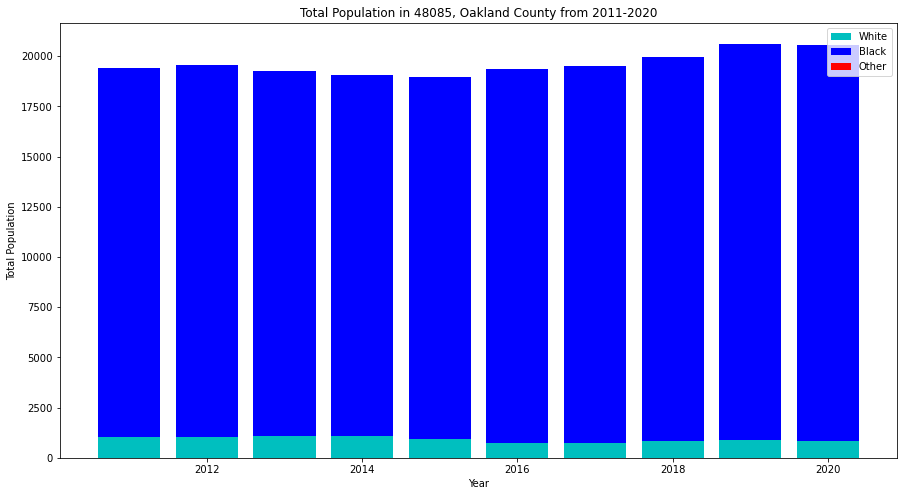

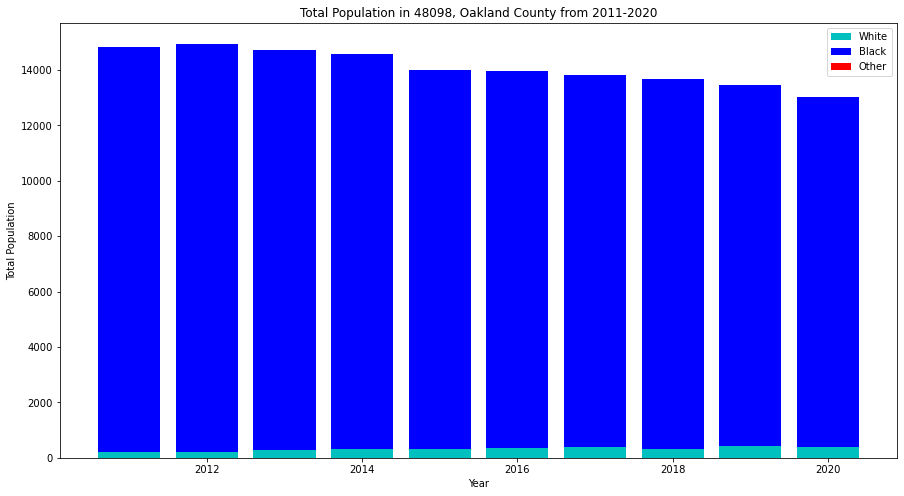

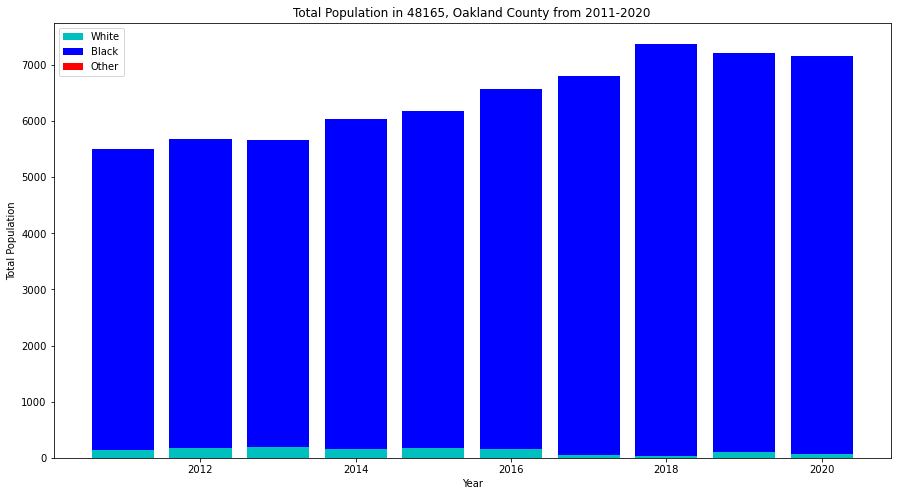

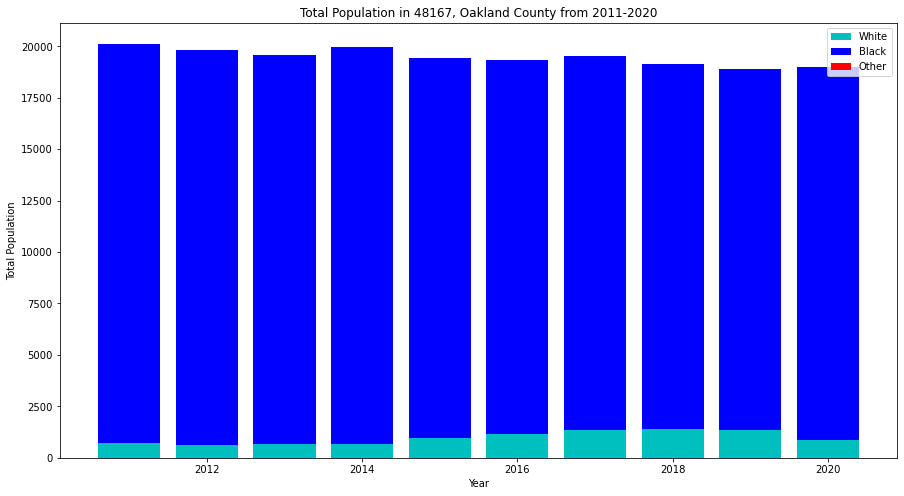

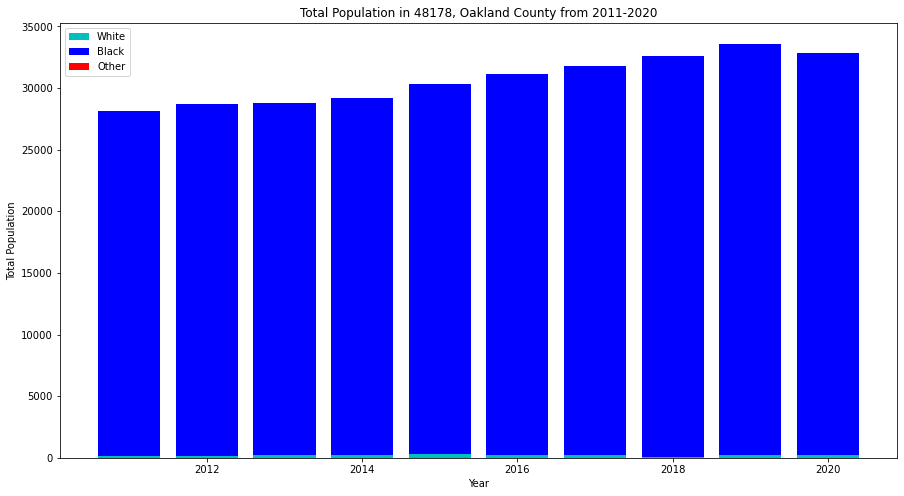

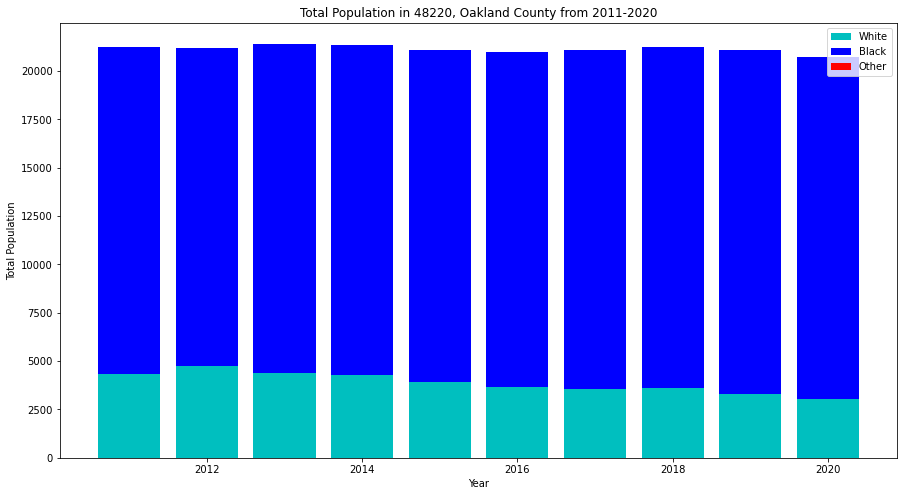

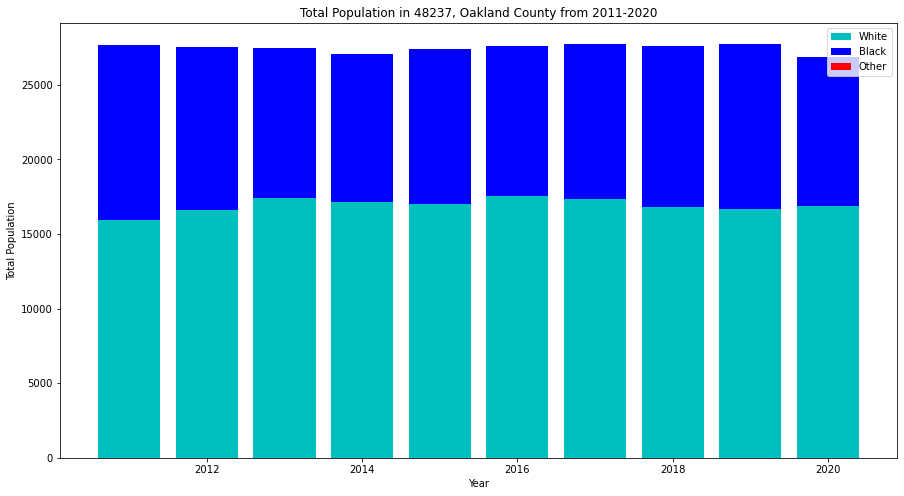

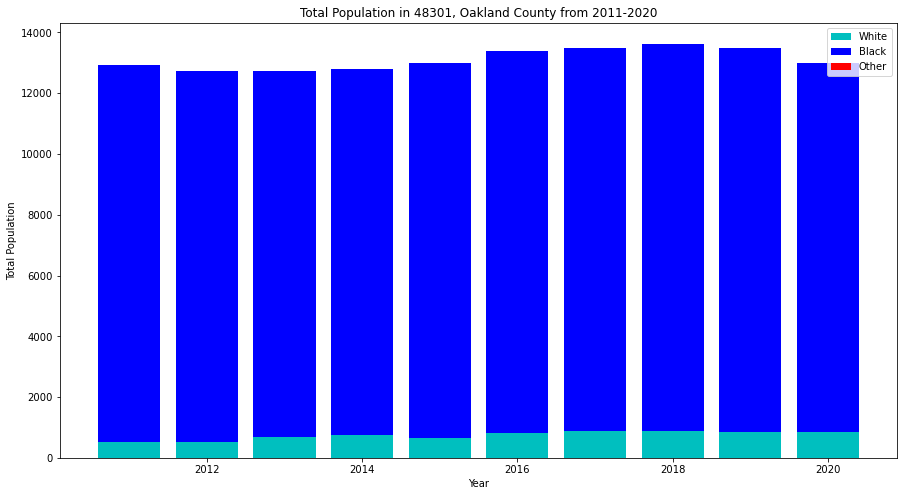

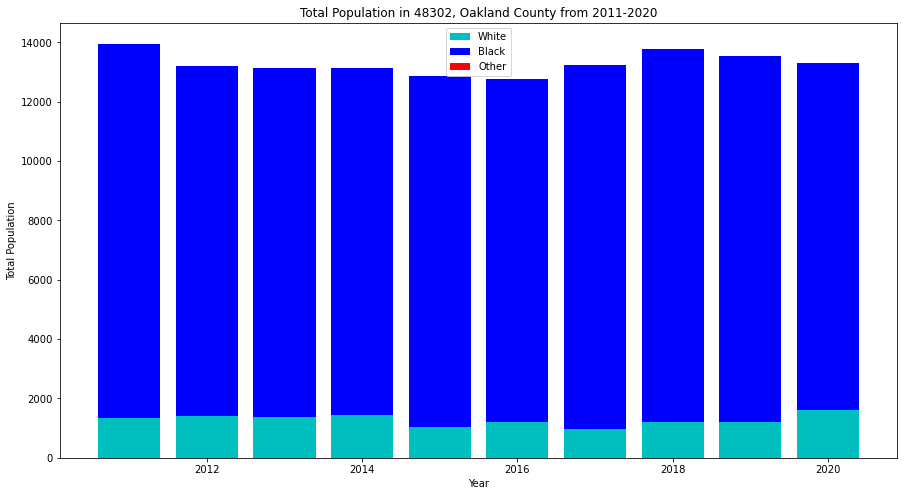

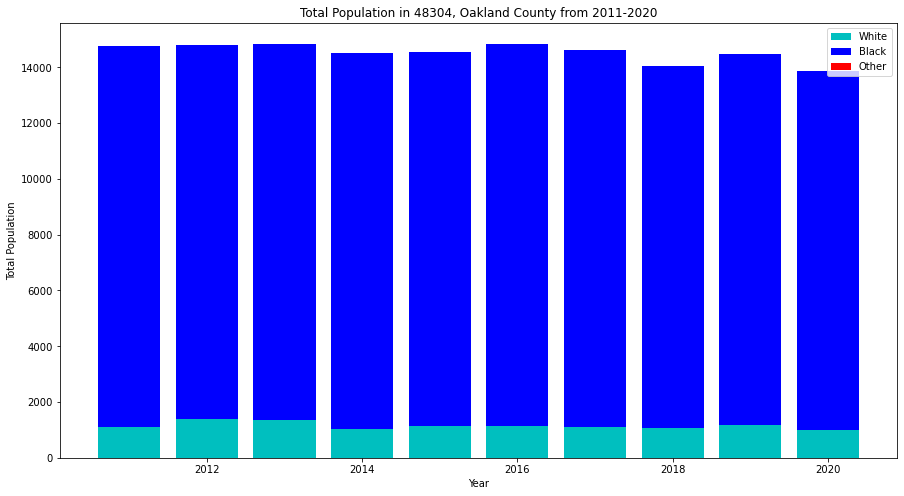

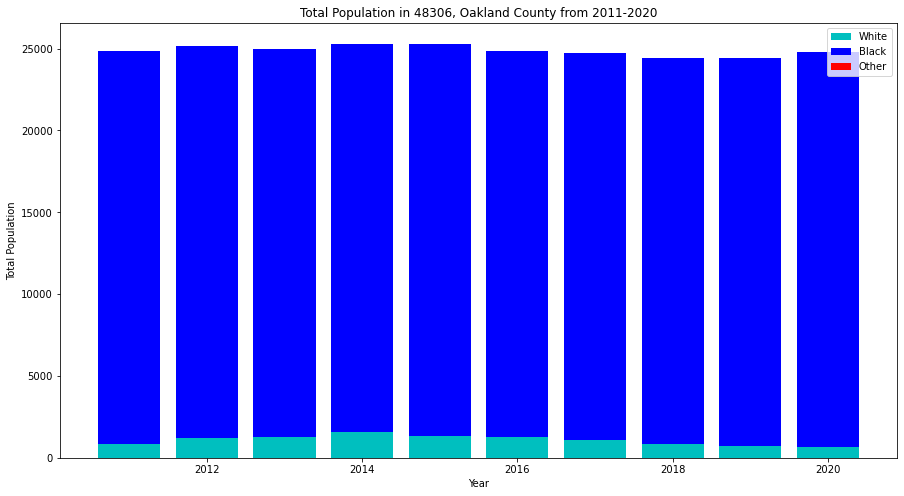

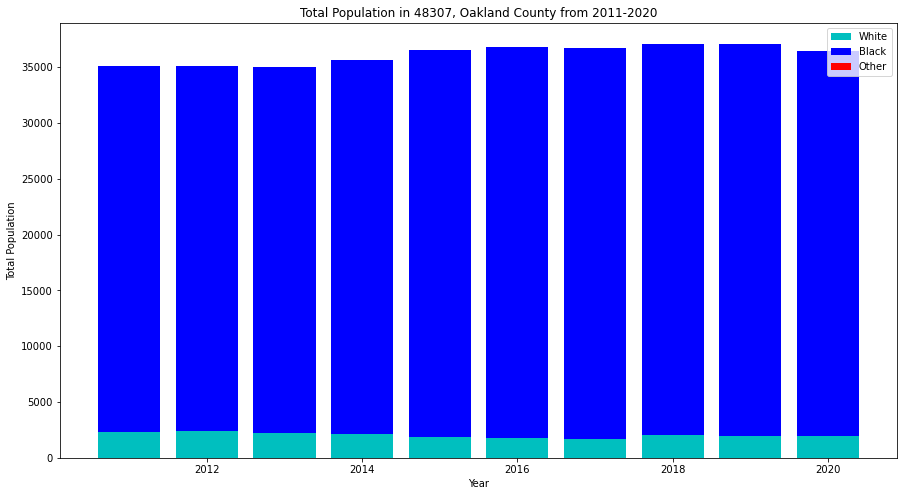

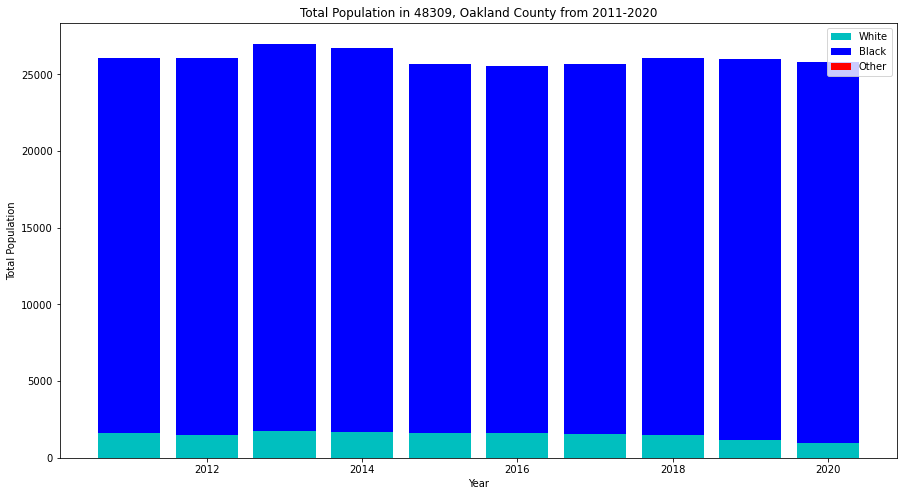

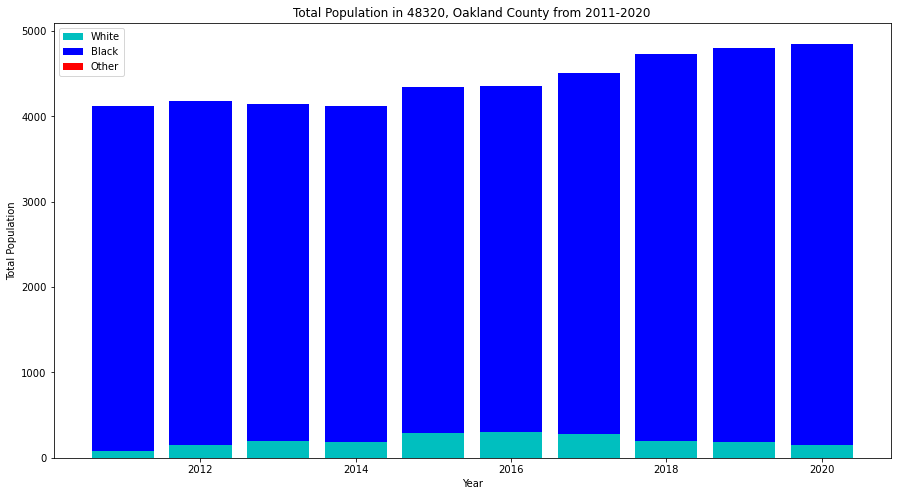

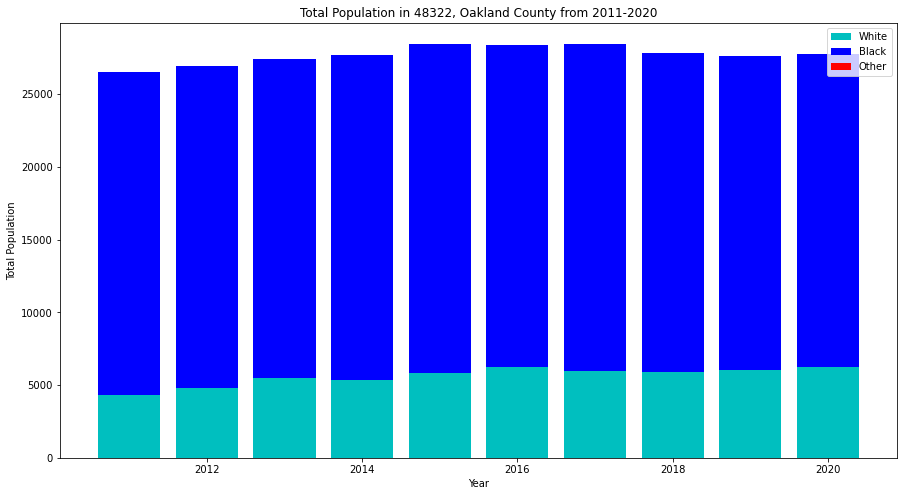

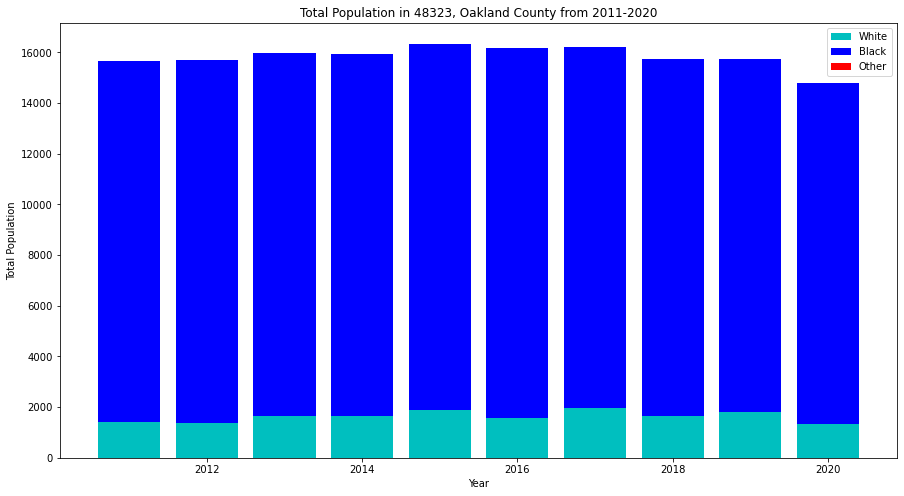

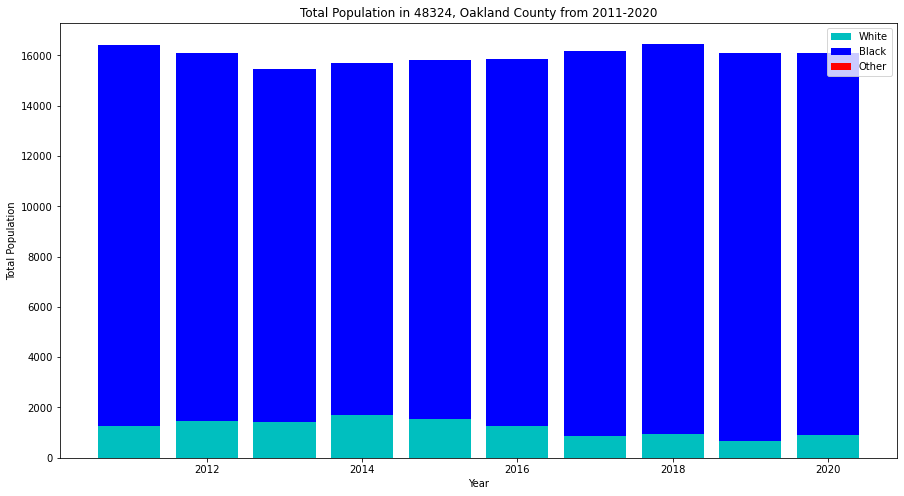

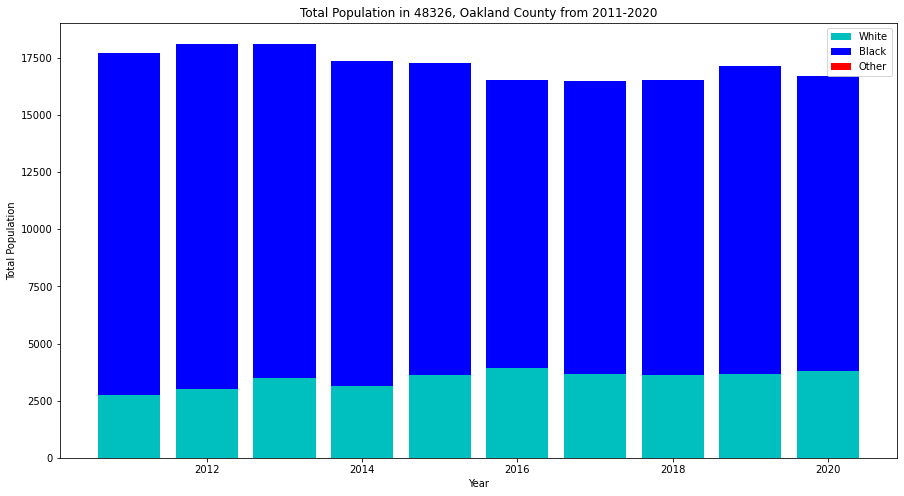

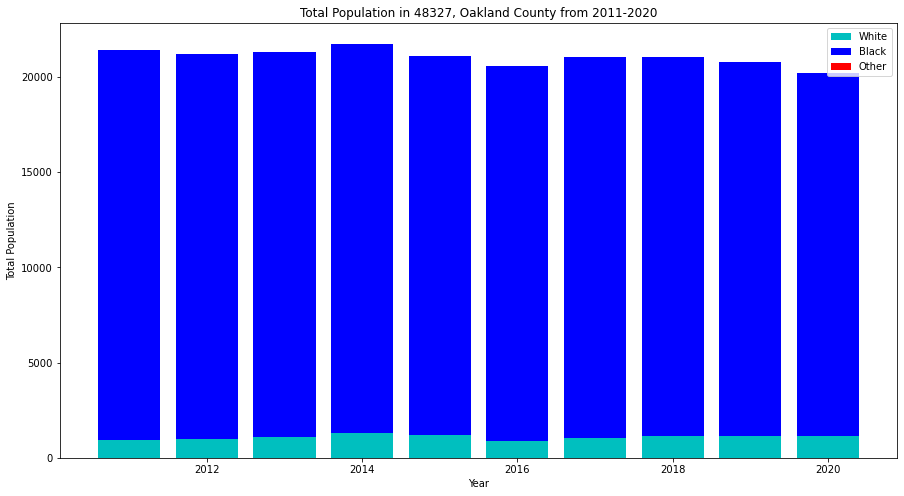

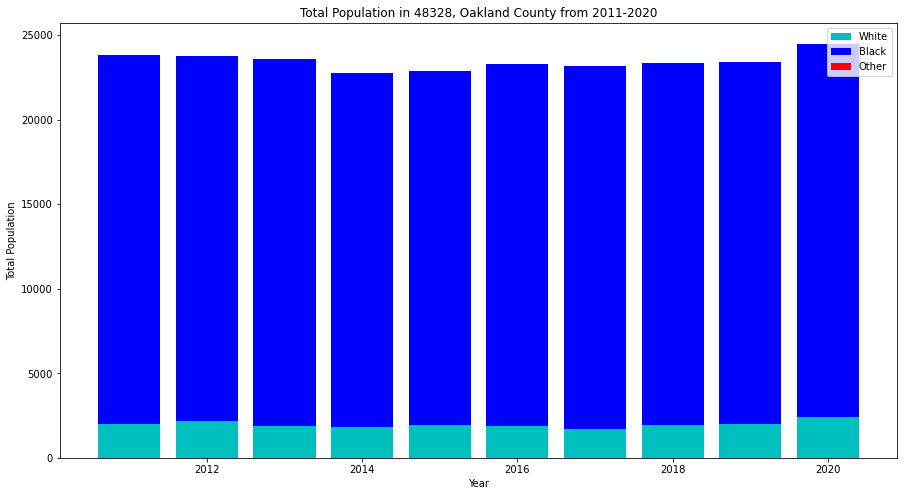

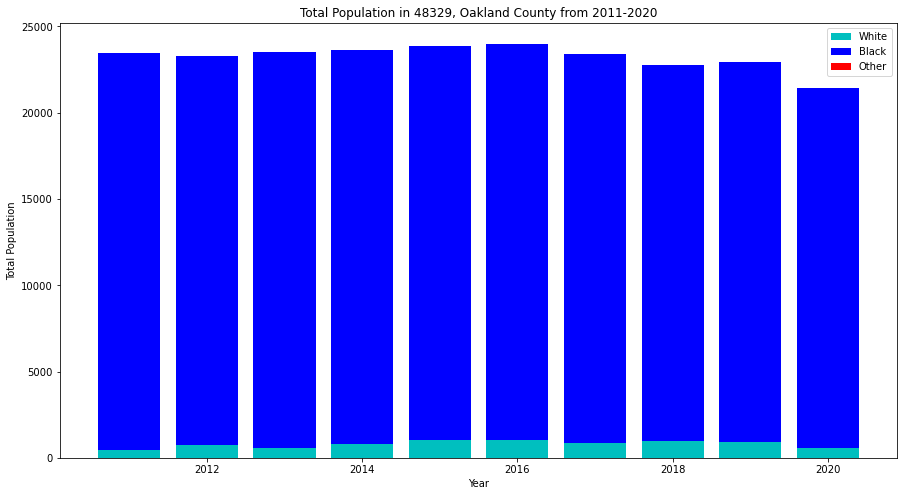

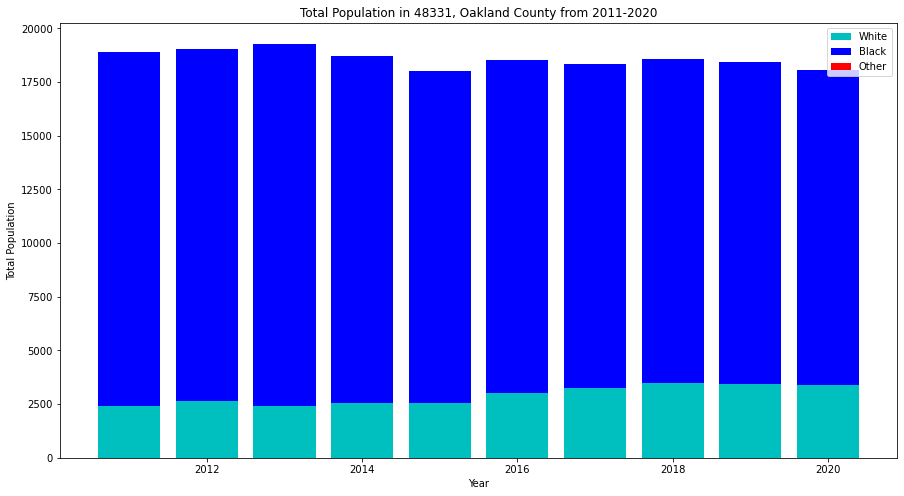

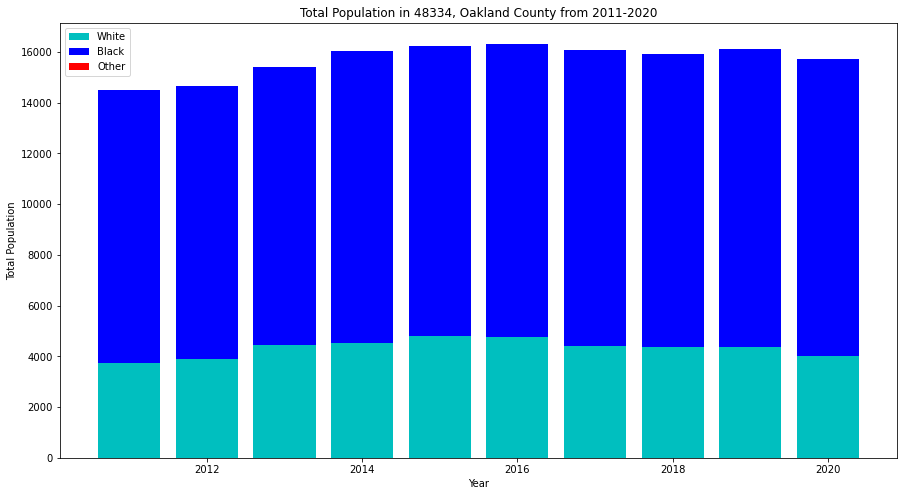

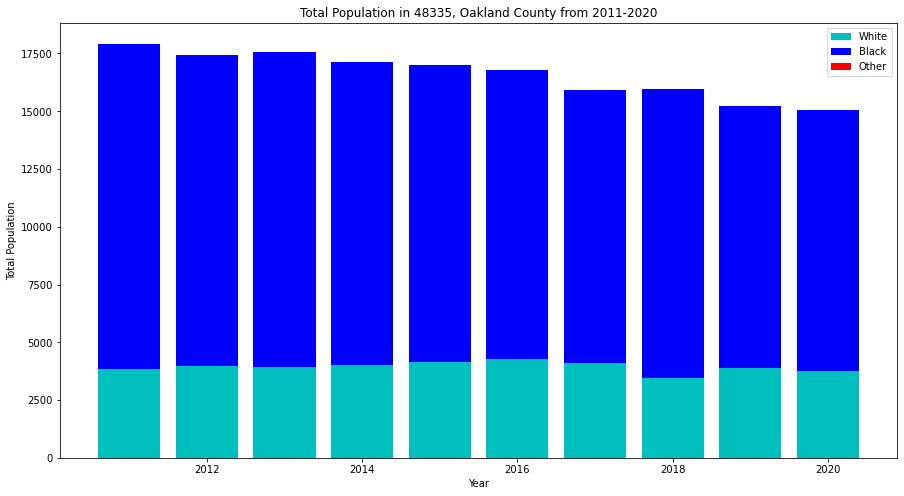

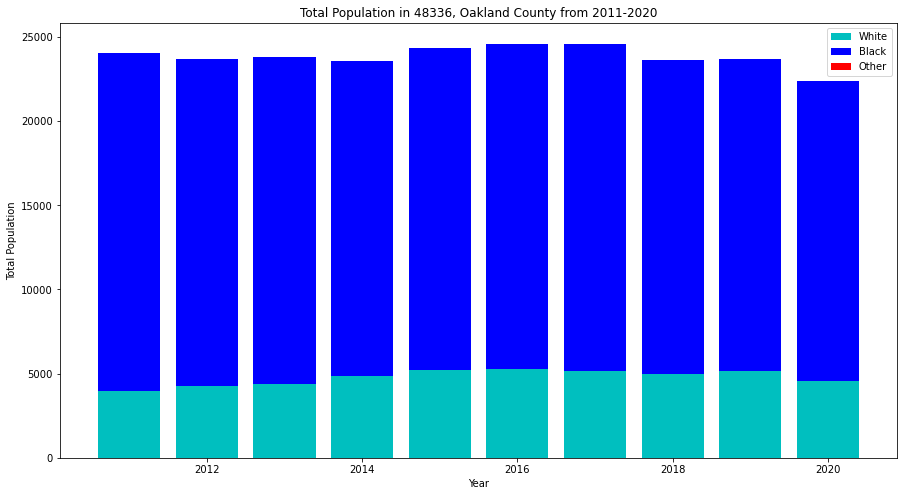

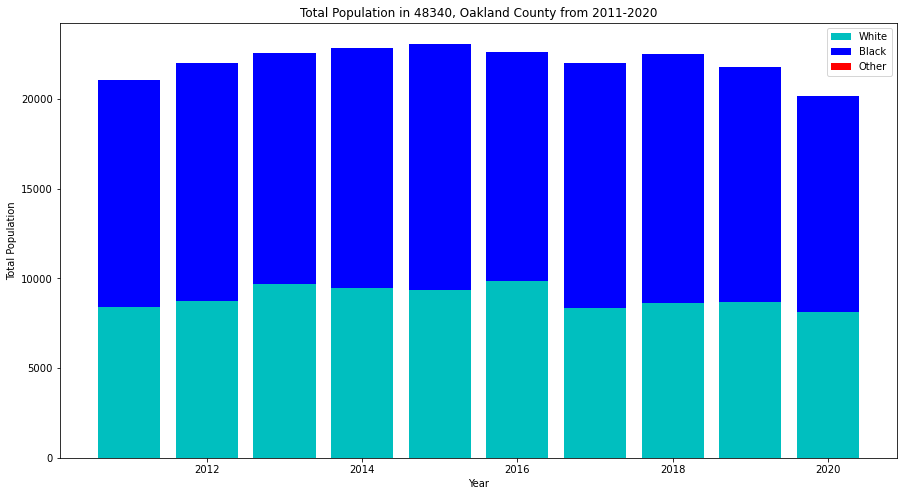

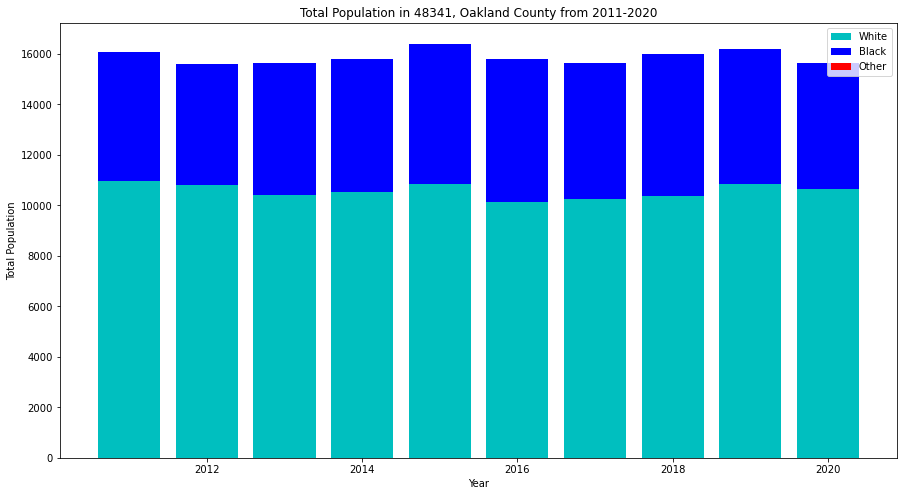

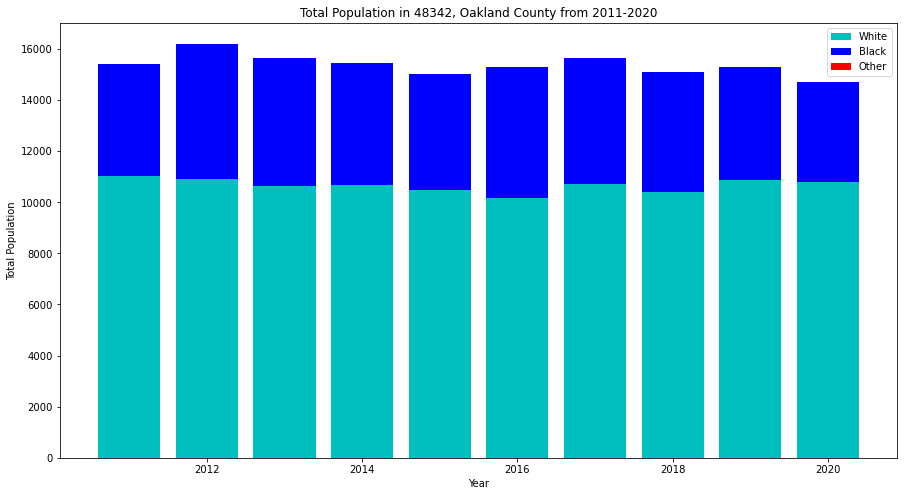

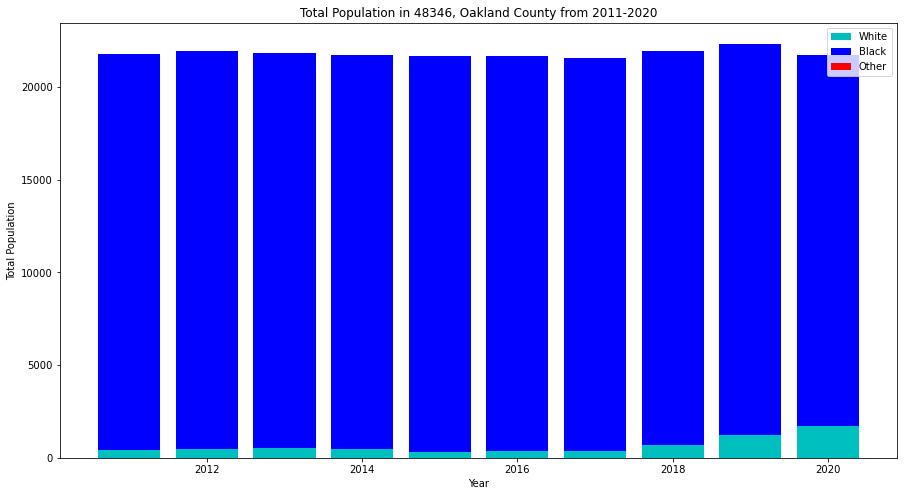

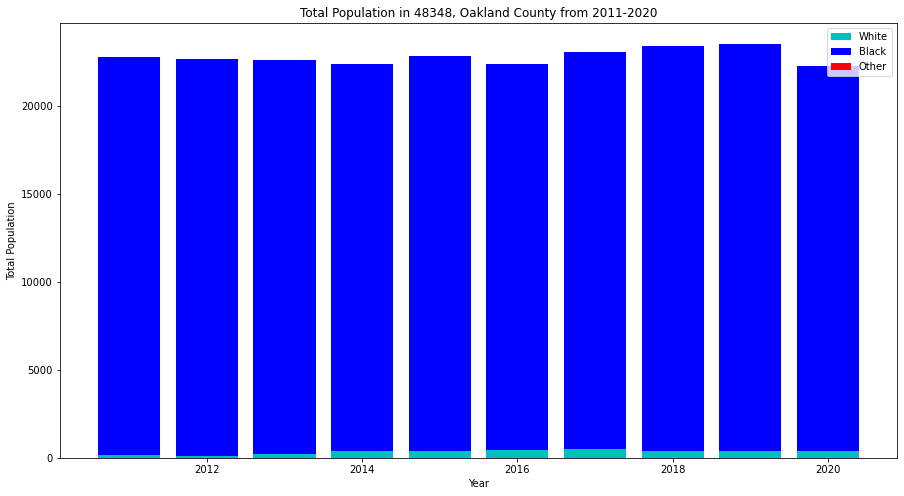

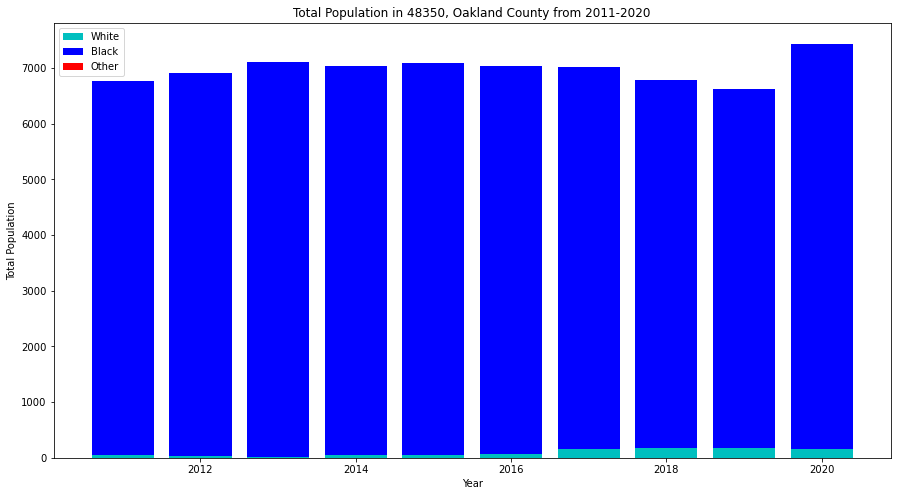

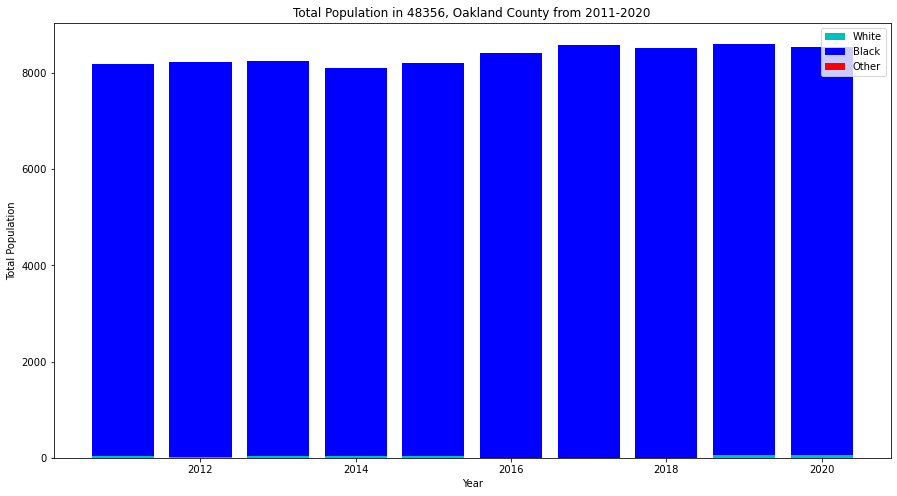

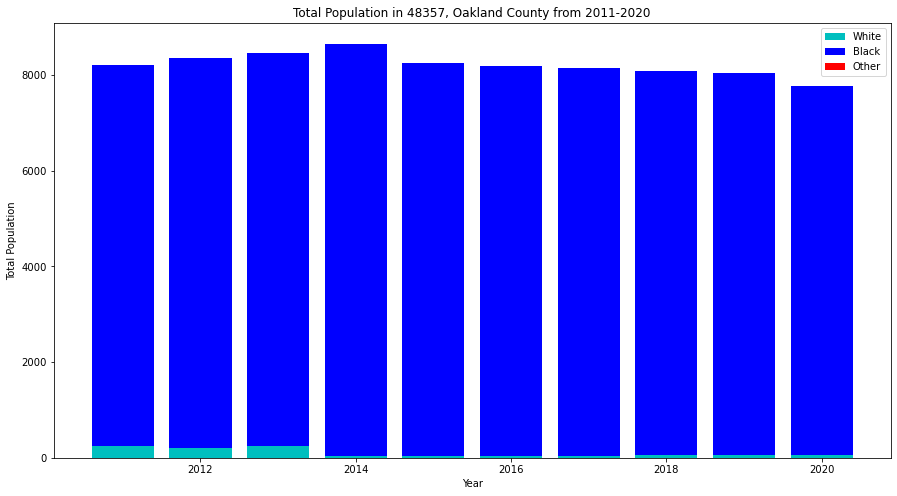

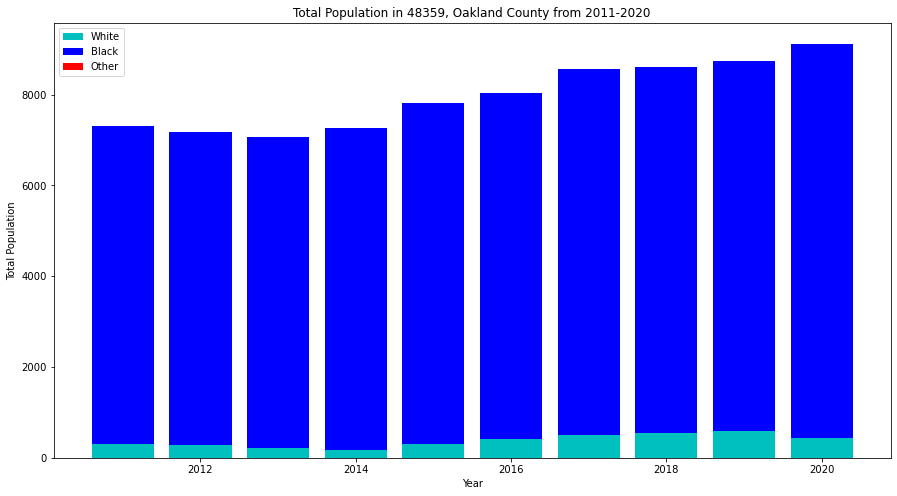

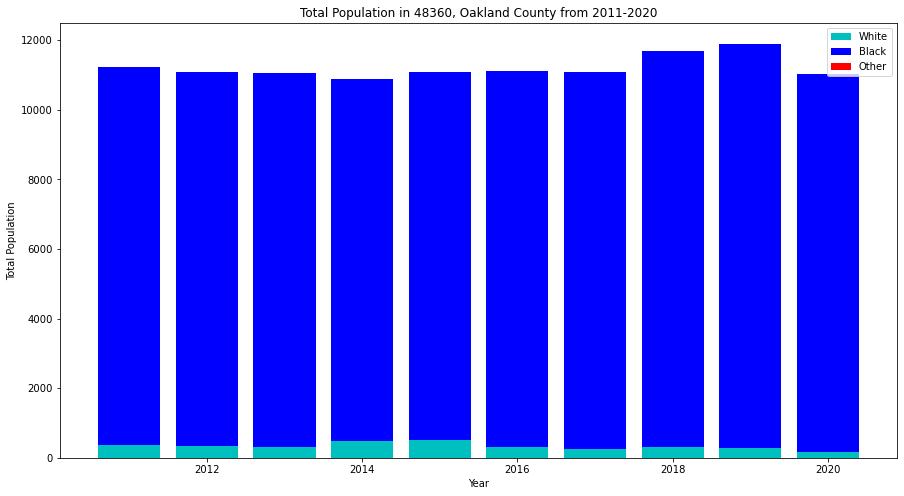

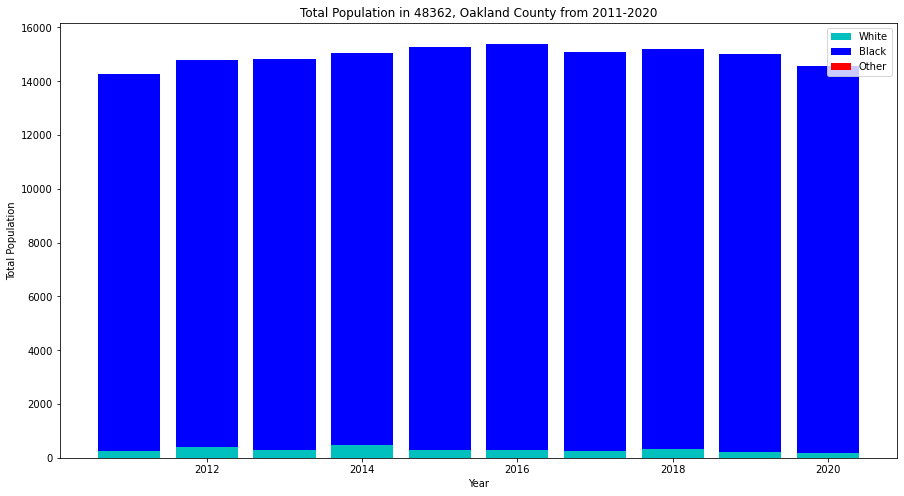

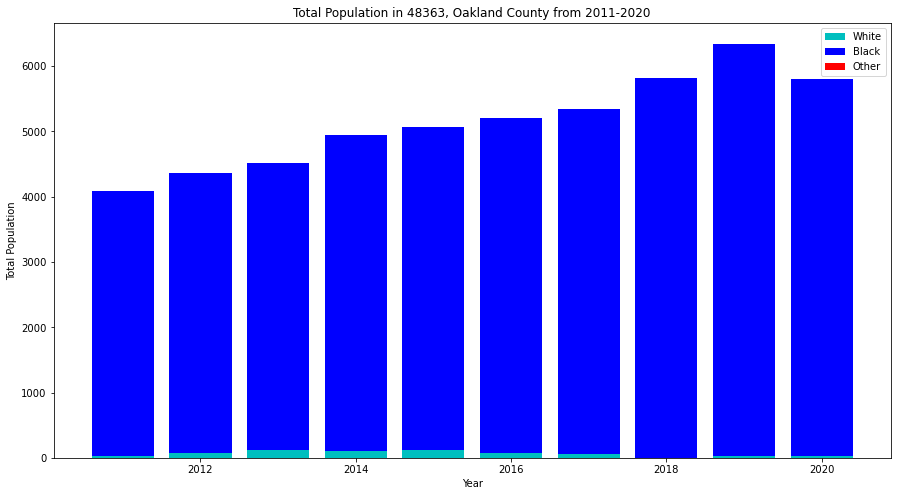

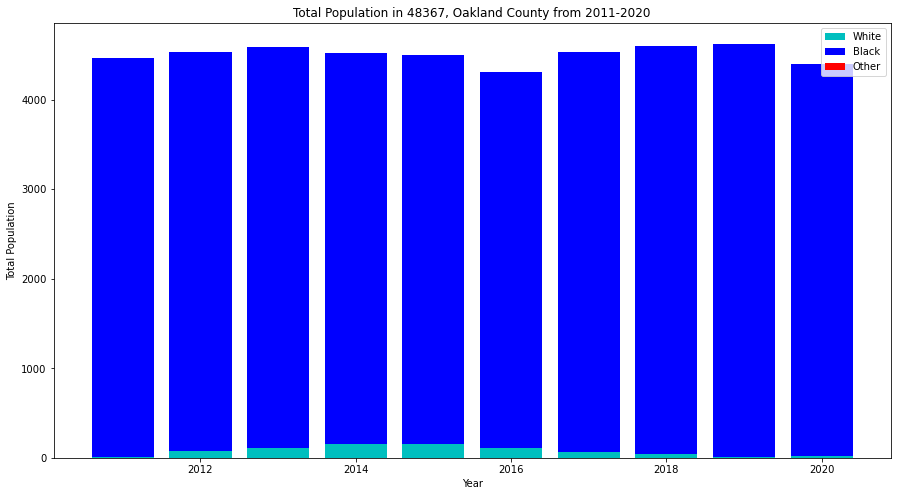

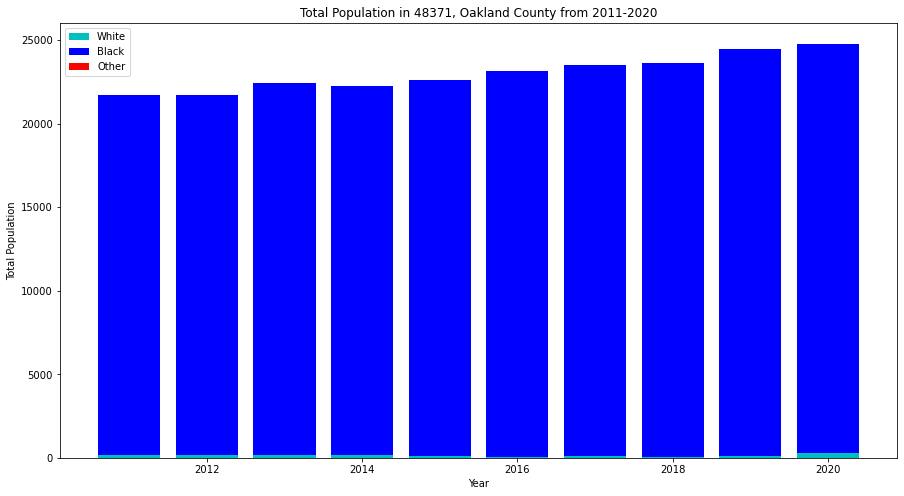

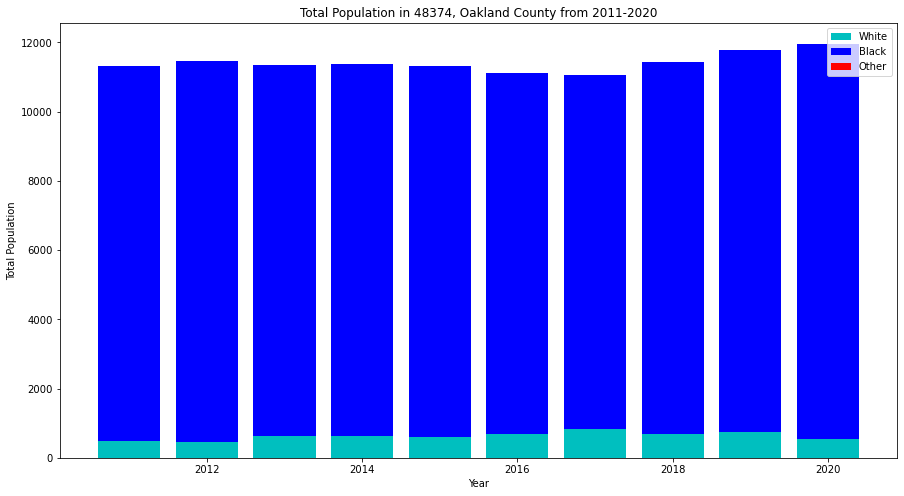

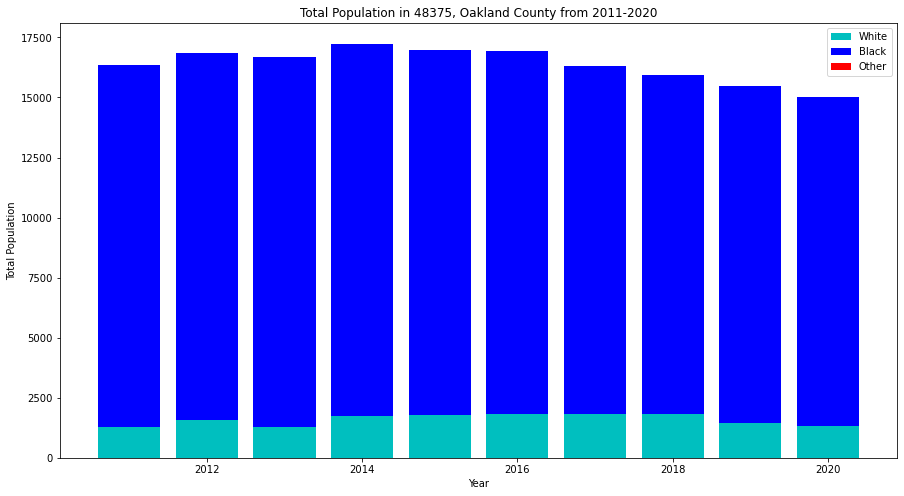

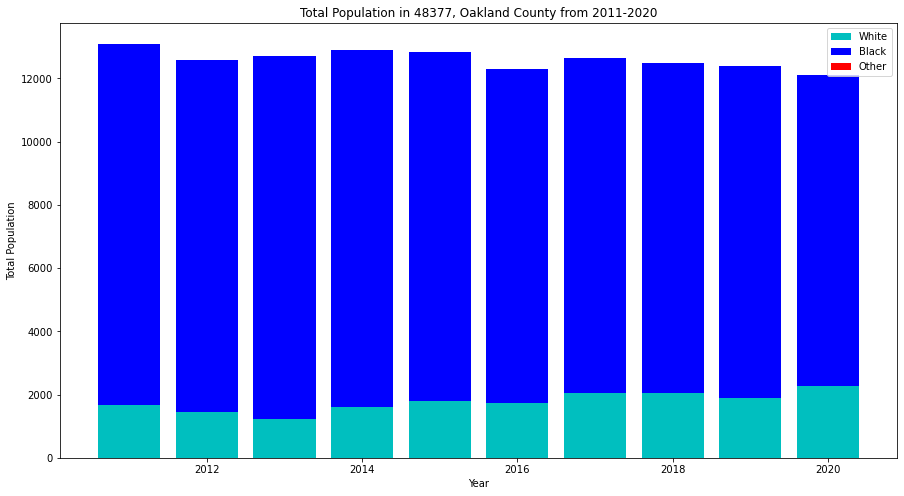

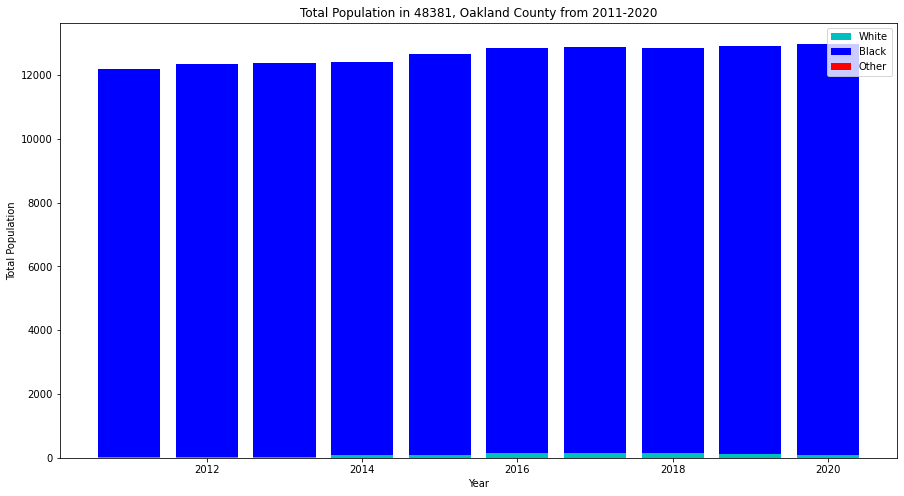

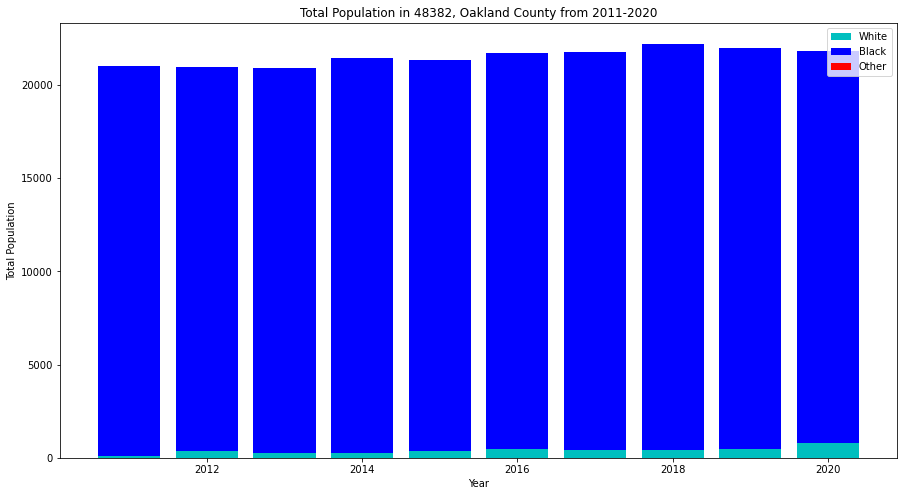

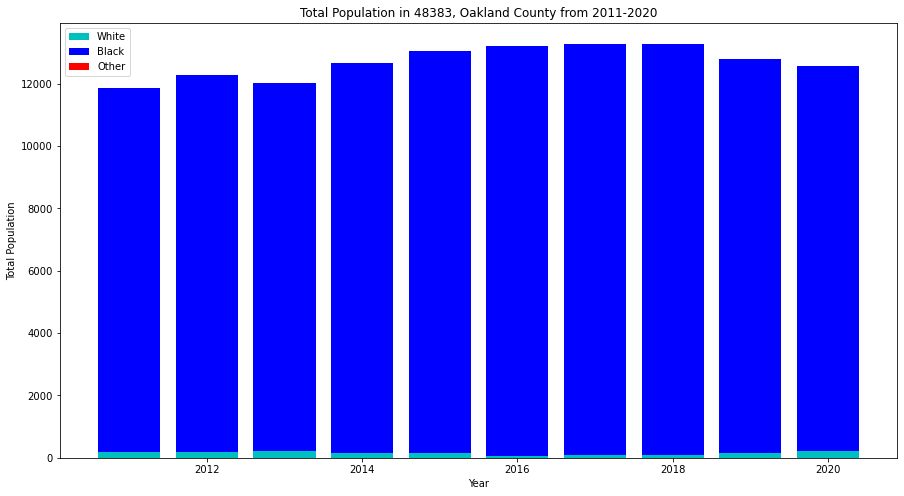

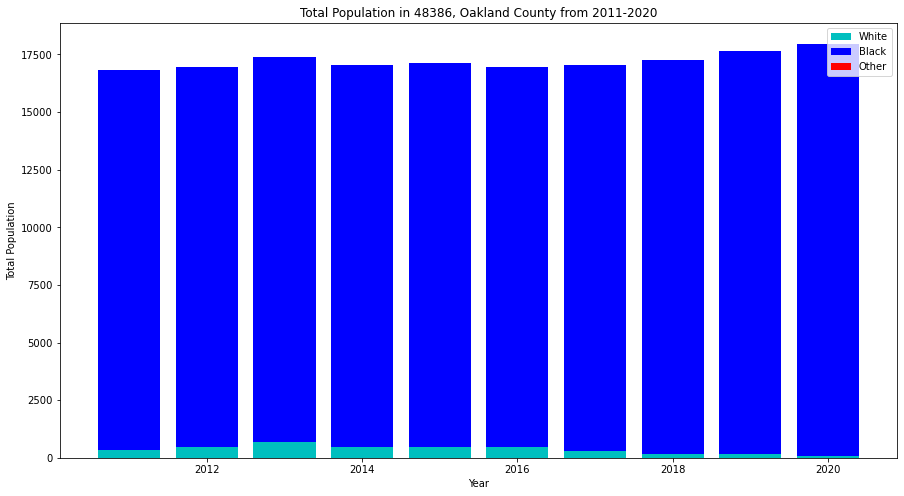

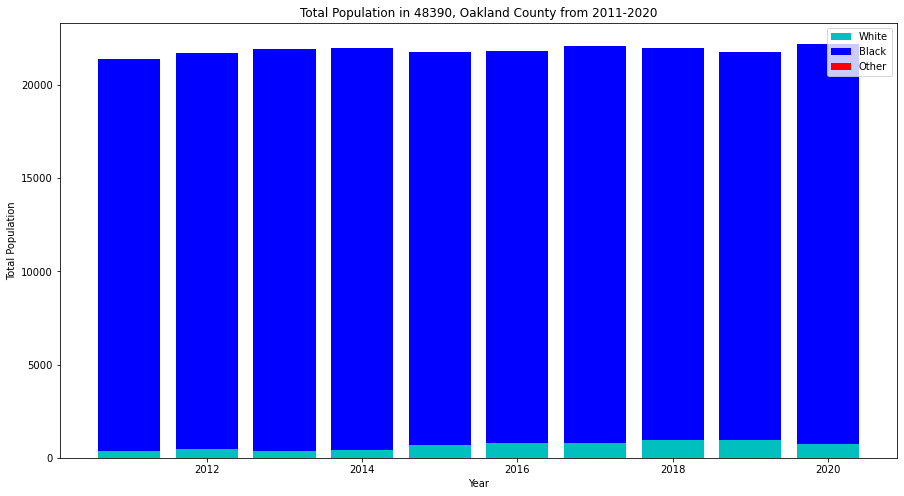

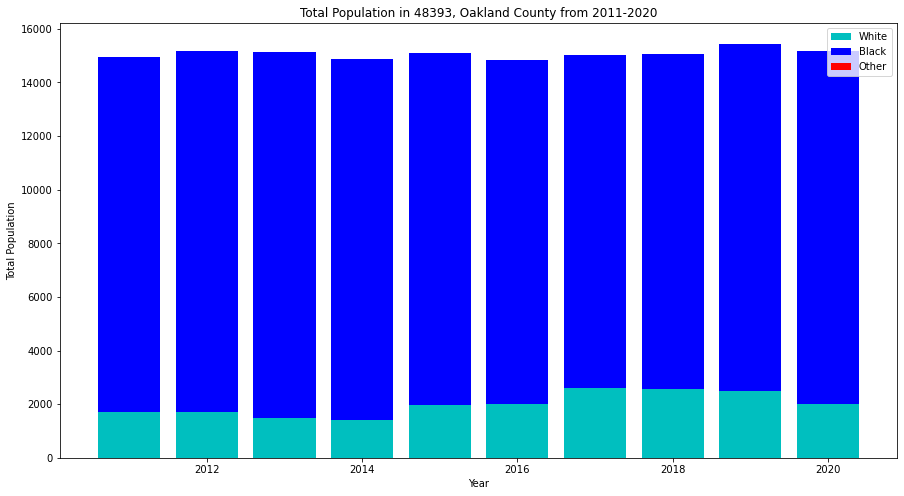

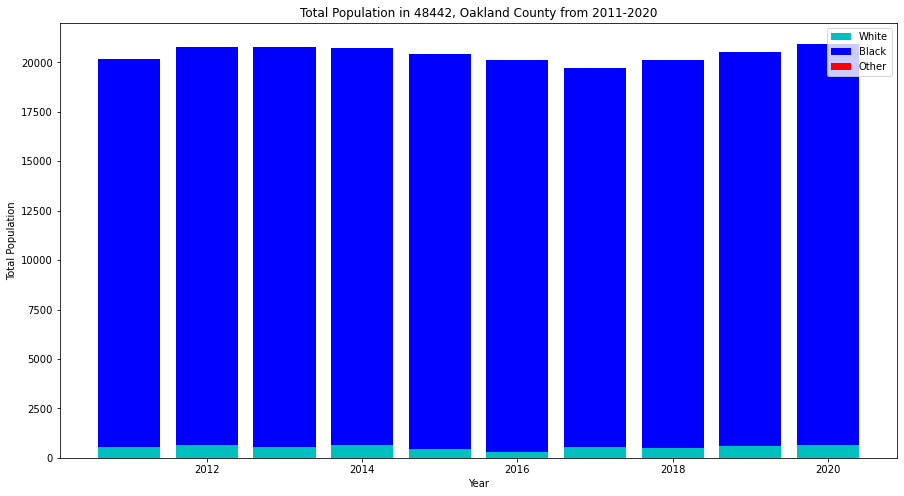

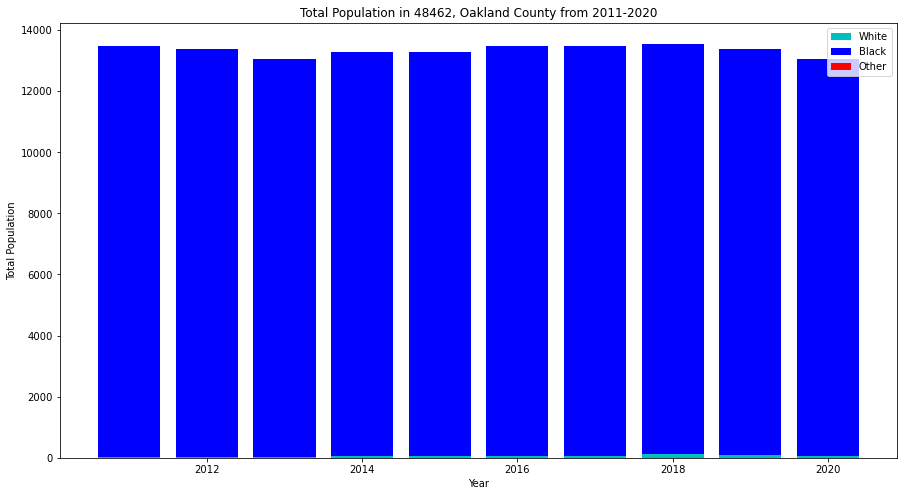

In [24]:
# Time analyses for population
time_analyses_stacked(oakland_data,"White Population","Black Population", 
                      "Total Population",["White","Black","Other"],"Oakland")

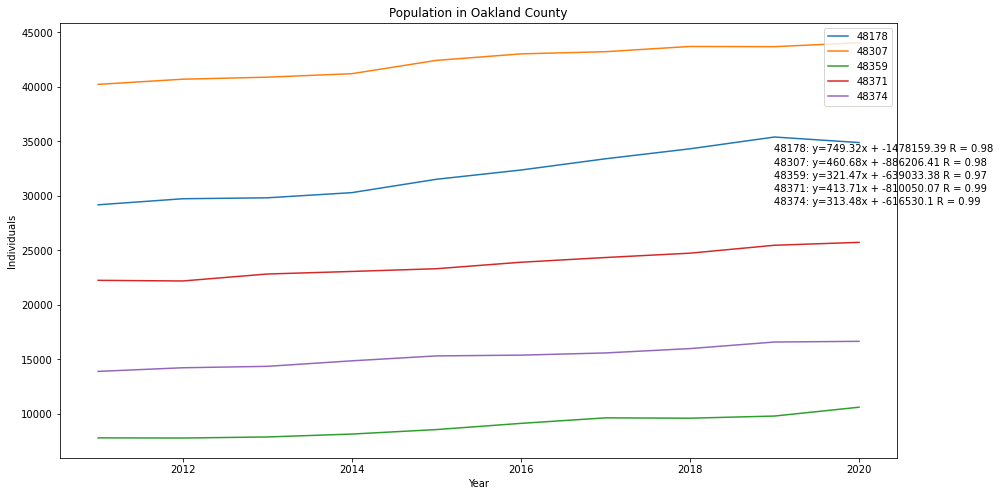

In [25]:
# Create initial plot
fig = plt.figure(figsize = (15,8))
# Blank lists for different values
r_values=[]
zipcodes=[]
slopes=[]
y_ints= []
# Calculate regression equations for all zipcodes
for zipcode in oakland_data["Zipcode"].unique():
    filtered = oakland_data.loc[oakland_data["Zipcode"] == zipcode]
    filtered = filtered.sort_values(by=["Zipcode","Year"])
    x = filtered["Year"]
    y = filtered["Total Population"]
    
    plt_slope,plt_int,plt_r,plt_p,plt_std_err = linregress(x,y)
    r_values.append(plt_r)
    zipcodes.append(zipcode)
    slopes.append(plt_slope)
    y_ints.append(plt_int)
# Limit the number of zipcodes to those with the most change and plot those
equations_df = pd.DataFrame({"Zipcode":zipcodes,"R":r_values,"Slope":slopes,"Y-intercept":y_ints})
equations_df = equations_df.loc[(abs(equations_df["R"]) > .7) & (abs(equations_df["Slope"])> 300)]
equations_df = pd.merge(equations_df,oakland_data,on="Zipcode",how="left")
equations_df = equations_df.sort_values(by=["Zipcode","Year"])
ann = 34000
for zipcode in equations_df["Zipcode"].unique():
    filtered_list = equations_df.loc[equations_df["Zipcode"]== zipcode]
    x = filtered_list["Year"]
    y = filtered_list["Total Population"]
    plt.plot(x,y)
    plt.legend(equations_df["Zipcode"].unique(),loc=1)    
    plt.annotate(f"{zipcode}: y={round((filtered_list['Slope'].mean()),2)}x + {round((filtered_list['Y-intercept'].mean()),2)} R = {round((filtered_list['R'].mean()),2)}", xy=(2019,ann))
    ann -= 1200
plt.title("Population in Oakland County")
plt.xlabel("Year")
plt.ylabel("Individuals")
plt.savefig("output_data/linregress_population_Oakland.png")
plt.show()

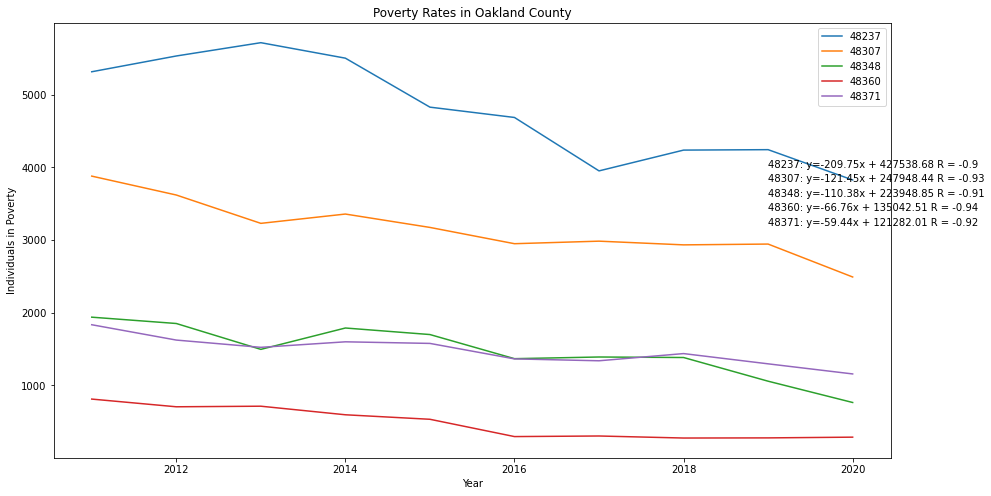

In [26]:
# Create initial plot
fig = plt.figure(figsize = (15,8))
# Blank lists for different values
r_values2=[]
zipcodes2=[]
slopes2=[]
y_ints2= []
# Calculate regression equations for all zipcodes
for zipcode in oakland_data["Zipcode"].unique():
    filtered = oakland_data.loc[oakland_data["Zipcode"] == zipcode]
    filtered = filtered.sort_values(by=["Zipcode","Year"])
    x = filtered["Year"]
    y = filtered["Poverty Count"]
    
    plt_slope,plt_int,plt_r,plt_p,plt_std_err = linregress(x,y)
    r_values2.append(plt_r)
    zipcodes2.append(zipcode)
    slopes2.append(plt_slope)
    y_ints2.append(plt_int)

# Limit the number of zipcodes to those with the most change and plot those
equations2_df = pd.DataFrame({"Zipcode":zipcodes2,"R":r_values2,"Slope":slopes2,"Y-intercept":y_ints2})
equations2_df = equations2_df.loc[(abs(equations2_df["R"]) > .9) & (abs(equations2_df["Slope"])> 50)]
equations2_df = pd.merge(equations2_df,oakland_data,on="Zipcode",how="left")
equations2_df = equations2_df.sort_values(by=["Zipcode","Year"])
# equations_df
ann = 4000
for zipcode in equations2_df["Zipcode"].unique():
    filtered_list = equations2_df.loc[equations2_df["Zipcode"]== zipcode]
    x = filtered_list["Year"]
    y = filtered_list["Poverty Count"]
    plt.plot(x,y)
    plt.legend(equations2_df["Zipcode"].unique(),loc=1)    
    plt.annotate(f"{zipcode}: y={round((filtered_list['Slope'].mean()),2)}x + {round((filtered_list['Y-intercept'].mean()),2)} R = {round((filtered_list['R'].mean()),2)}", xy=(2019,ann))
    ann -= 200
plt.title("Poverty Rates in Oakland County")
plt.xlabel("Year")
plt.ylabel("Individuals in Poverty")
plt.savefig("output_data/linregress_poverty_Oakland.png")
plt.show()

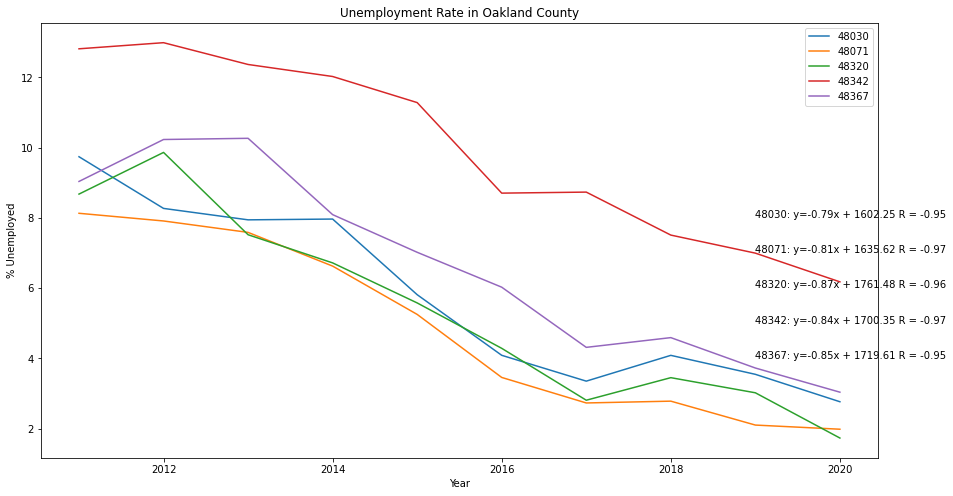

In [27]:
# Create initial plot
fig = plt.figure(figsize = (15,8))
# Blank lists for different values
r_values=[]
zipcodes=[]
slopes=[]
y_ints= []
# Calculate regression equations for all zipcodes
for zipcode in oakland_data["Zipcode"].unique():
    filtered = oakland_data.loc[oakland_data["Zipcode"] == zipcode]
    filtered = filtered.sort_values(by=["Zipcode","Year"])
    x = filtered["Year"]
    y = filtered["% Unemployed"]
    
    plt_slope,plt_int,plt_r,plt_p,plt_std_err = linregress(x,y)
    r_values.append(plt_r)
    zipcodes.append(zipcode)
    slopes.append(plt_slope)
    y_ints.append(plt_int)
# Limit the number of zipcodes to those with the most change and plot those
equations_df = pd.DataFrame({"Zipcode":zipcodes,"R":r_values,"Slope":slopes,"Y-intercept":y_ints})
equations_df = equations_df.loc[(abs(equations_df["R"]) > .7) & (abs(equations_df["Slope"])> .75)]
equations_df = pd.merge(equations_df,oakland_data,on="Zipcode",how="left")
equations_df = equations_df.sort_values(by=["Zipcode","Year"])
ann = 8
for zipcode in equations_df["Zipcode"].unique():
    filtered_list = equations_df.loc[equations_df["Zipcode"]== zipcode]
    x = filtered_list["Year"]
    y = filtered_list["% Unemployed"]
    plt.plot(x,y)
    plt.legend(equations_df["Zipcode"].unique(),loc=1)    
    plt.annotate(f"{zipcode}: y={round((filtered_list['Slope'].mean()),2)}x + {round((filtered_list['Y-intercept'].mean()),2)} R = {round((filtered_list['R'].mean()),2)}", xy=(2019,ann))
    ann -= 1
plt.title("Unemployment Rate in Oakland County")
plt.xlabel("Year")
plt.ylabel("% Unemployed")
plt.savefig("output_data/linregress_unemployment_Oakland.png")
plt.show()

## Kent County Analyses

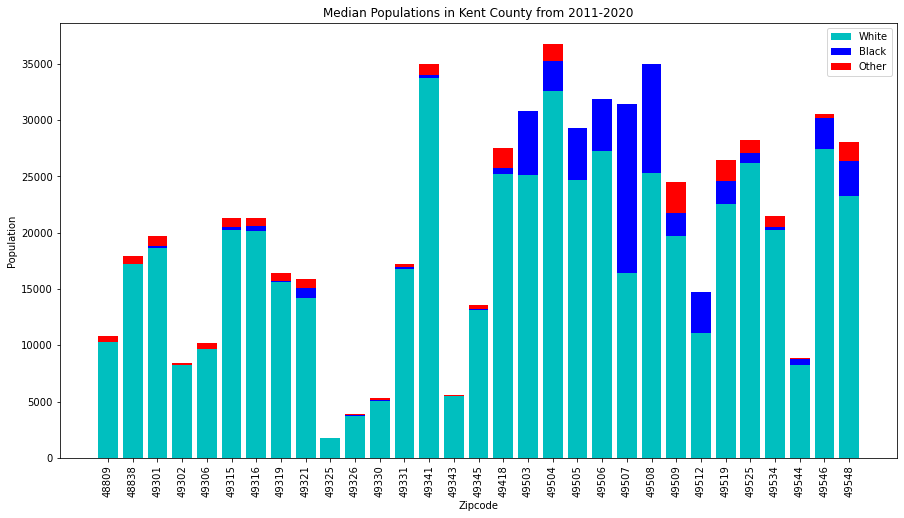

In [28]:
# Stacked bar chart for population by county

fig = plt.figure(figsize = (15,8))
xaxis = np.arange(0,len(kent_grouped.index))
label = (kent_grouped.index.tolist())
line1 = plt.bar(xaxis,kent_grouped["White Population"],color='c',label="")
plt.xticks(ticks=xaxis,labels=label,rotation=90)
line3 = plt.bar(xaxis,(kent_grouped["Total Population"]-kent_grouped["Black Population"]-kent_grouped["White Population"]),
                       label=label,bottom=kent_grouped["White Population"],color='r')
line2 = plt.bar(xaxis,kent_grouped["Black Population"],label=label,bottom=kent_grouped["White Population"],color='b')
plt.legend([line1, line2,line3],["White","Black","Other"])
plt.xlabel("Zipcode")
plt.ylabel("Population")
plt.title("Median Populations in Kent County from 2011-2020")
plt.savefig("output_data/populations_Kent.png")
plt.show()


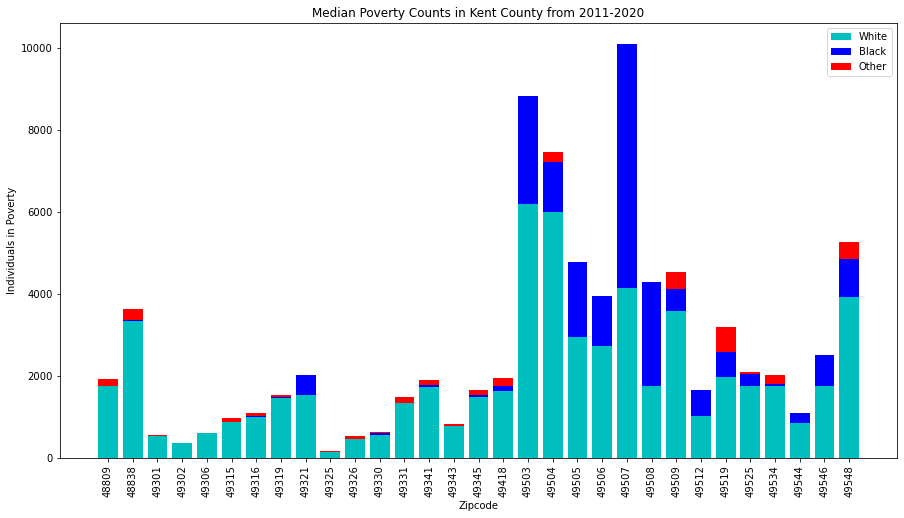

In [29]:
# Stacked bar chart for poverty rates
fig = plt.figure(figsize = (15,8))
xaxis = np.arange(0,len(kent_grouped.index))
label = (kent_grouped.index.tolist())
line1 = plt.bar(xaxis,kent_grouped["Poverty Count - White"],color='c',label="")
plt.xticks(ticks=xaxis,labels=label,rotation=90)
line3 = plt.bar(xaxis,(kent_grouped["Poverty Count"]-kent_grouped["Poverty Count - Black"]-kent_grouped["Poverty Count - White"]),
                       label=label,bottom=kent_grouped["Poverty Count - White"],color='r')
line2 = plt.bar(xaxis,kent_grouped["Poverty Count - Black"],label=label,bottom=kent_grouped["Poverty Count - White"],color='b')
plt.legend([line1, line2,line3],["White","Black","Other"])
plt.xlabel("Zipcode")
plt.ylabel("Individuals in Poverty")
plt.title("Median Poverty Counts in Kent County from 2011-2020")
plt.savefig("output_data/poverty_Kent.png")
plt.show()

<Figure size 504x288 with 0 Axes>

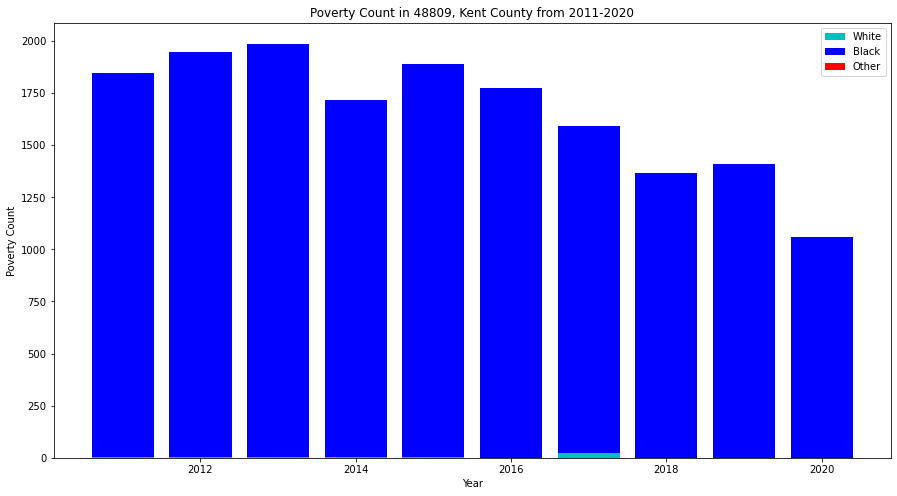

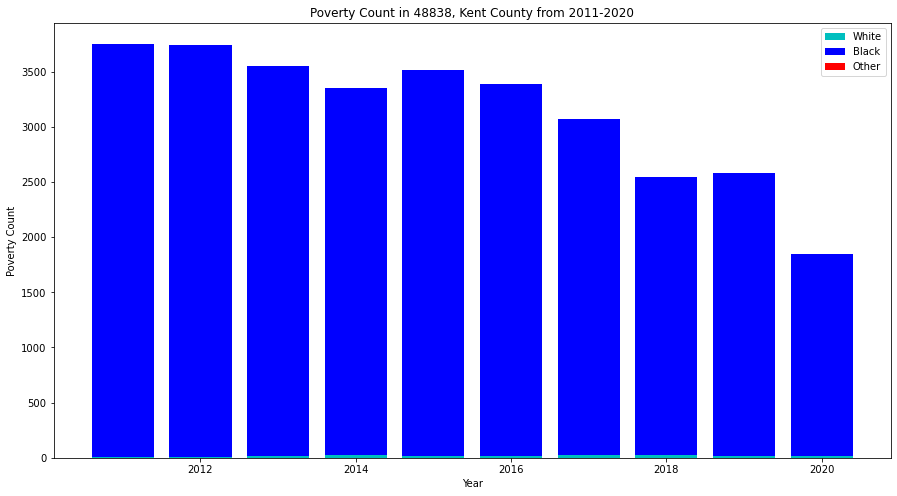

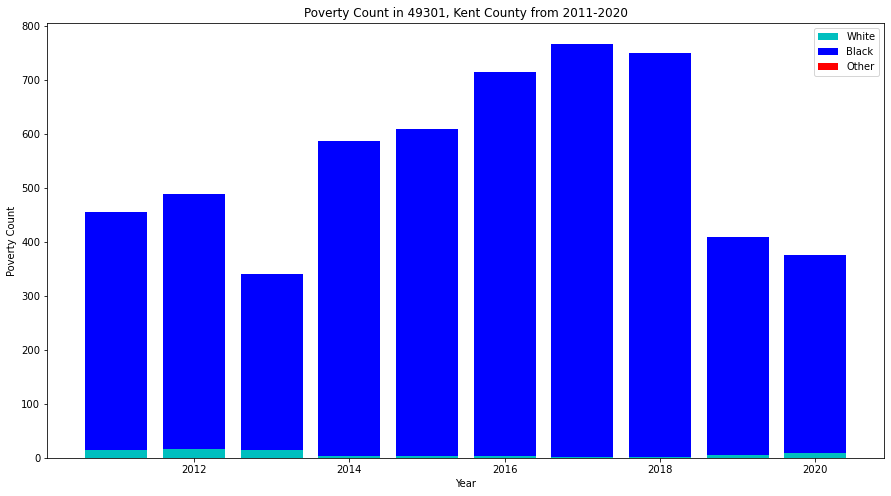

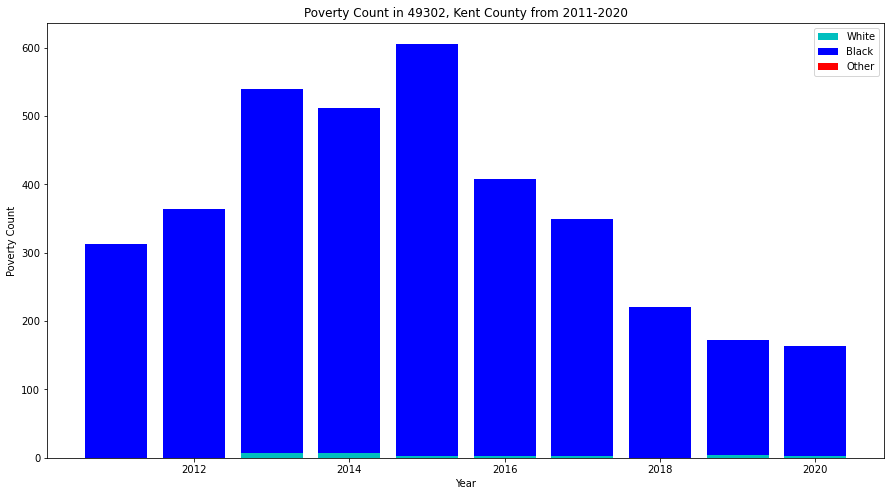

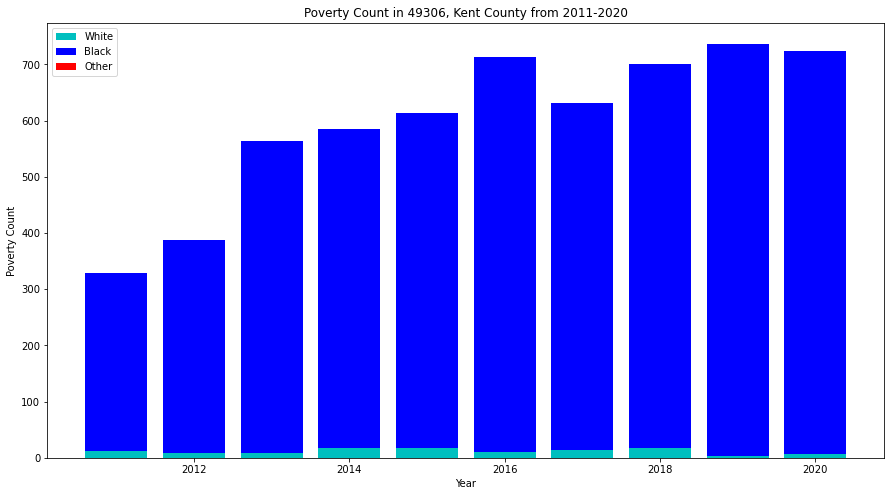

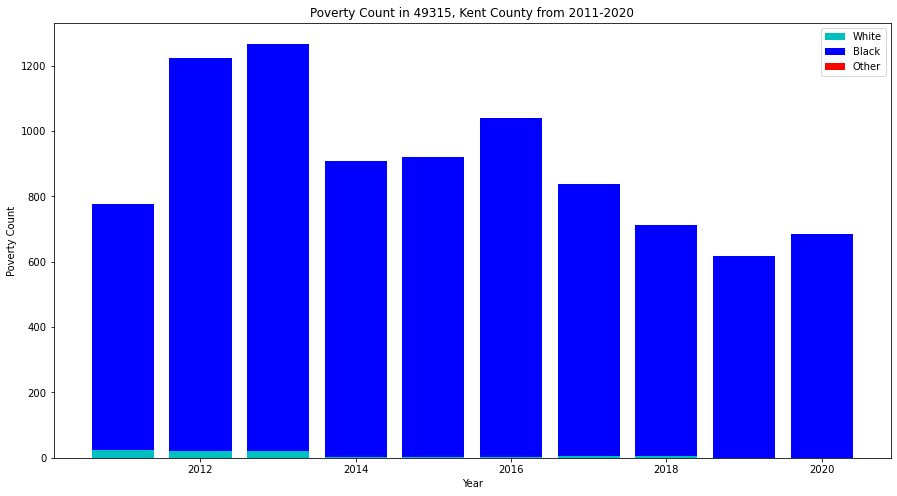

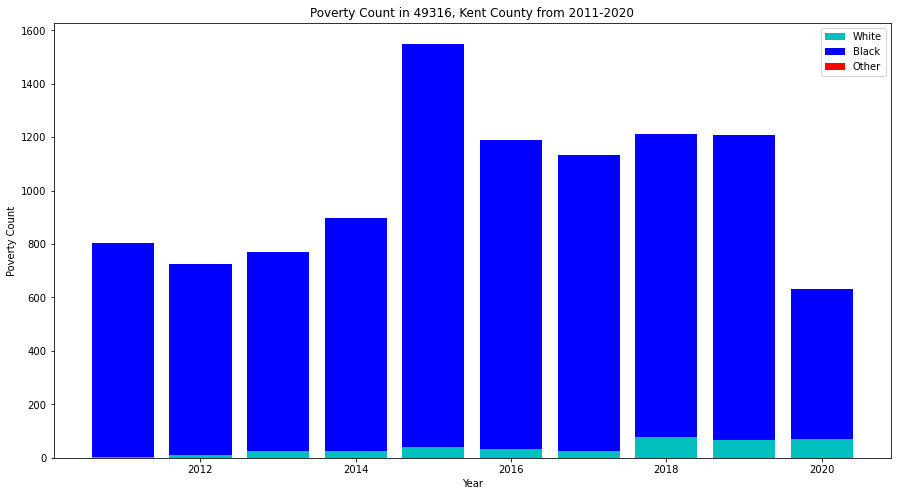

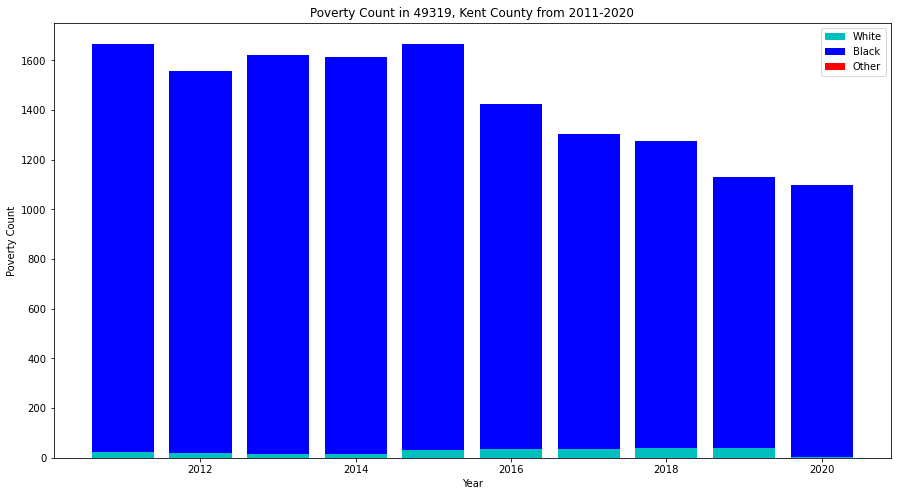

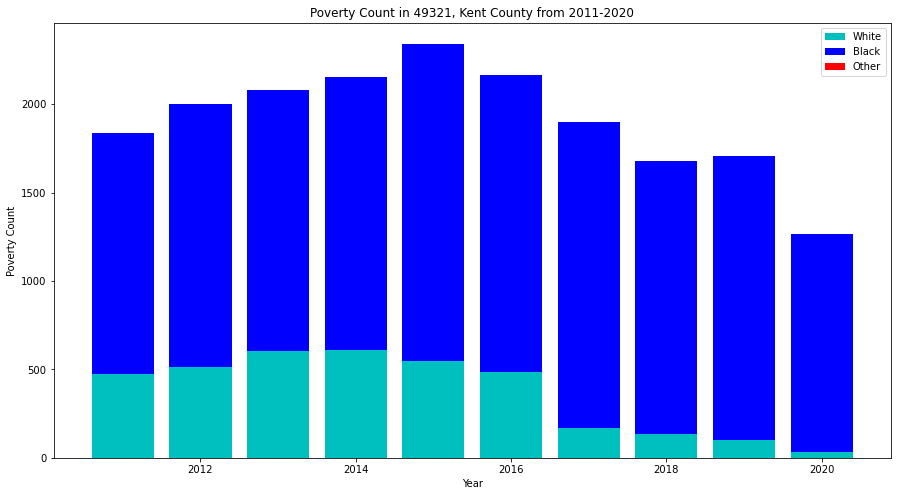

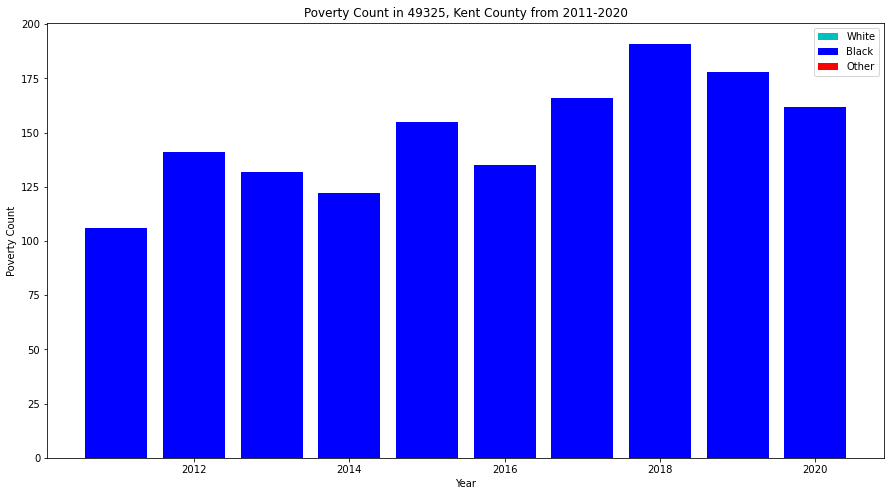

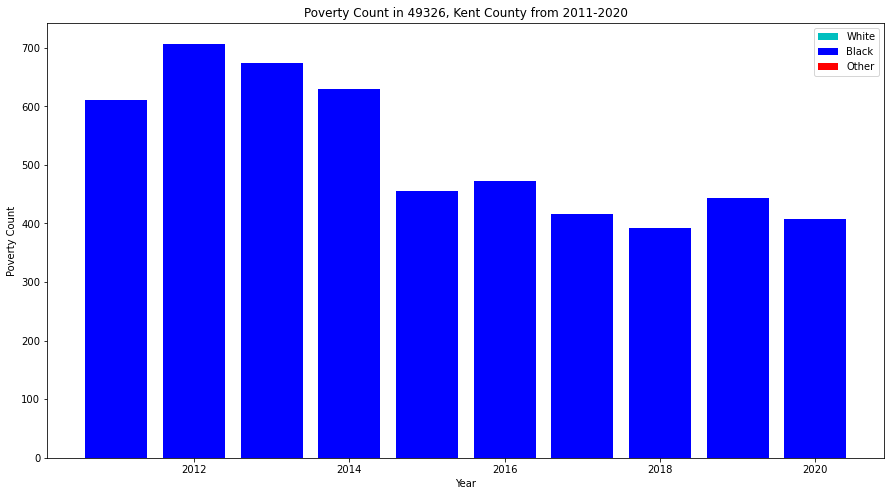

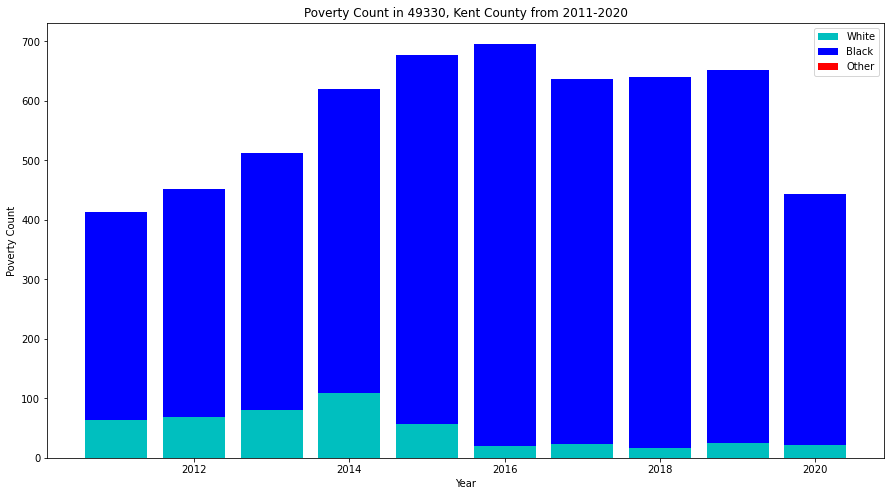

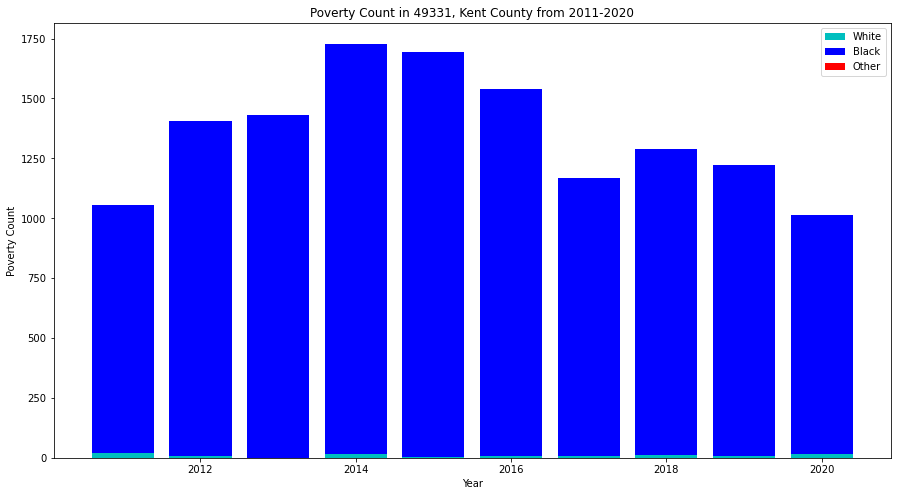

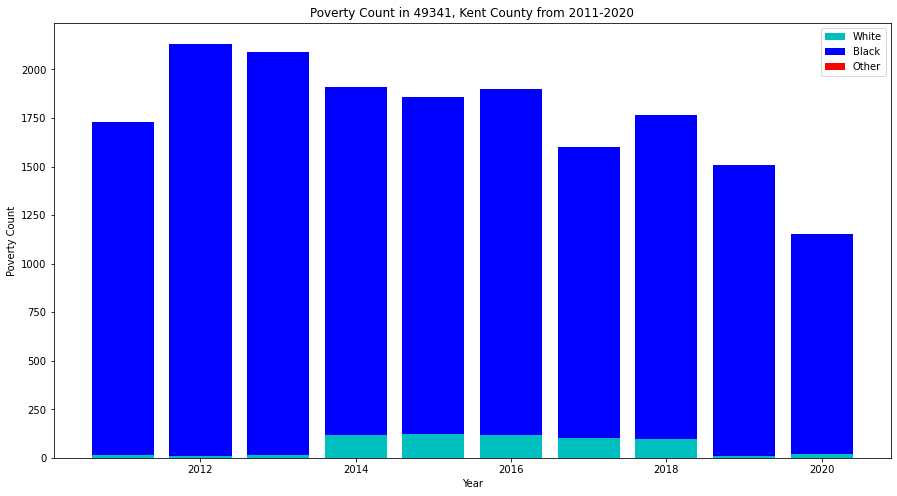

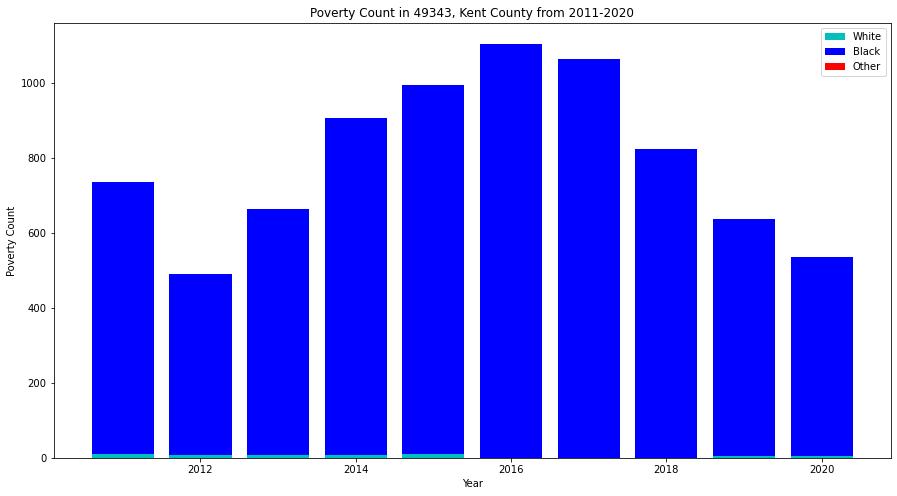

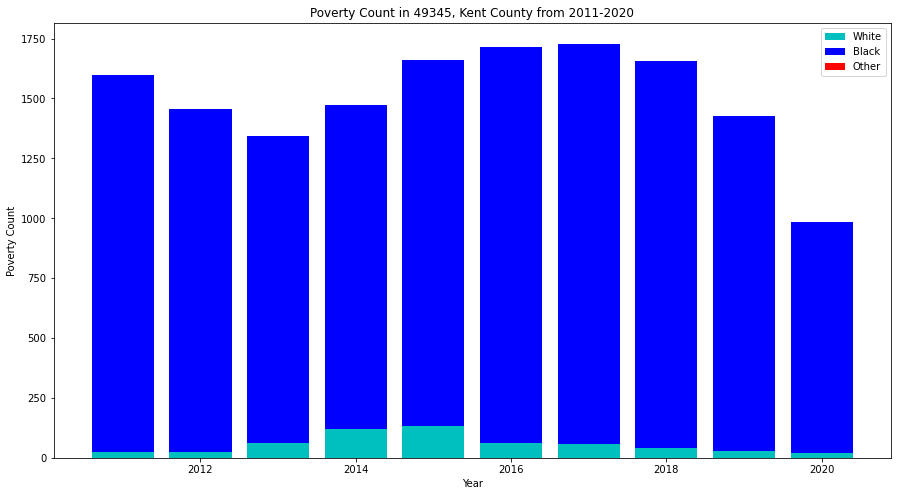

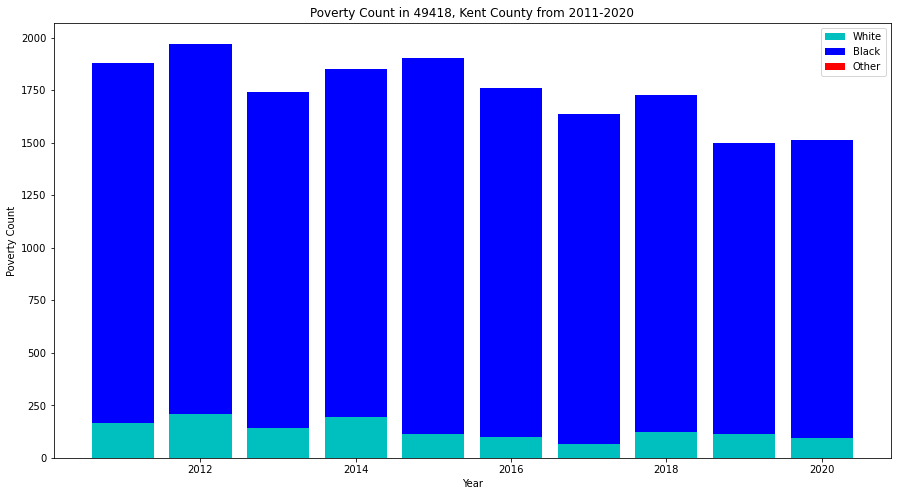

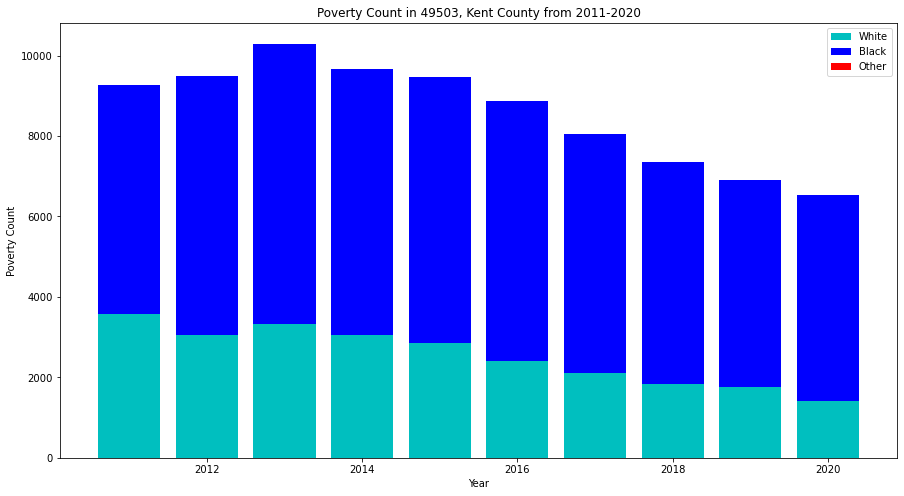

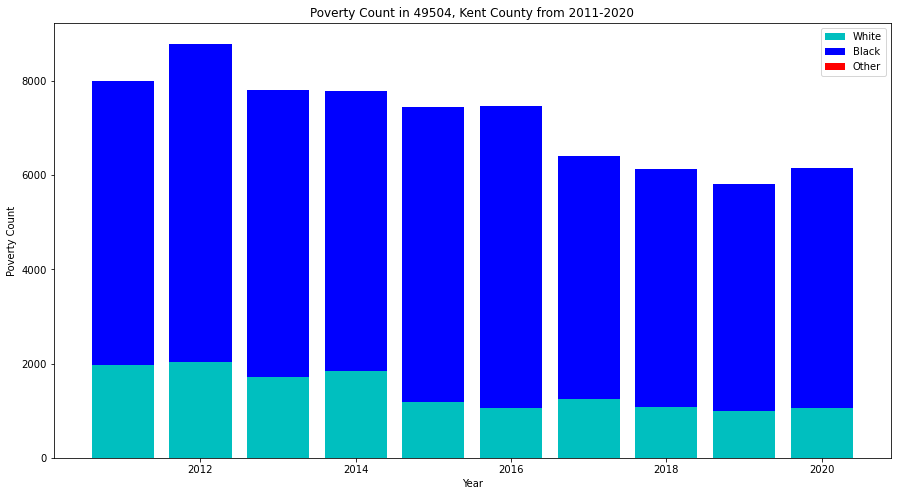

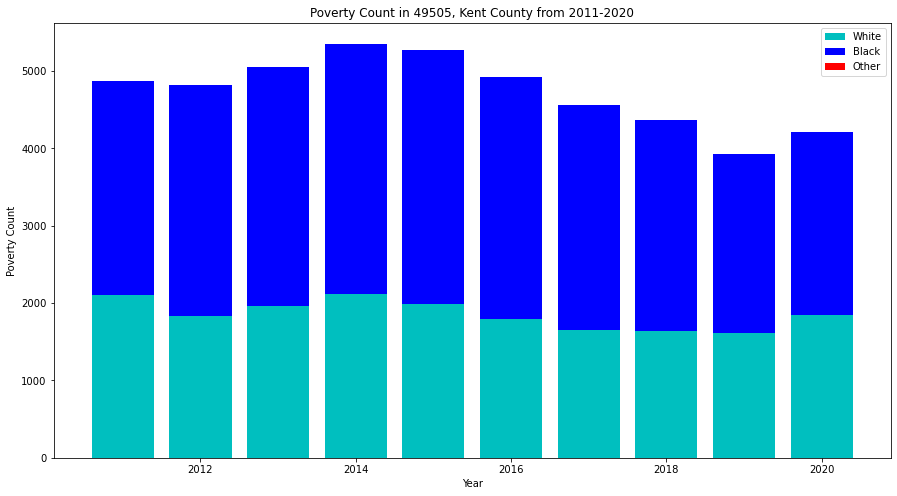

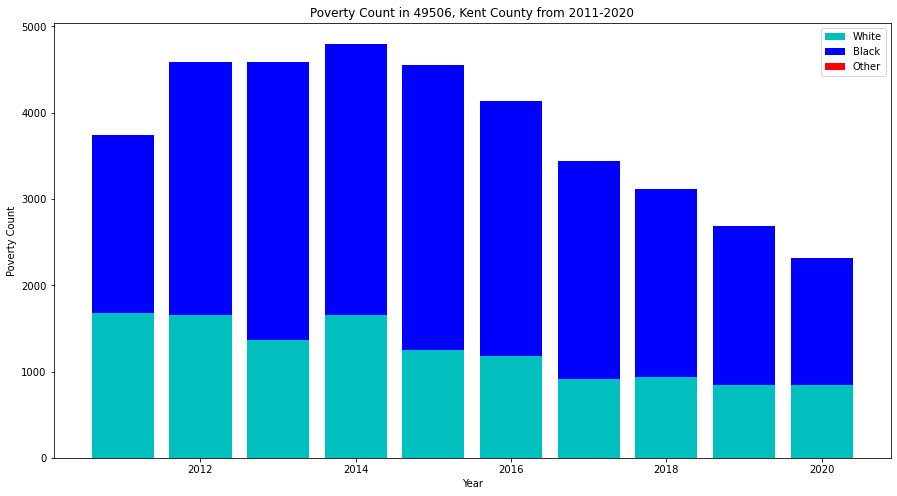

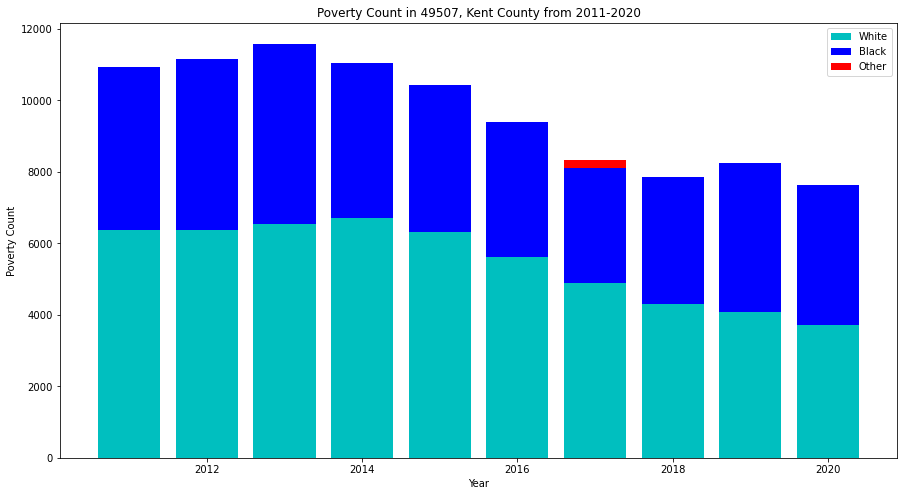

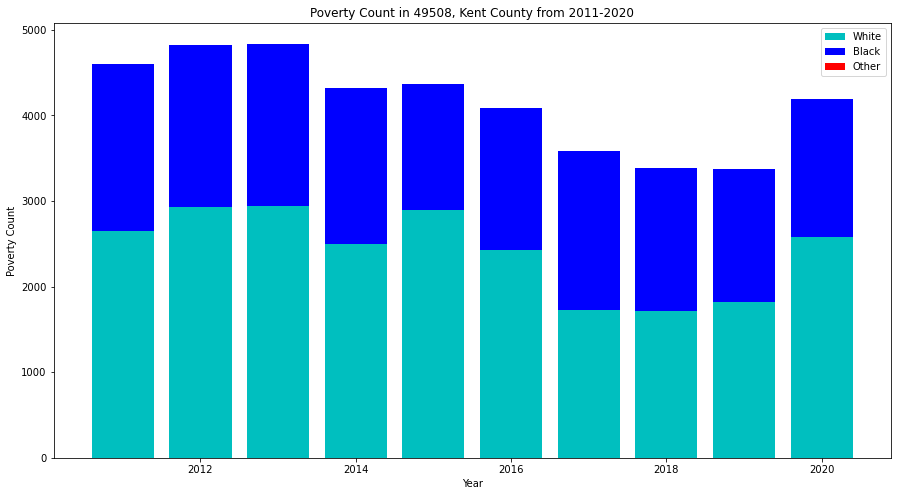

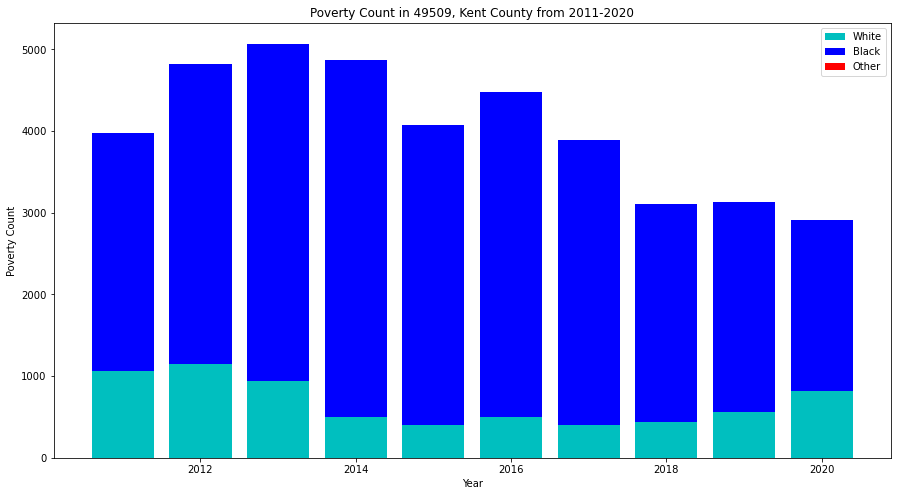

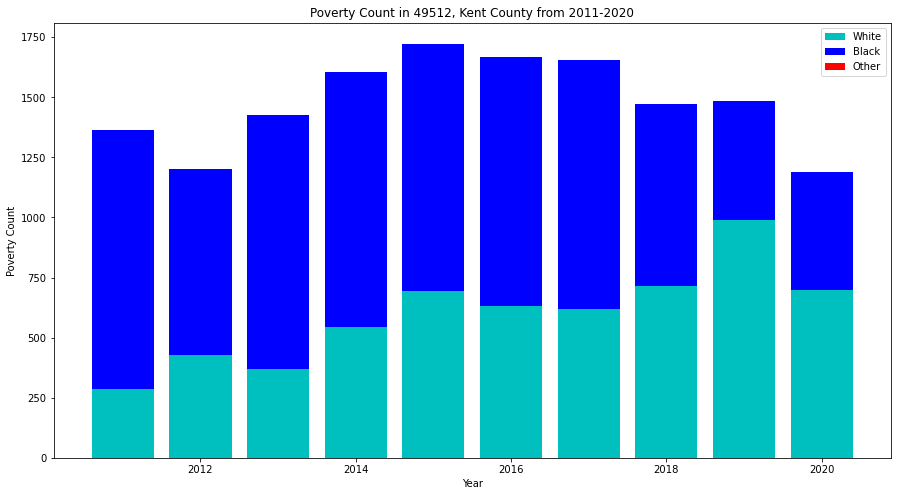

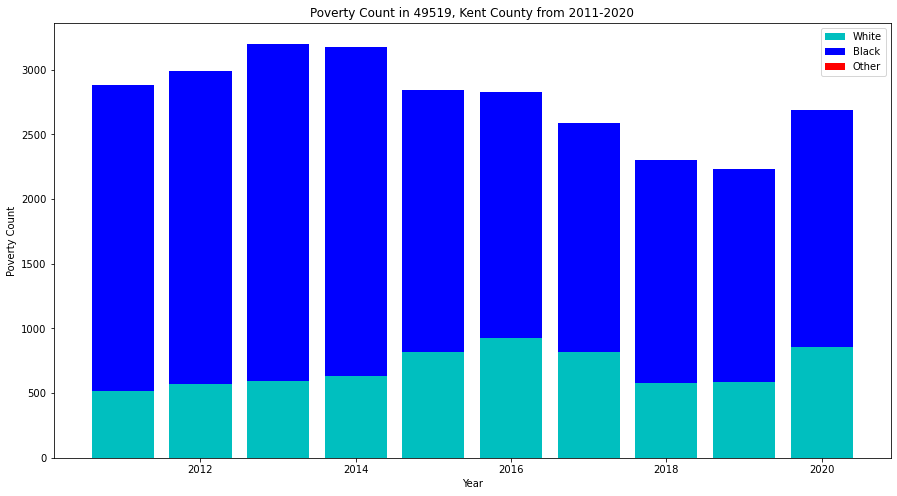

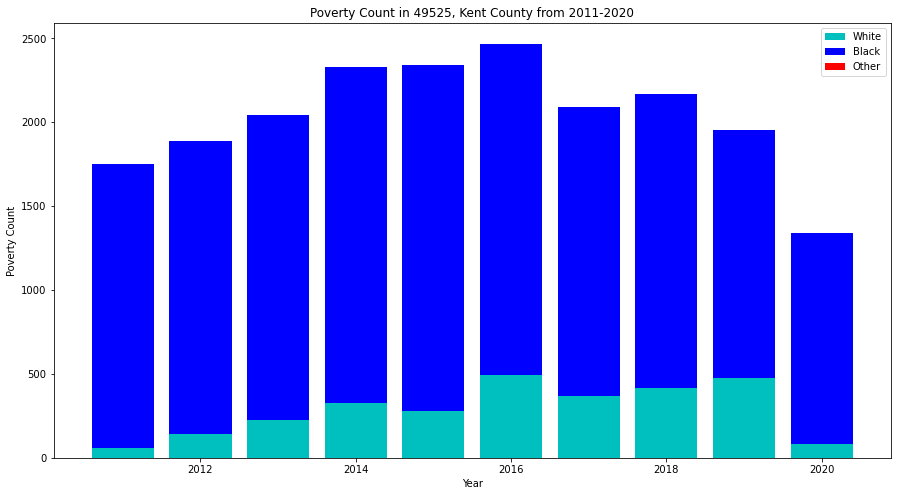

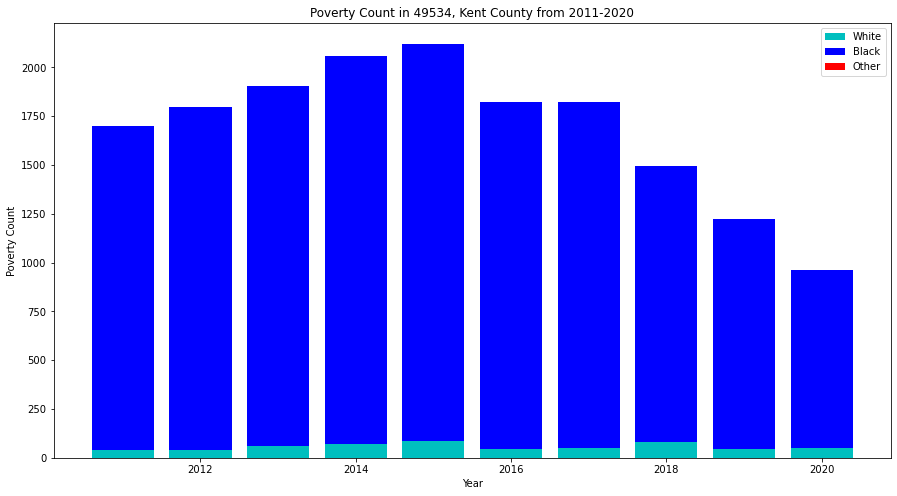

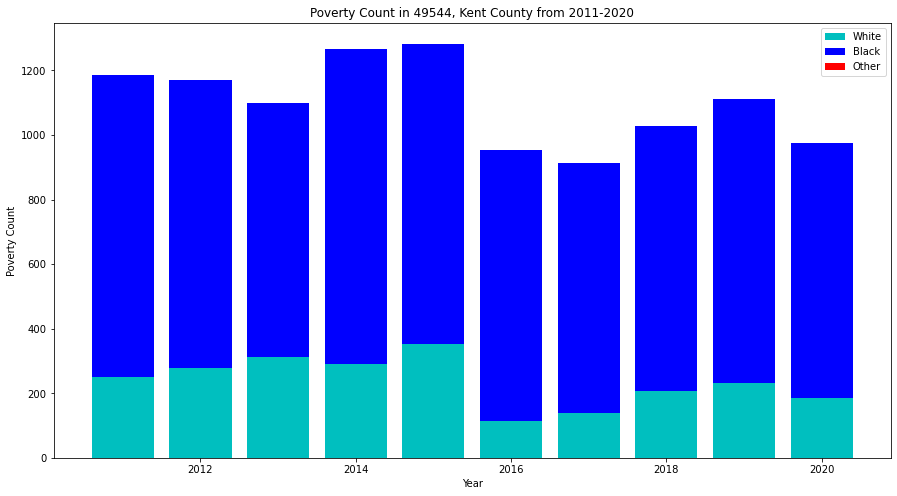

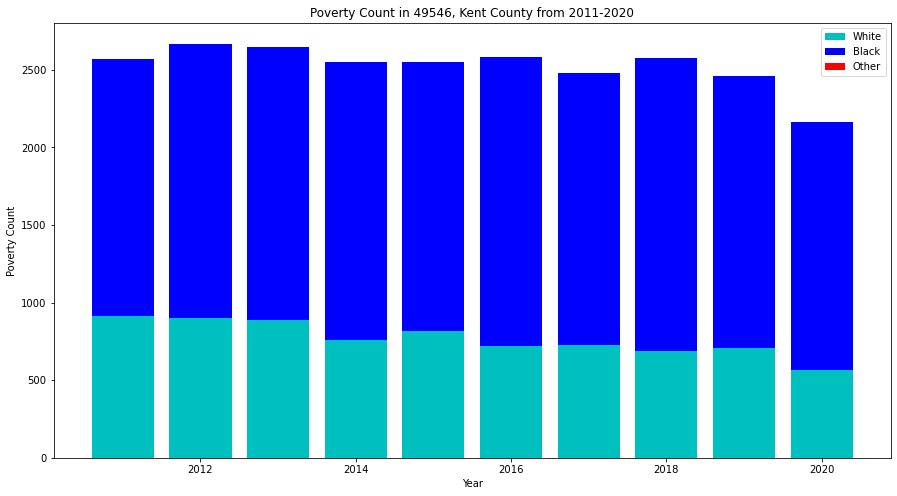

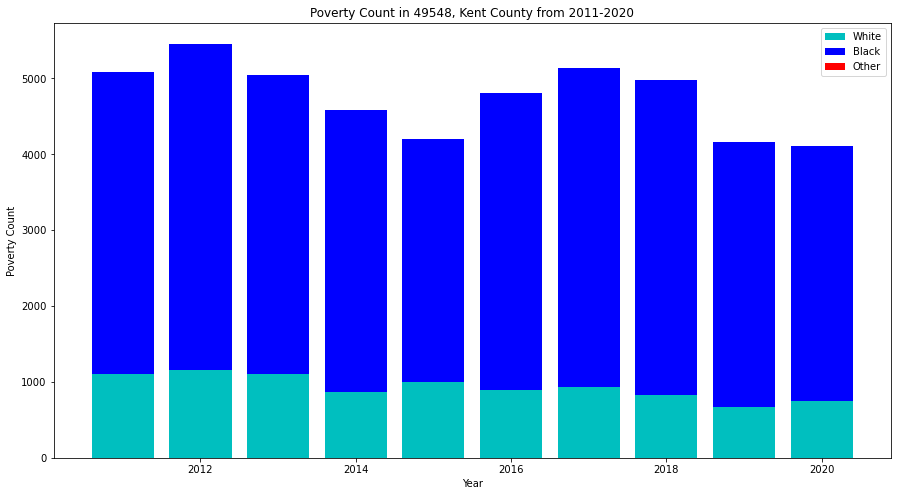

In [30]:
# Time analyses for poverty
fig = plt.figure(figsize = (7,4))
time_analyses_stacked(kent_data,"Poverty Count - White","Poverty Count - Black", 
                      "Poverty Count",["White","Black","Other"],"Kent")

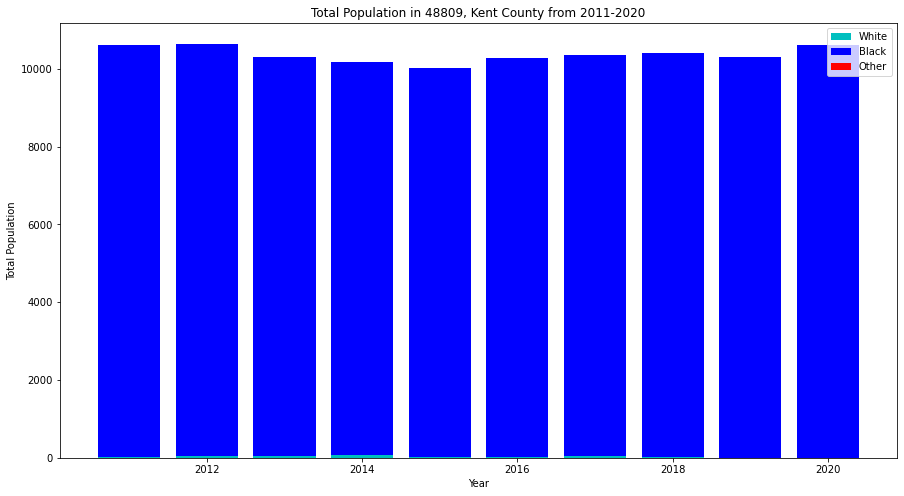

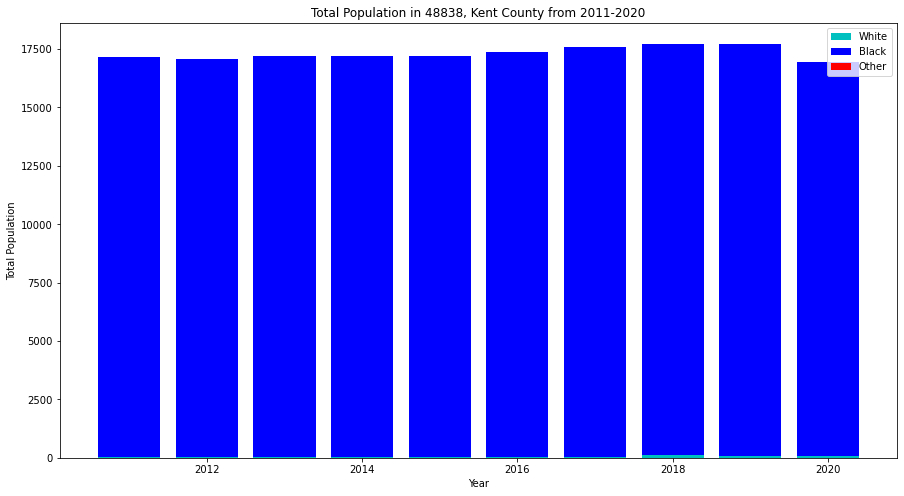

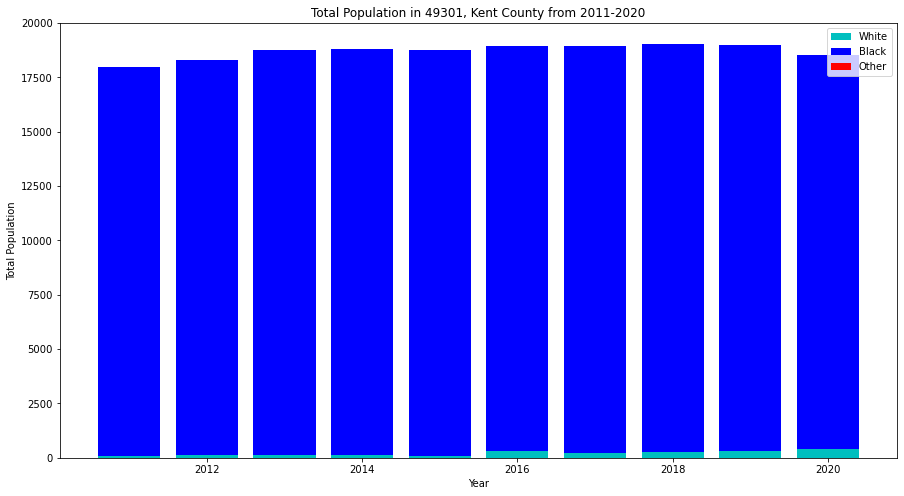

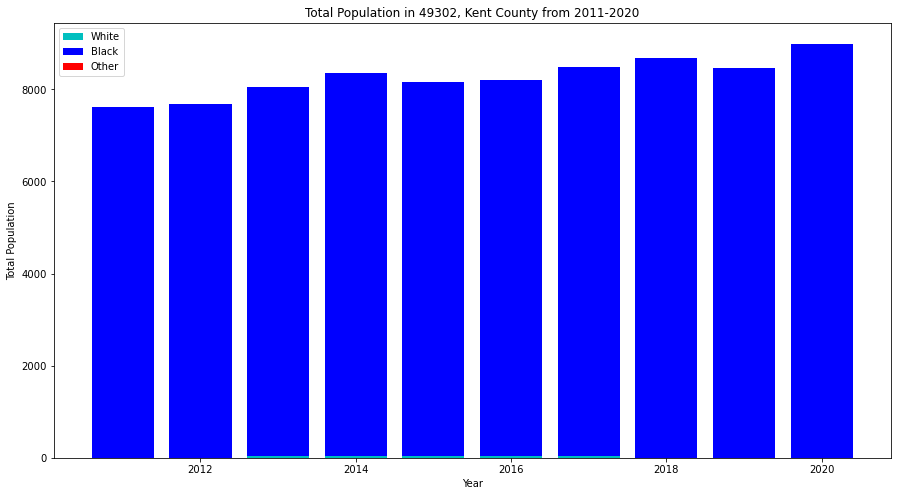

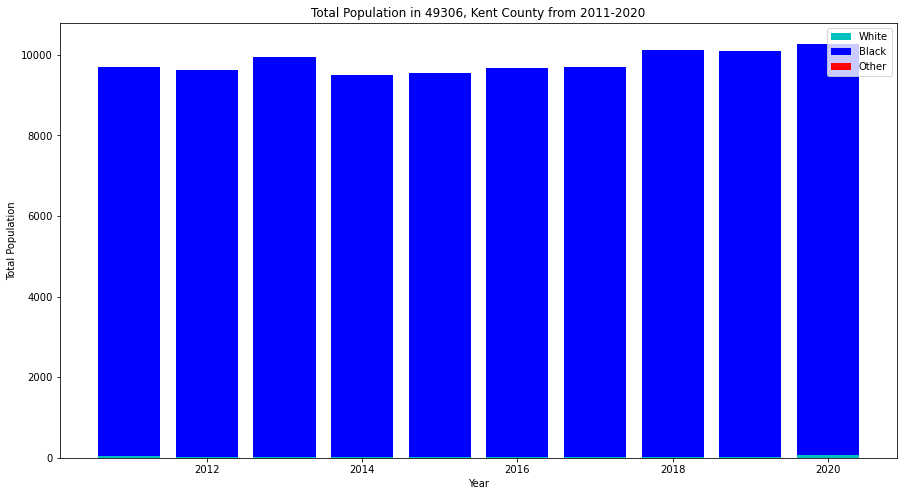

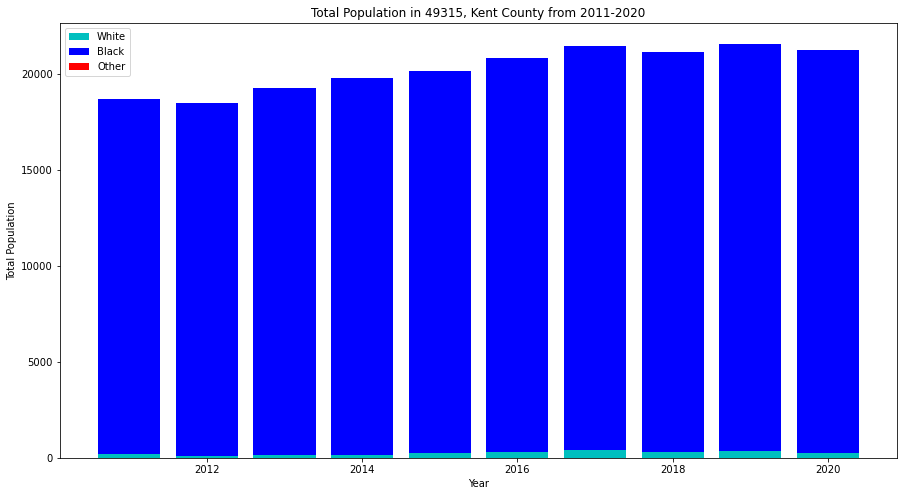

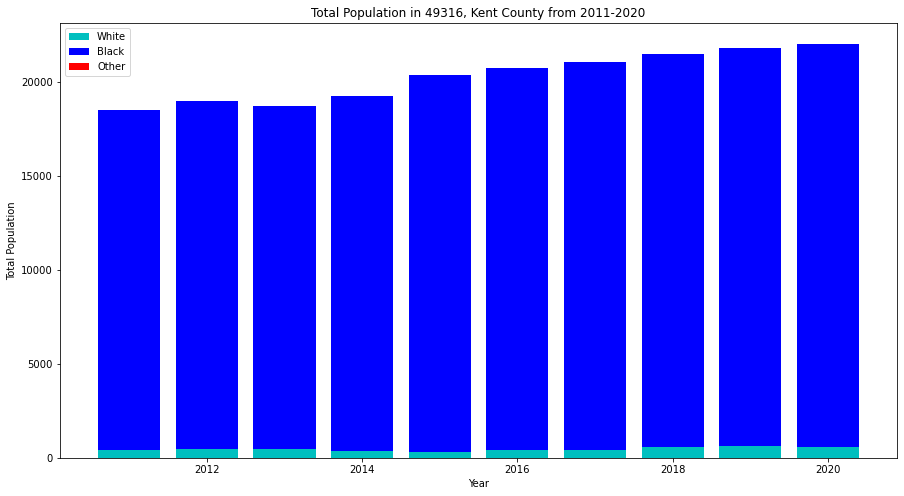

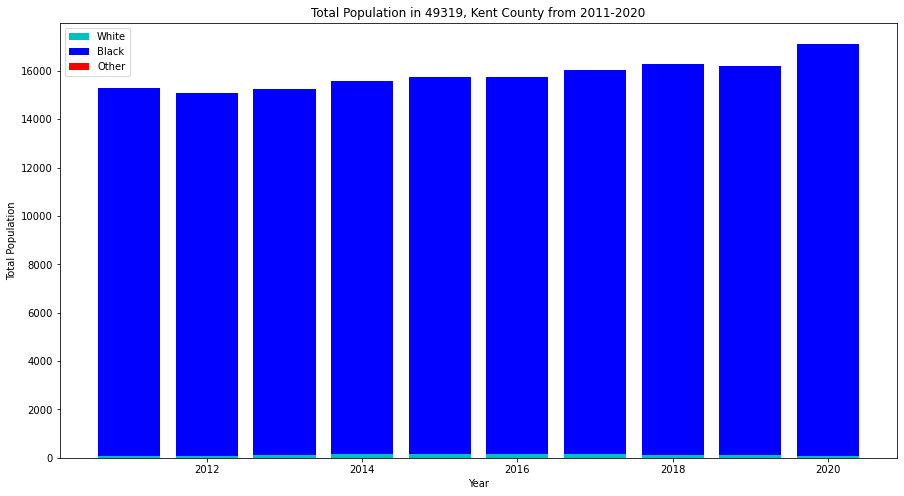

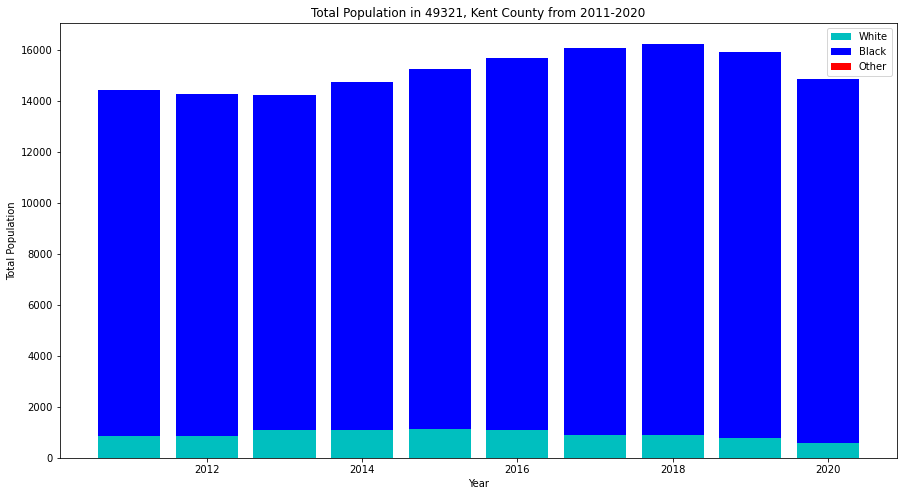

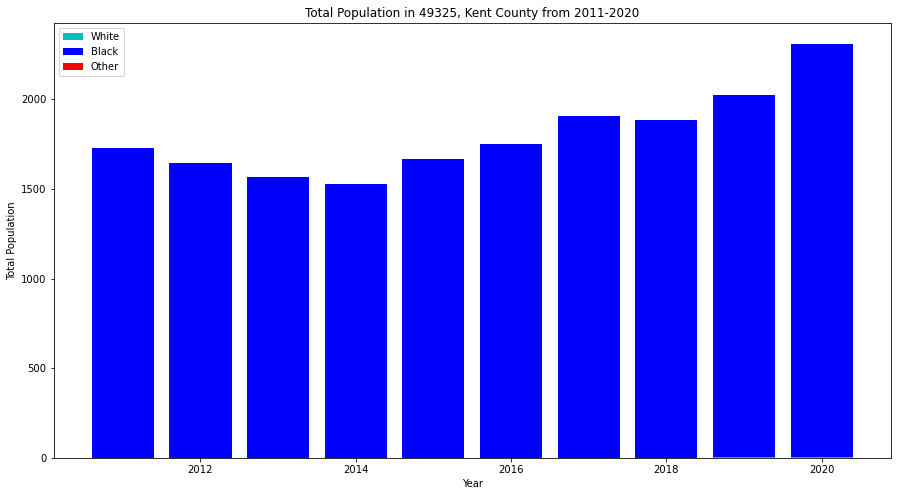

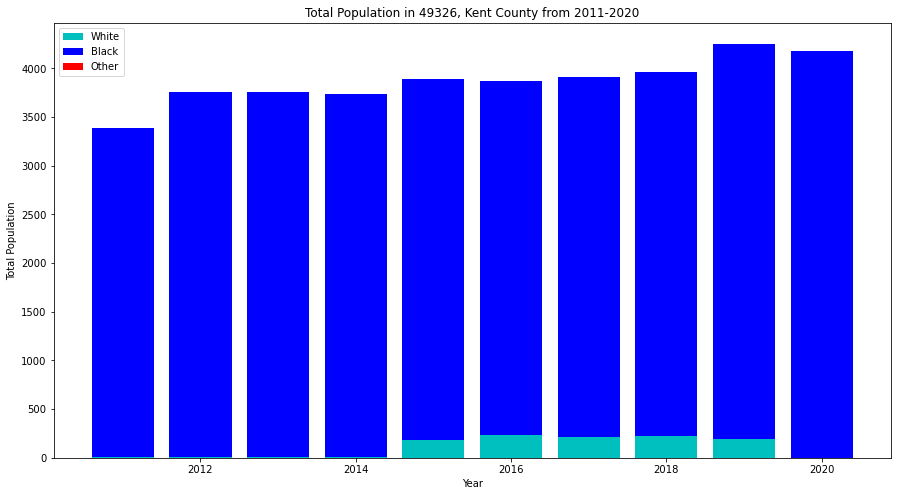

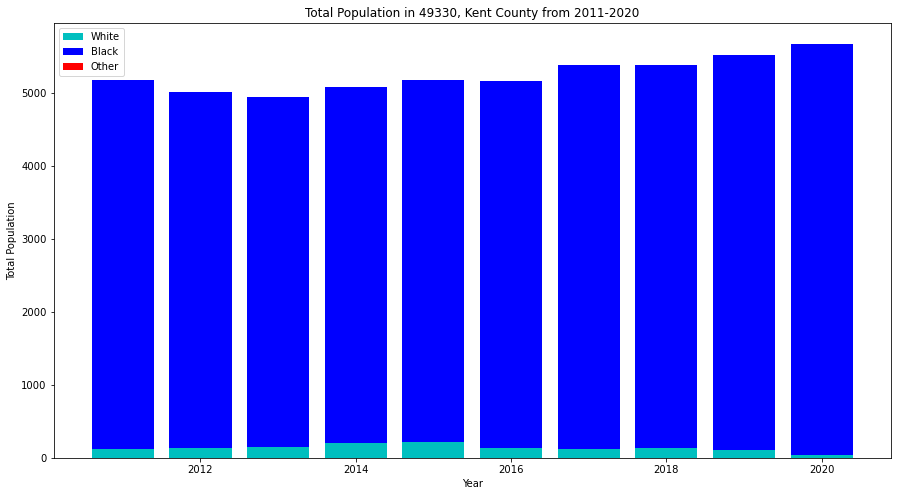

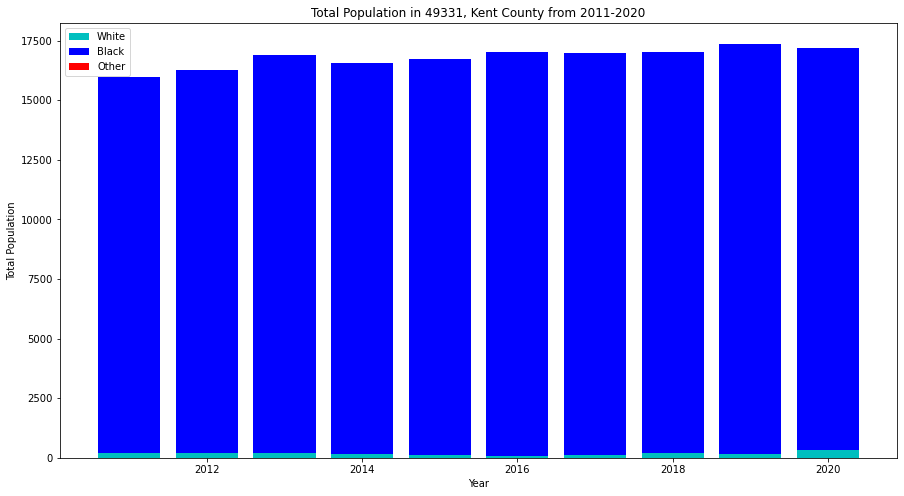

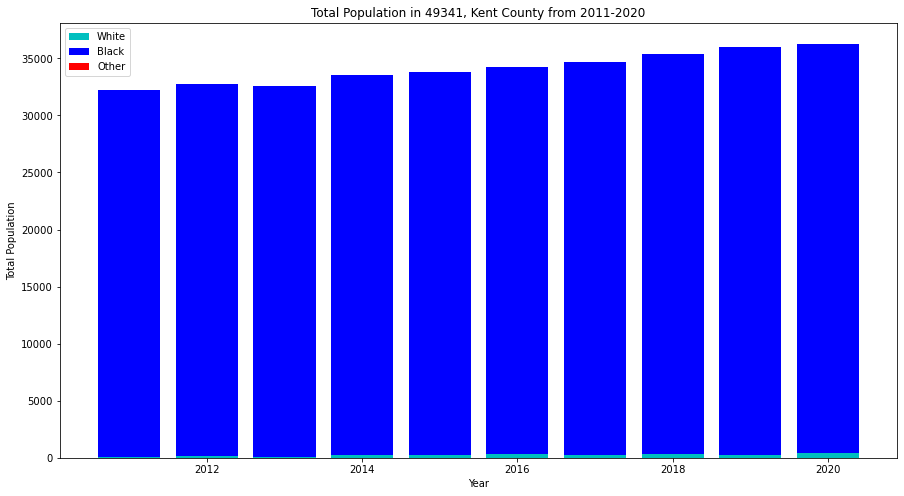

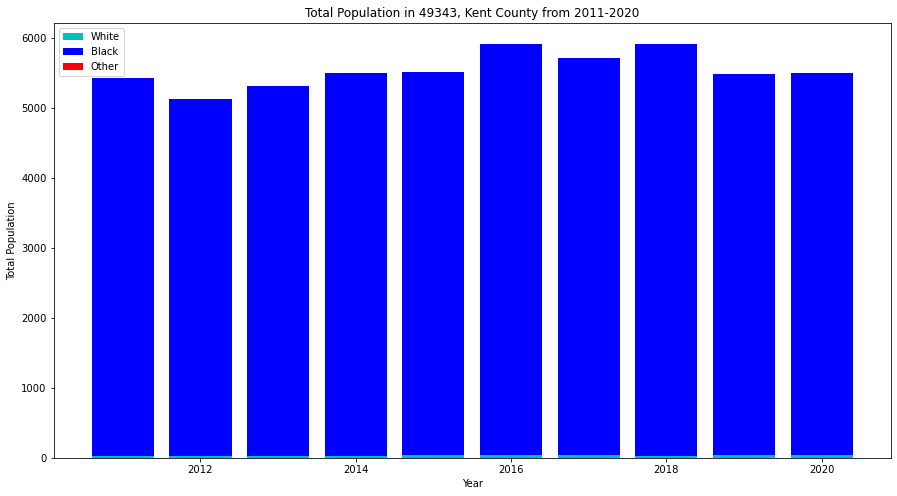

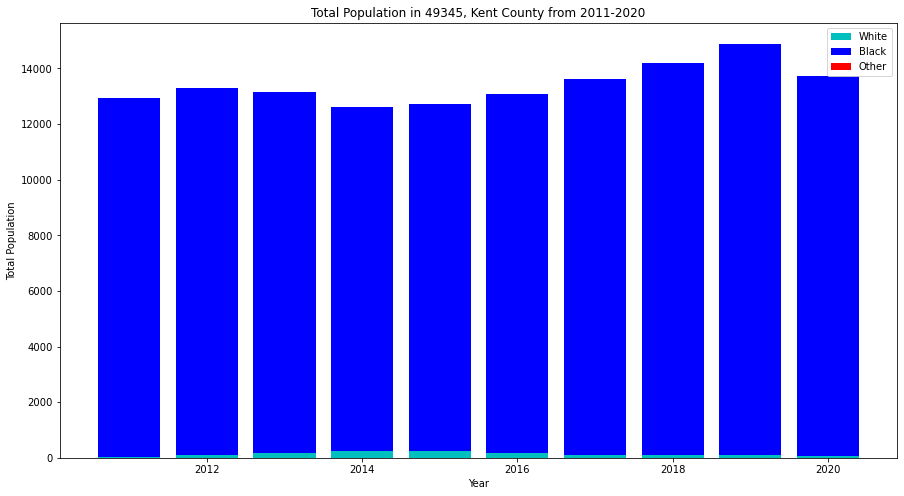

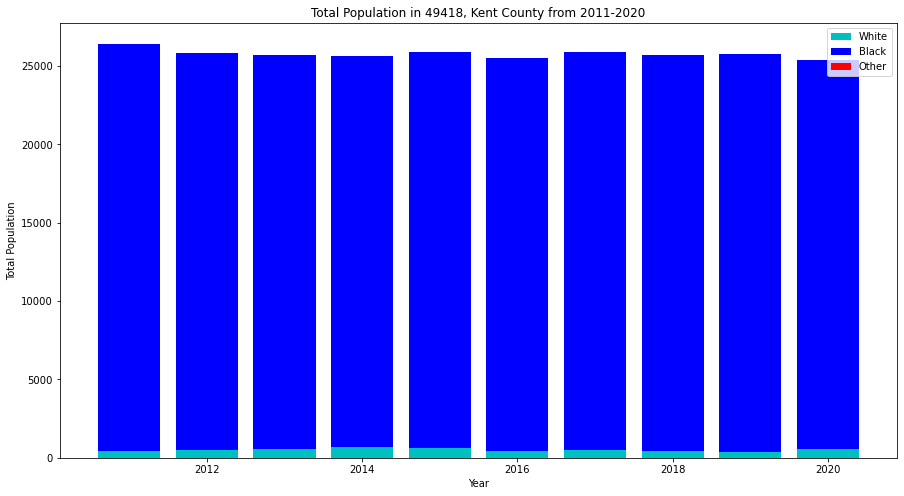

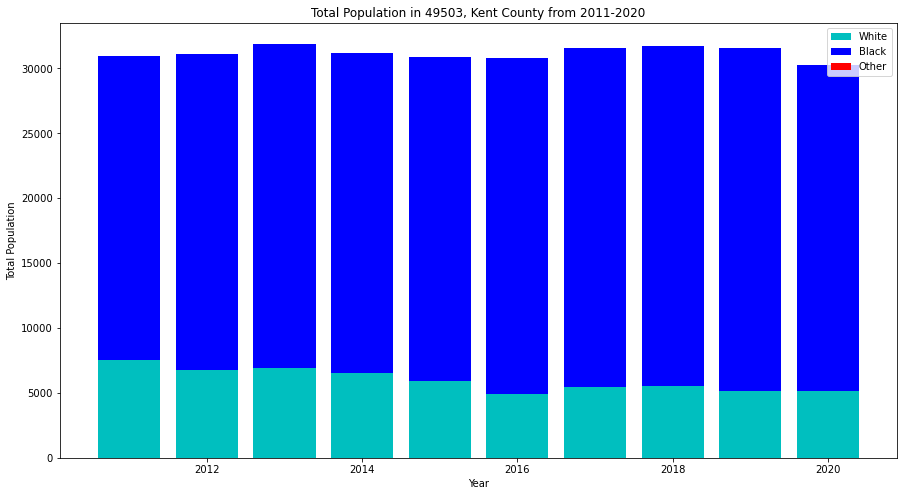

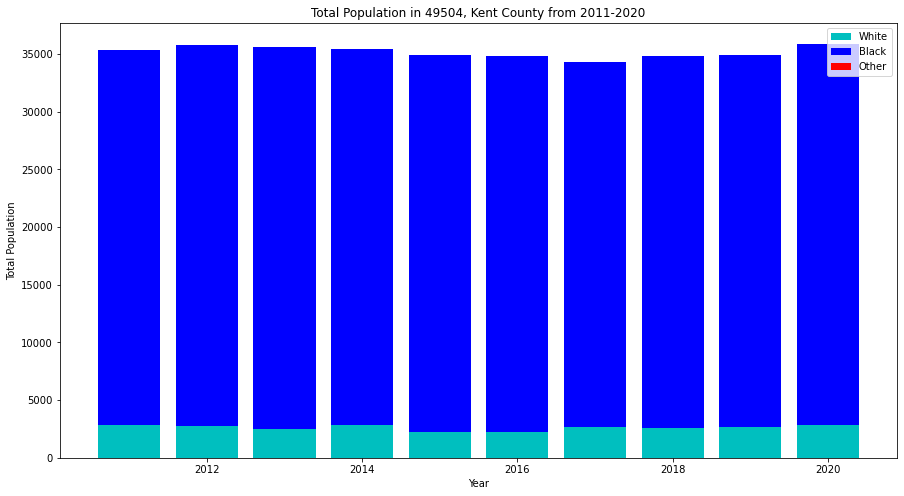

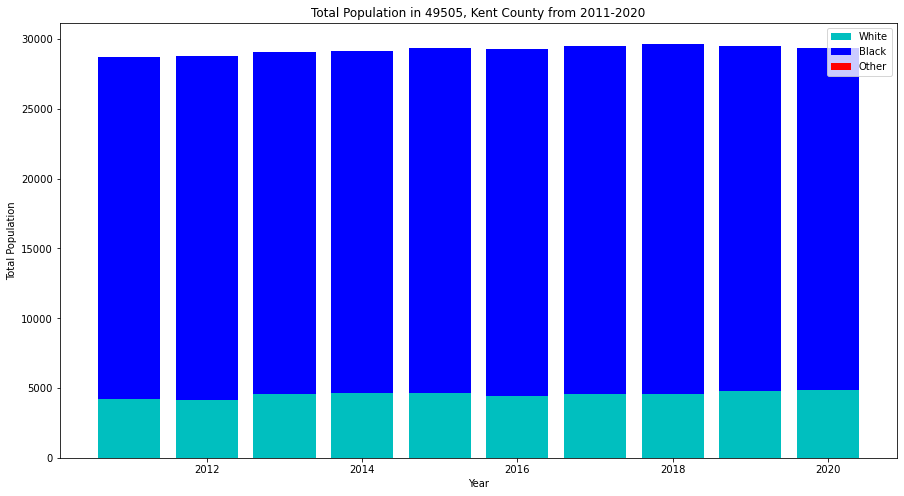

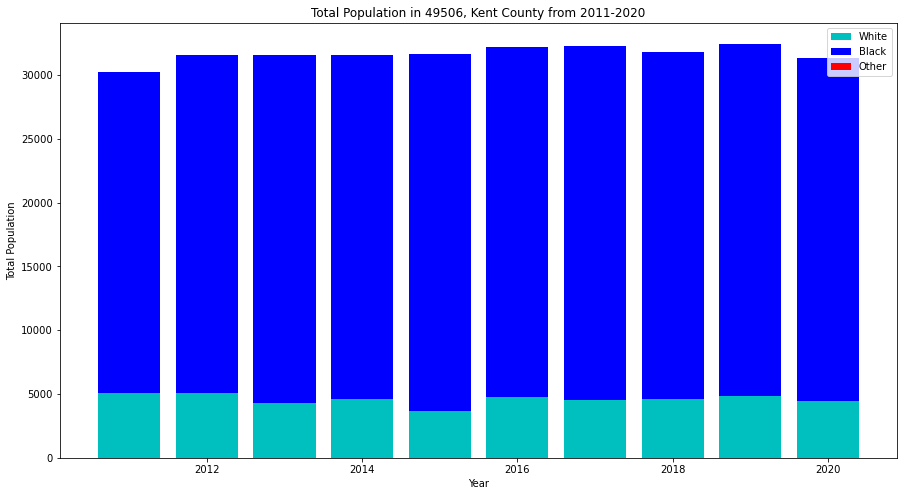

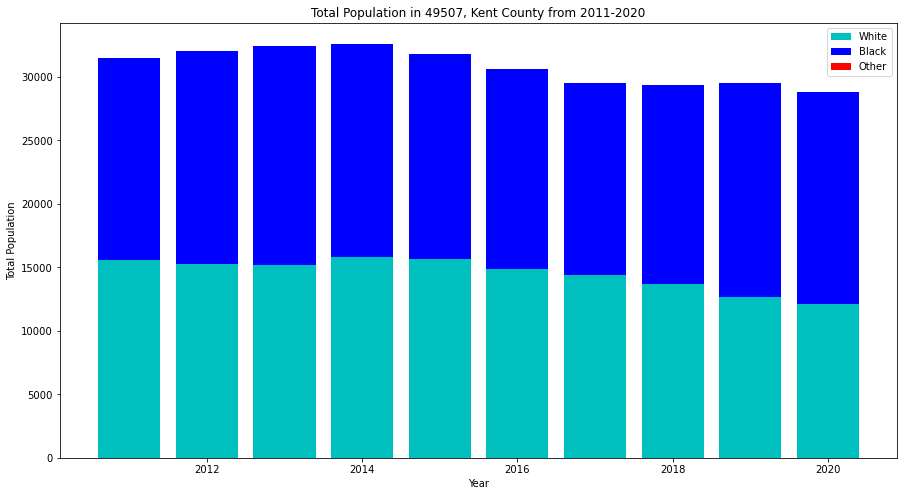

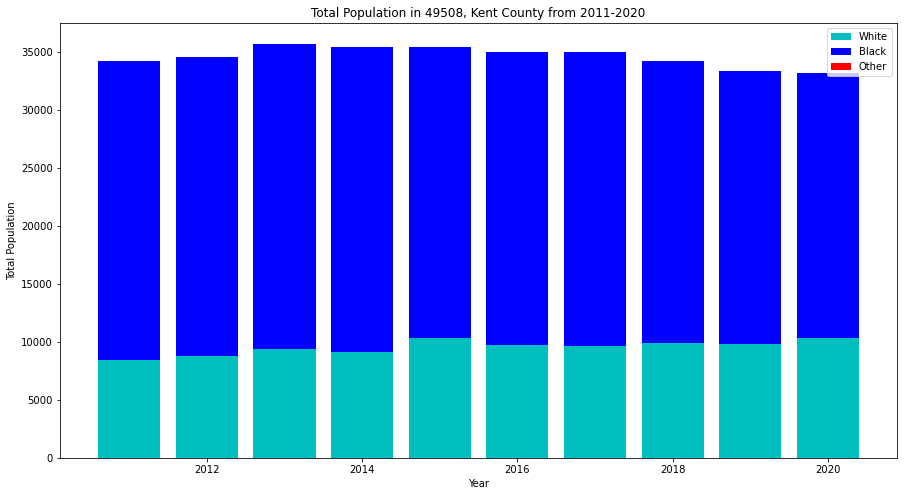

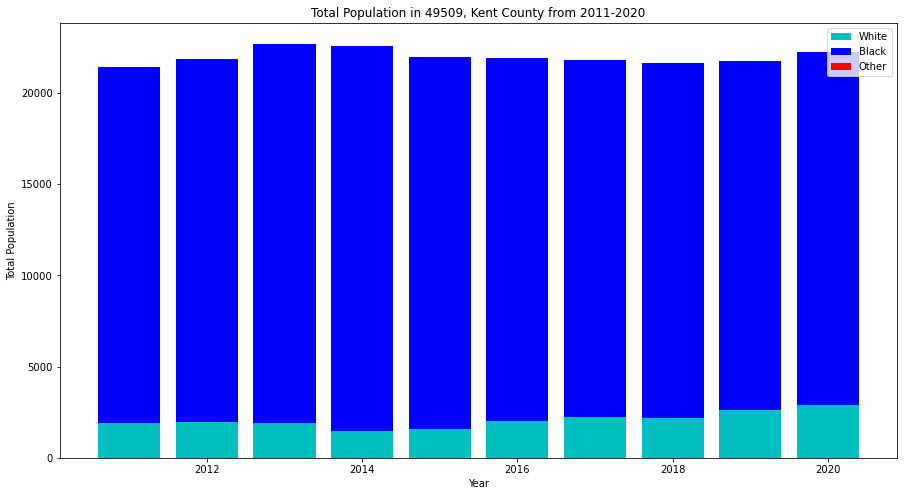

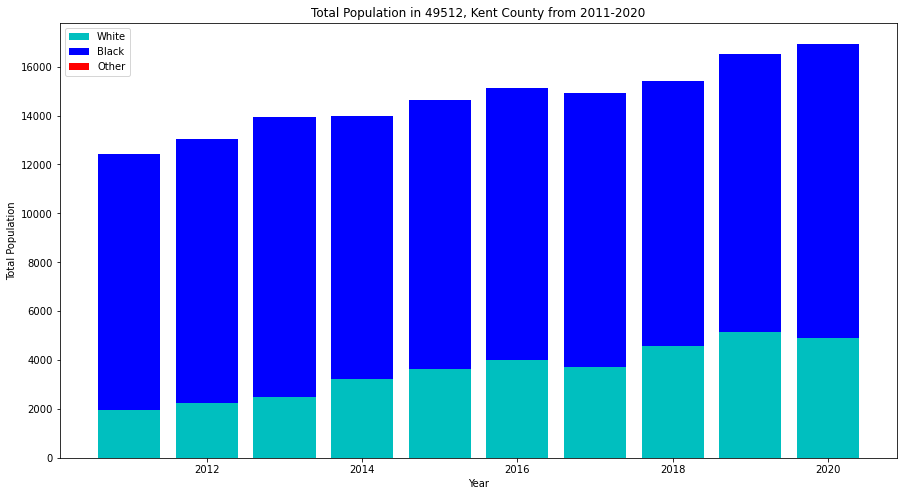

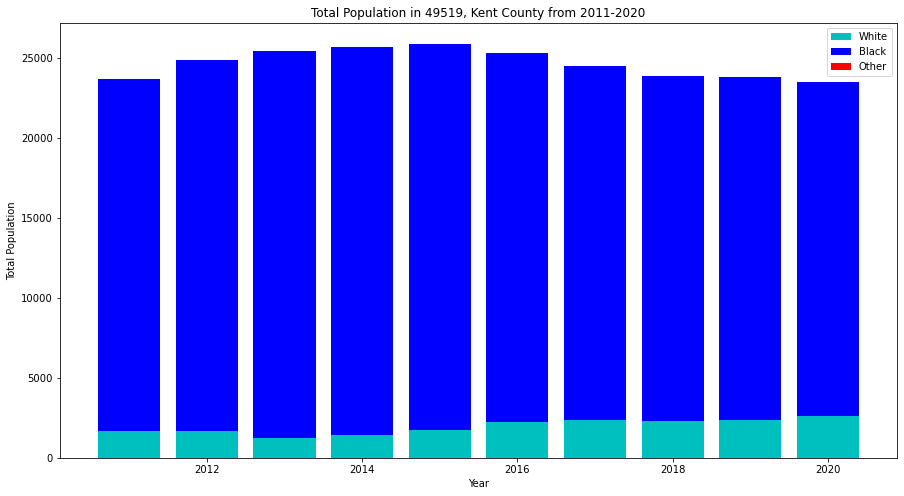

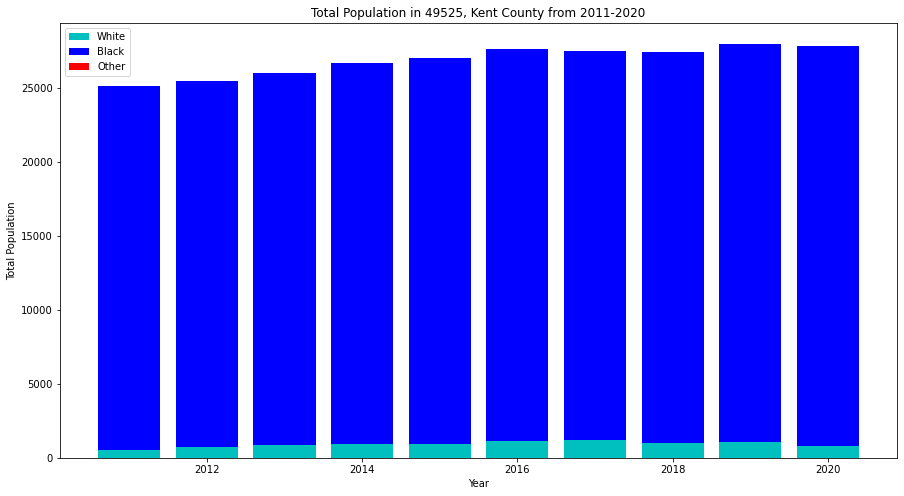

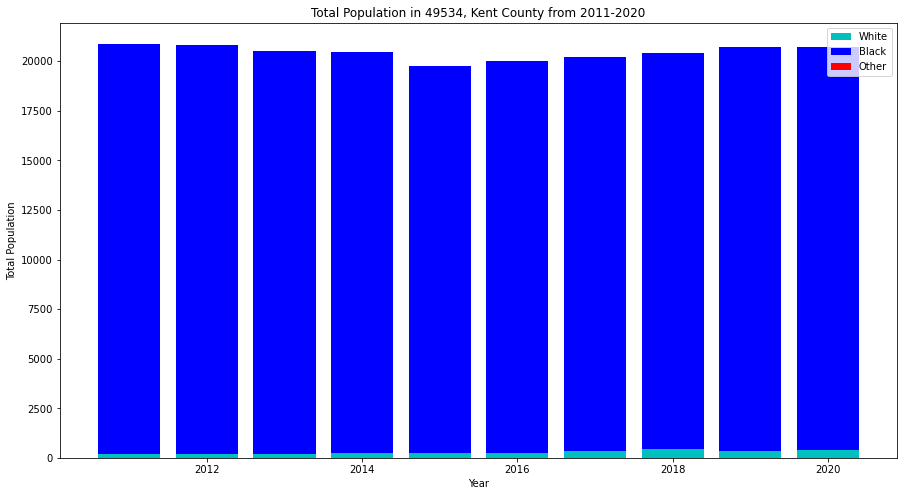

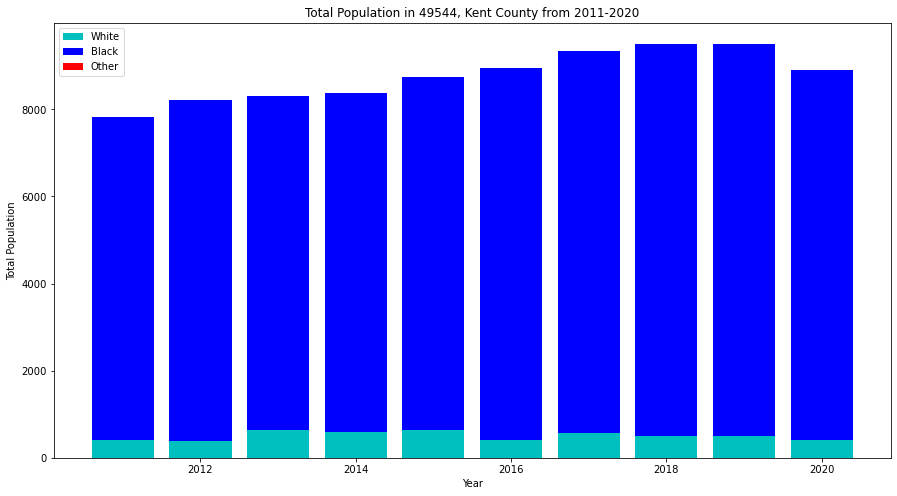

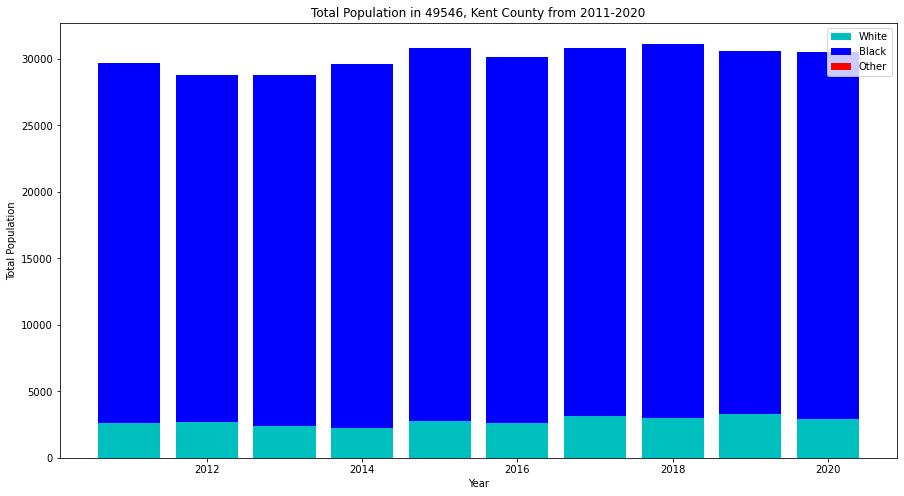

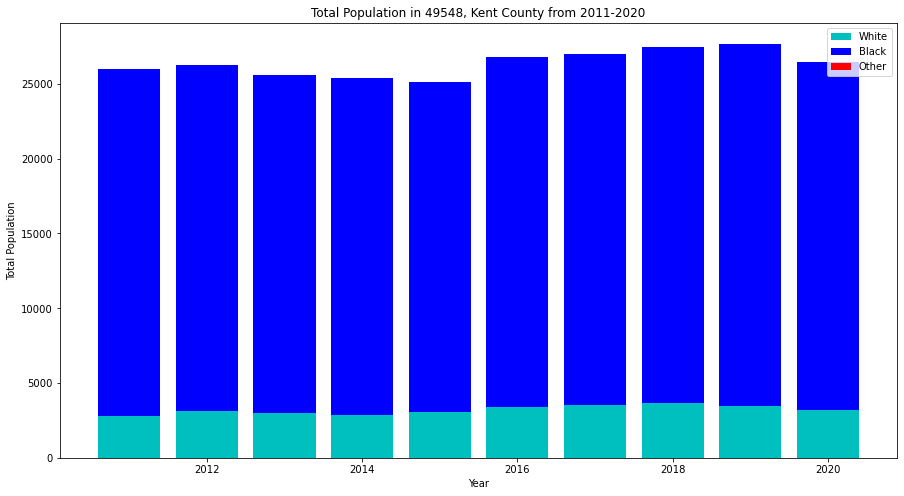

In [31]:
# Time analyses for population
time_analyses_stacked(kent_data,"White Population","Black Population", 
                      "Total Population",["White","Black","Other"],"Kent")

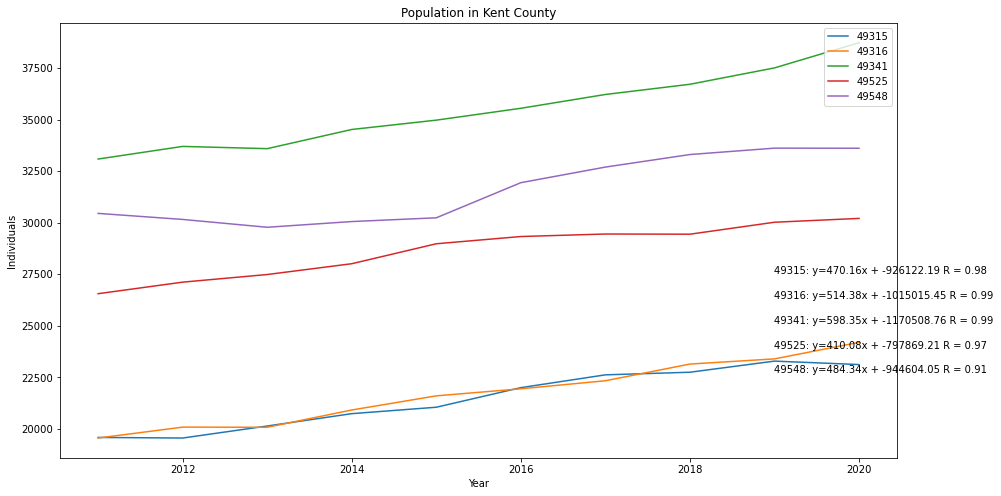

In [32]:
# Create initial plot ---Population
fig = plt.figure(figsize = (15,8))
# Blank lists for different values
r_values=[]
zipcodes=[]
slopes=[]
y_ints= []
# Calculate regression equations for all zipcodes
for zipcode in kent_data["Zipcode"].unique():
    filtered = kent_data.loc[kent_data["Zipcode"] == zipcode]
    filtered = filtered.sort_values(by=["Zipcode","Year"])
    x = filtered["Year"]
    y = filtered["Total Population"]
    
    plt_slope,plt_int,plt_r,plt_p,plt_std_err = linregress(x,y)
    r_values.append(plt_r)
    zipcodes.append(zipcode)
    slopes.append(plt_slope)
    y_ints.append(plt_int)
# Limit the number of zipcodes to those with the most change and plot those
equations_df = pd.DataFrame({"Zipcode":zipcodes,"R":r_values,"Slope":slopes,"Y-intercept":y_ints})
equations_df = equations_df.loc[(abs(equations_df["R"]) > .7) & (abs(equations_df["Slope"])> 400)]
equations_df = pd.merge(equations_df,kent_data,on="Zipcode",how="left")
equations_df = equations_df.sort_values(by=["Zipcode","Year"])
ann = 27500
for zipcode in equations_df["Zipcode"].unique():
    filtered_list = equations_df.loc[equations_df["Zipcode"]== zipcode]
    x = filtered_list["Year"]
    y = filtered_list["Total Population"]
    plt.plot(x,y)
    plt.legend(equations_df["Zipcode"].unique(),loc=1)    
    plt.annotate(f"{zipcode}: y={round((filtered_list['Slope'].mean()),2)}x + {round((filtered_list['Y-intercept'].mean()),2)} R = {round((filtered_list['R'].mean()),2)}", xy=(2019,ann))
    ann -= 1200
plt.title("Population in Kent County")
plt.xlabel("Year")
plt.ylabel("Individuals")
plt.savefig("output_data/linregress_population_Kent.png")
plt.show()

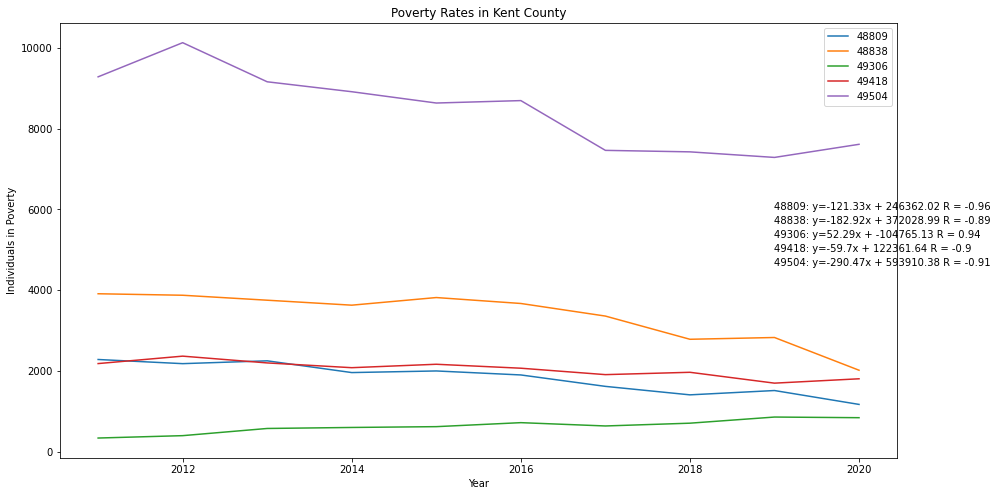

In [33]:
# Create initial plot ---Poverty
fig = plt.figure(figsize = (15,8))
# Blank lists for different values
r_values2=[]
zipcodes2=[]
slopes2=[]
y_ints2= []
# Calculate regression equations for all zipcodes
for zipcode in kent_data["Zipcode"].unique():
    filtered = kent_data.loc[kent_data["Zipcode"] == zipcode]
    filtered = filtered.sort_values(by=["Zipcode","Year"])
    x = filtered["Year"]
    y = filtered["Poverty Count"]
    
    plt_slope,plt_int,plt_r,plt_p,plt_std_err = linregress(x,y)
    r_values2.append(plt_r)
    zipcodes2.append(zipcode)
    slopes2.append(plt_slope)
    y_ints2.append(plt_int)

# Limit the number of zipcodes to those with the most change and plot those
equations2_df = pd.DataFrame({"Zipcode":zipcodes2,"R":r_values2,"Slope":slopes2,"Y-intercept":y_ints2})
equations2_df = equations2_df.loc[(abs(equations2_df["R"]) > .85) & (abs(equations2_df["Slope"])> 40)]
equations2_df = pd.merge(equations2_df,kent_data,on="Zipcode",how="left")
equations2_df = equations2_df.sort_values(by=["Zipcode","Year"])
# equations_df
ann = 6000
for zipcode in equations2_df["Zipcode"].unique():
    filtered_list = equations2_df.loc[equations2_df["Zipcode"]== zipcode]
    x = filtered_list["Year"]
    y = filtered_list["Poverty Count"]
    plt.plot(x,y)
    plt.legend(equations2_df["Zipcode"].unique(),loc=1)    
    plt.annotate(f"{zipcode}: y={round((filtered_list['Slope'].mean()),2)}x + {round((filtered_list['Y-intercept'].mean()),2)} R = {round((filtered_list['R'].mean()),2)}", xy=(2019,ann))
    ann -= 350
plt.title("Poverty Rates in Kent County")
plt.xlabel("Year")
plt.ylabel("Individuals in Poverty")
plt.savefig("output_data/linregress_poverty_Kent.png")
plt.show()

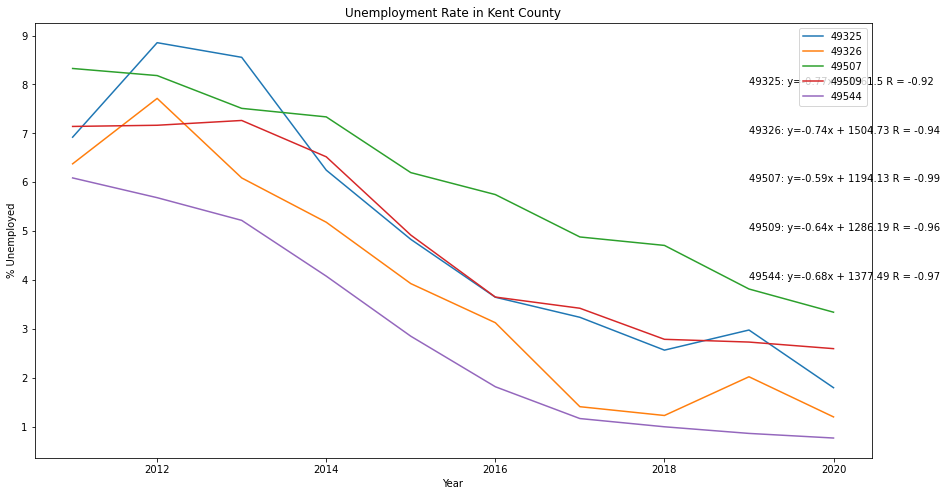

In [34]:
# Create initial plot --Unemployment
fig = plt.figure(figsize = (15,8))
# Blank lists for different values
r_values=[]
zipcodes=[]
slopes=[]
y_ints= []
# Calculate regression equations for all zipcodes
for zipcode in kent_data["Zipcode"].unique():
    filtered = kent_data.loc[kent_data["Zipcode"] == zipcode]
    filtered = filtered.sort_values(by=["Zipcode","Year"])
    x = filtered["Year"]
    y = filtered["% Unemployed"]
    
    plt_slope,plt_int,plt_r,plt_p,plt_std_err = linregress(x,y)
    r_values.append(plt_r)
    zipcodes.append(zipcode)
    slopes.append(plt_slope)
    y_ints.append(plt_int)
# Limit the number of zipcodes to those with the most change and plot those
equations_df = pd.DataFrame({"Zipcode":zipcodes,"R":r_values,"Slope":slopes,"Y-intercept":y_ints})
equations_df = equations_df.loc[(abs(equations_df["R"]) > .7) & (abs(equations_df["Slope"])> .58)]
equations_df = pd.merge(equations_df,kent_data,on="Zipcode",how="left")
equations_df = equations_df.sort_values(by=["Zipcode","Year"])
ann = 8
for zipcode in equations_df["Zipcode"].unique():
    filtered_list = equations_df.loc[equations_df["Zipcode"]== zipcode]
    x = filtered_list["Year"]
    y = filtered_list["% Unemployed"]
    plt.plot(x,y)
    plt.legend(equations_df["Zipcode"].unique(),loc=1)    
    plt.annotate(f"{zipcode}: y={round((filtered_list['Slope'].mean()),2)}x + {round((filtered_list['Y-intercept'].mean()),2)} R = {round((filtered_list['R'].mean()),2)}", xy=(2019,ann))
    ann -= 1
plt.title("Unemployment Rate in Kent County")
plt.xlabel("Year")
plt.ylabel("% Unemployed")
plt.savefig("output_data/linregress_unemployment_Kent.png")
plt.show()

## Saginaw County Analyses

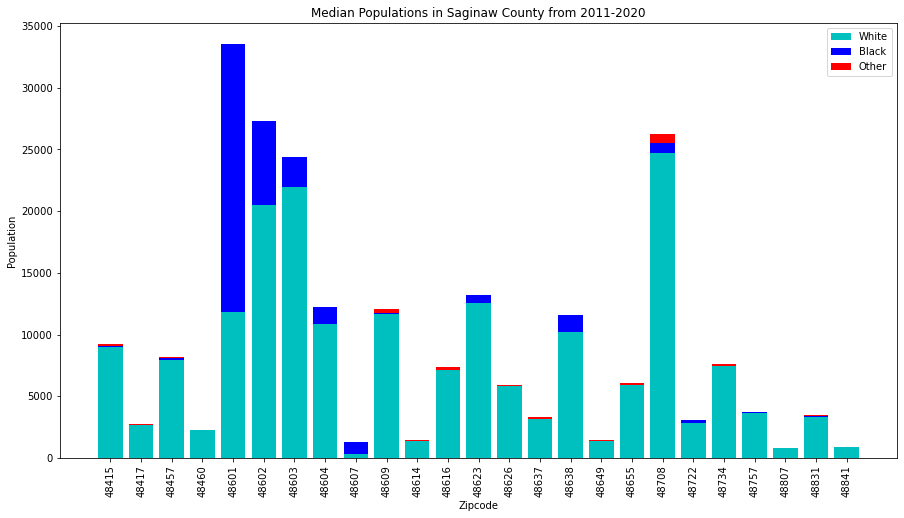

In [35]:
# Stacked bar chart for population by county

fig = plt.figure(figsize = (15,8))
xaxis = np.arange(0,len(saginaw_grouped.index))
label = (saginaw_grouped.index.tolist())
line1 = plt.bar(xaxis,saginaw_grouped["White Population"],color='c',label="")
plt.xticks(ticks=xaxis,labels=label,rotation=90)
line3 = plt.bar(xaxis,(saginaw_grouped["Total Population"]-saginaw_grouped["Black Population"]-saginaw_grouped["White Population"]),
                       label=label,bottom=saginaw_grouped["White Population"],color='r')
line2 = plt.bar(xaxis,saginaw_grouped["Black Population"],label=label,bottom=saginaw_grouped["White Population"],color='b')
plt.legend([line1, line2,line3],["White","Black","Other"])
plt.xlabel("Zipcode")
plt.ylabel("Population")
plt.title("Median Populations in Saginaw County from 2011-2020")
plt.savefig("output_data/populations_Saginaw.png")
plt.show()

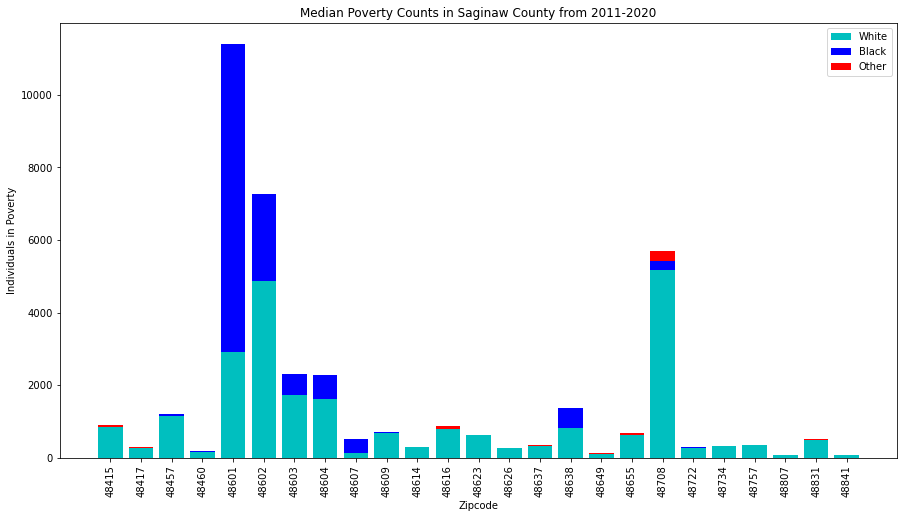

In [36]:
# Stacked bar chart for poverty rates
fig = plt.figure(figsize = (15,8))
xaxis = np.arange(0,len(saginaw_grouped.index))
label = (saginaw_grouped.index.tolist())
line1 = plt.bar(xaxis,saginaw_grouped["Poverty Count - White"],color='c',label="")
plt.xticks(ticks=xaxis,labels=label,rotation=90)
line3 = plt.bar(xaxis,(saginaw_grouped["Poverty Count"]-saginaw_grouped["Poverty Count - Black"]-saginaw_grouped["Poverty Count - White"]),
                       label=label,bottom=saginaw_grouped["Poverty Count - White"],color='r')
line2 = plt.bar(xaxis,saginaw_grouped["Poverty Count - Black"],label=label,bottom=saginaw_grouped["Poverty Count - White"],color='b')
plt.legend([line1, line2,line3],["White","Black","Other"])
plt.xlabel("Zipcode")
plt.ylabel("Individuals in Poverty")
plt.title("Median Poverty Counts in Saginaw County from 2011-2020")
plt.savefig("output_data/poverty_Saginaw.png")
plt.show()

<Figure size 504x288 with 0 Axes>

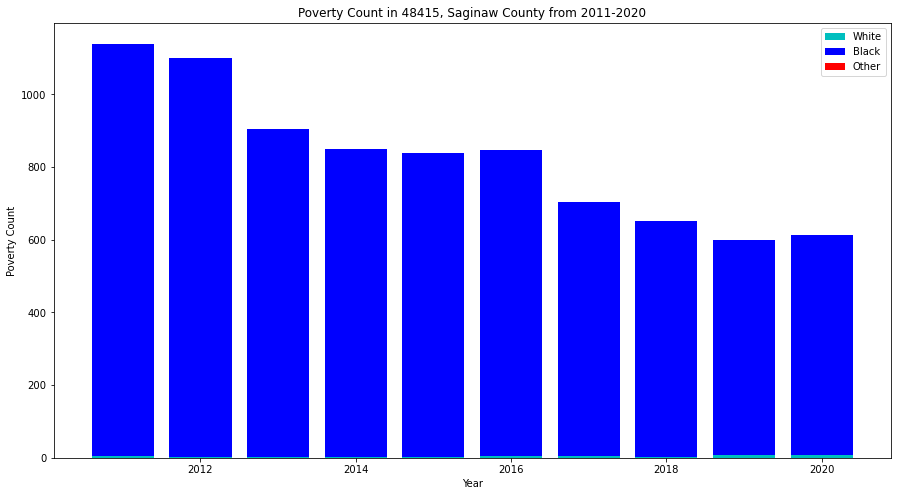

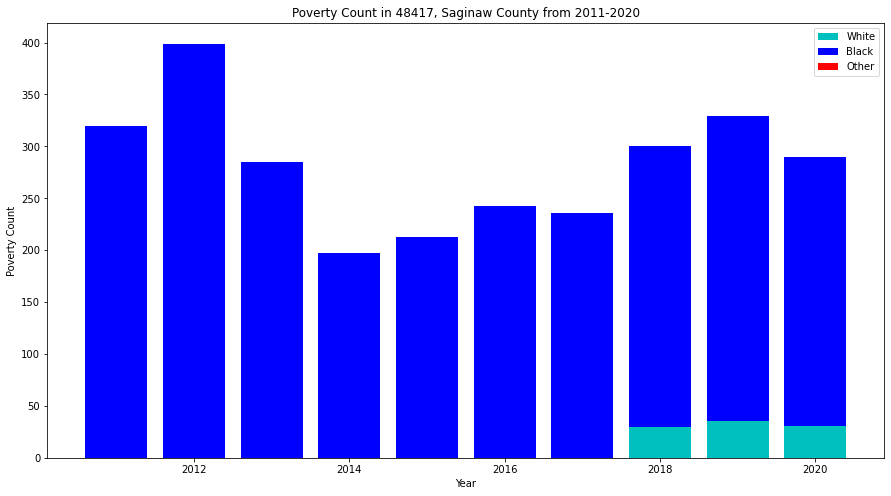

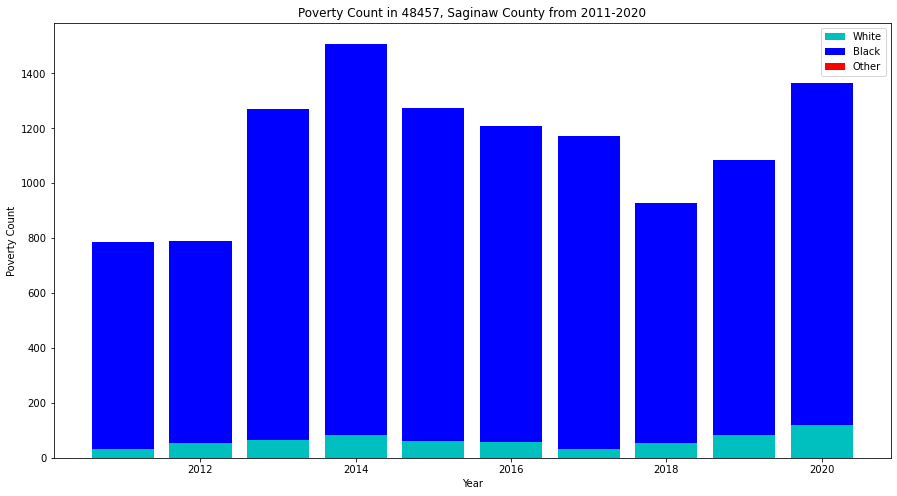

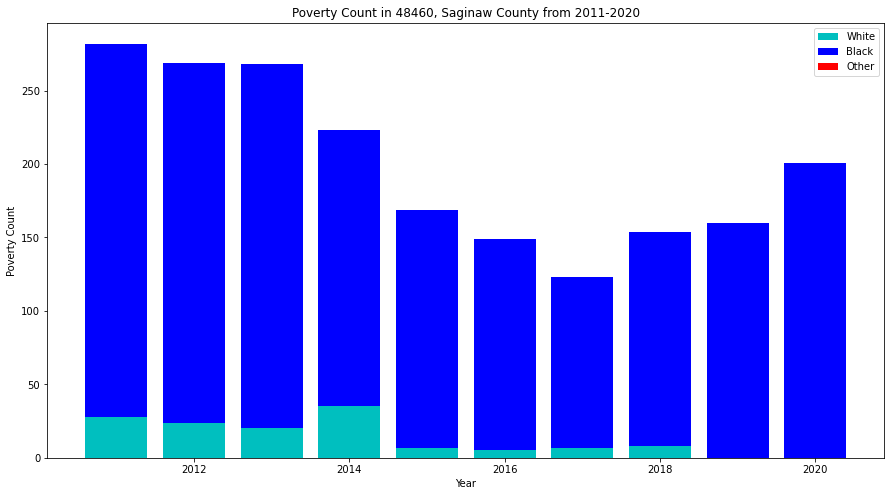

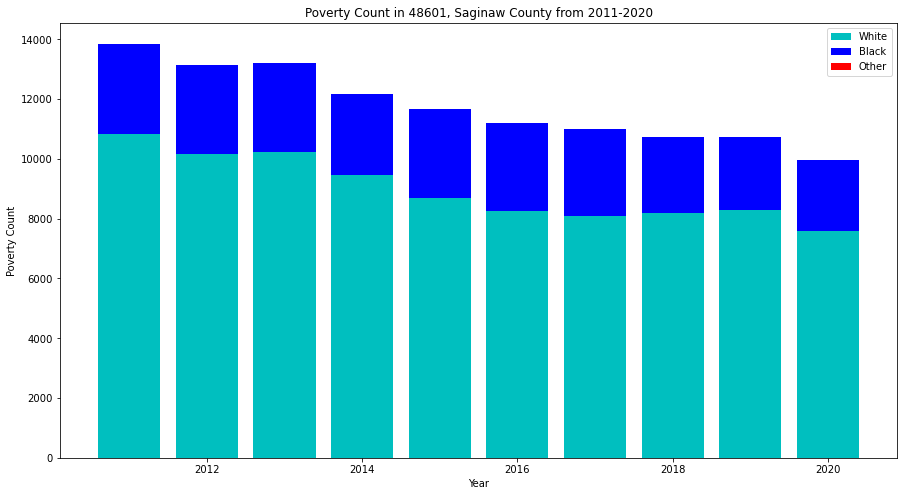

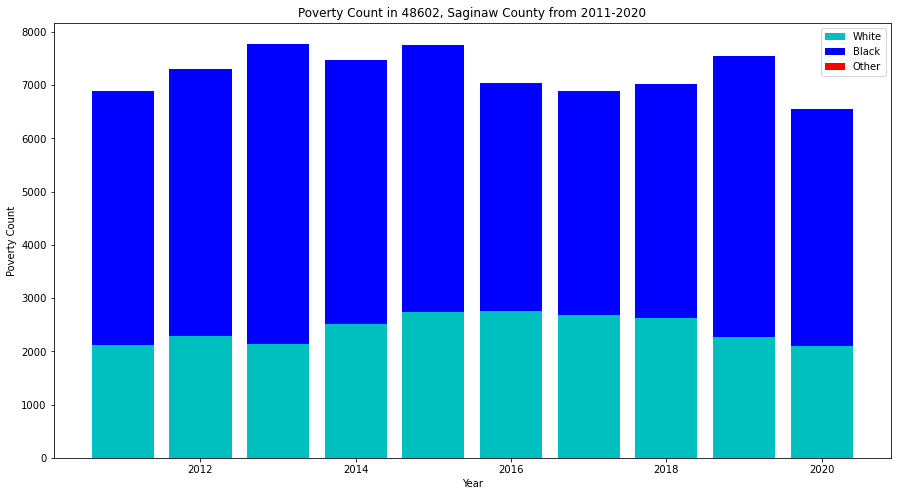

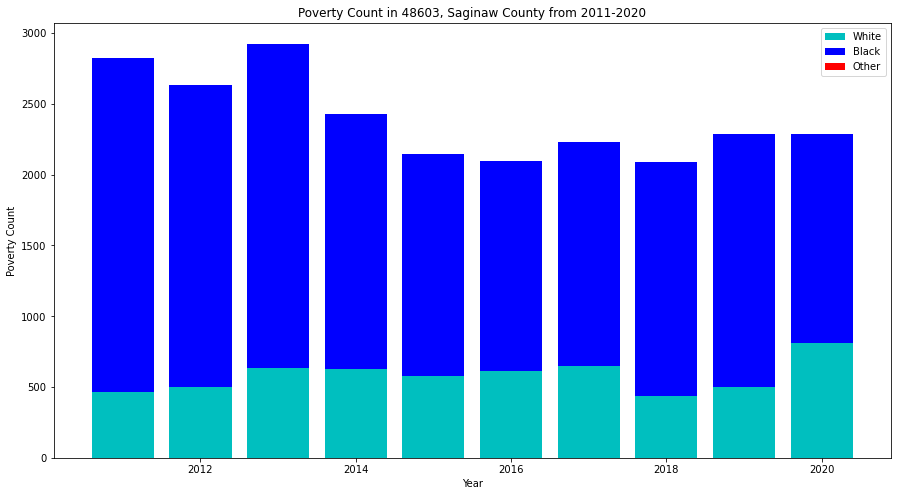

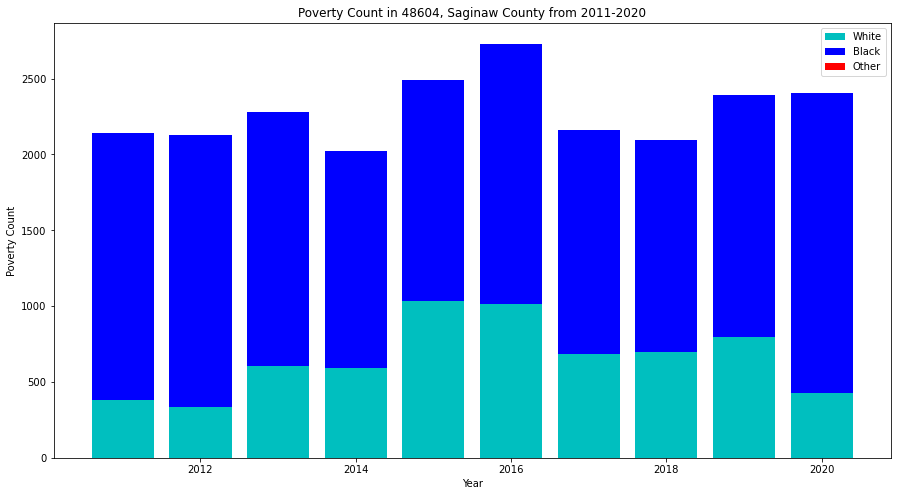

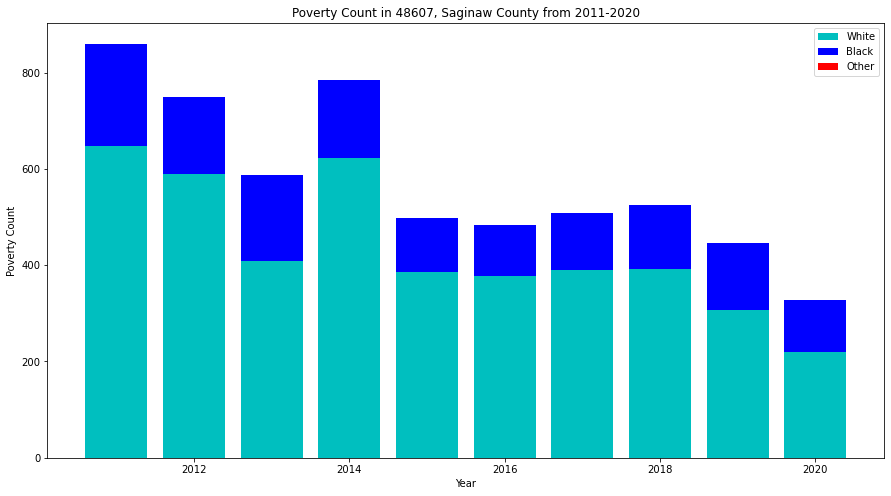

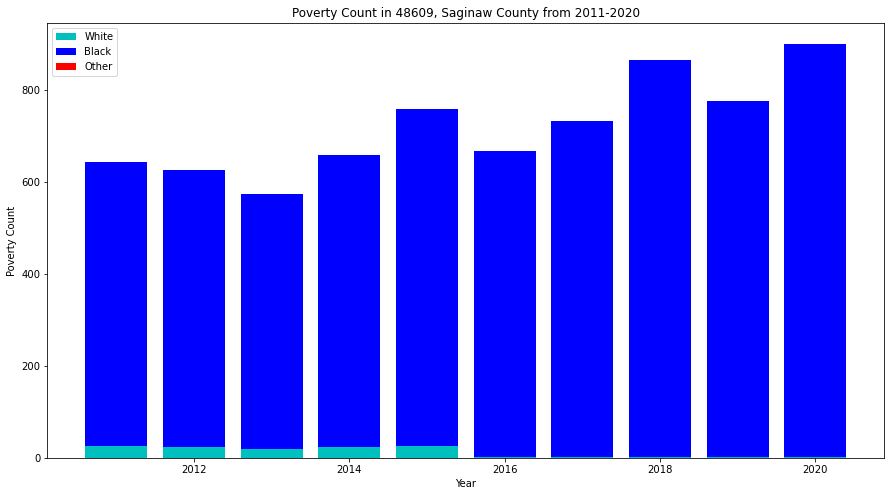

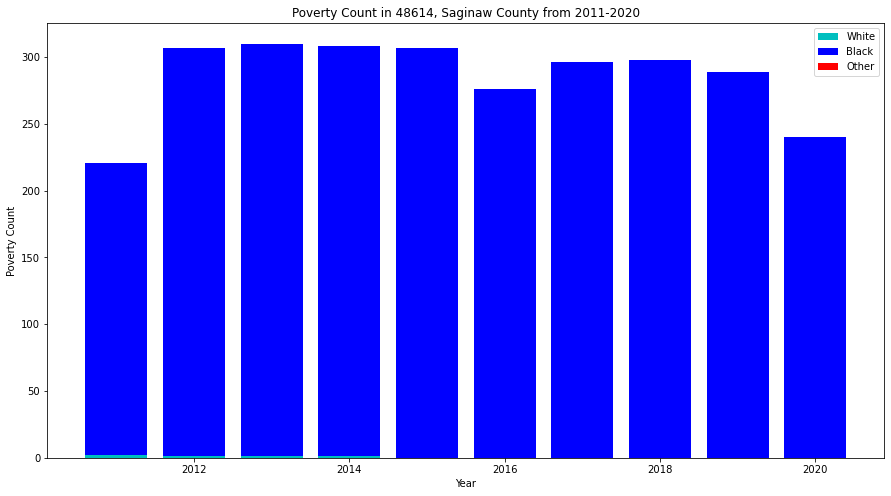

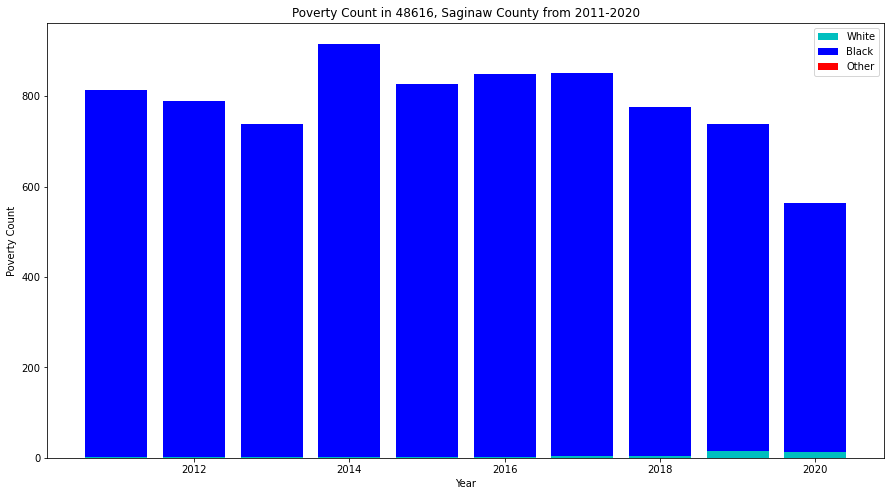

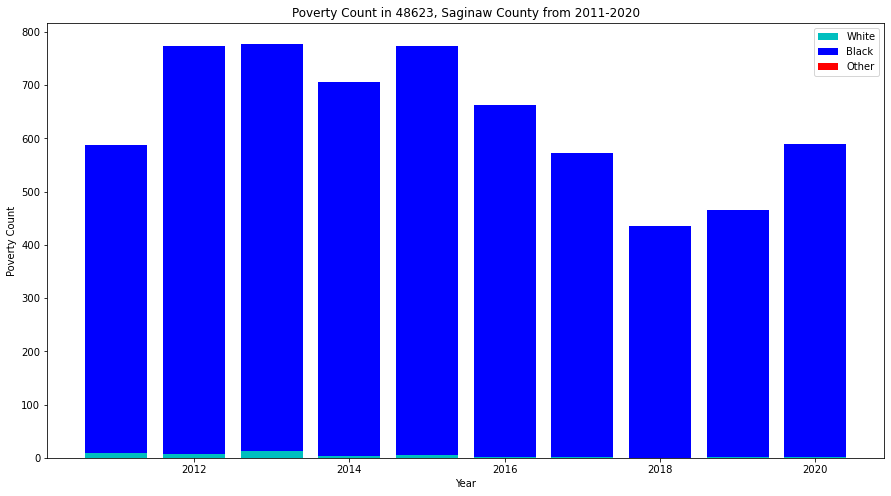

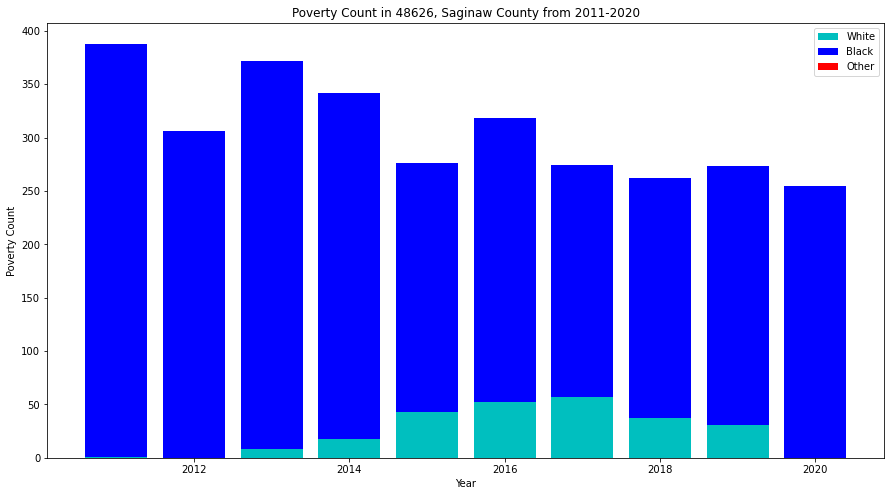

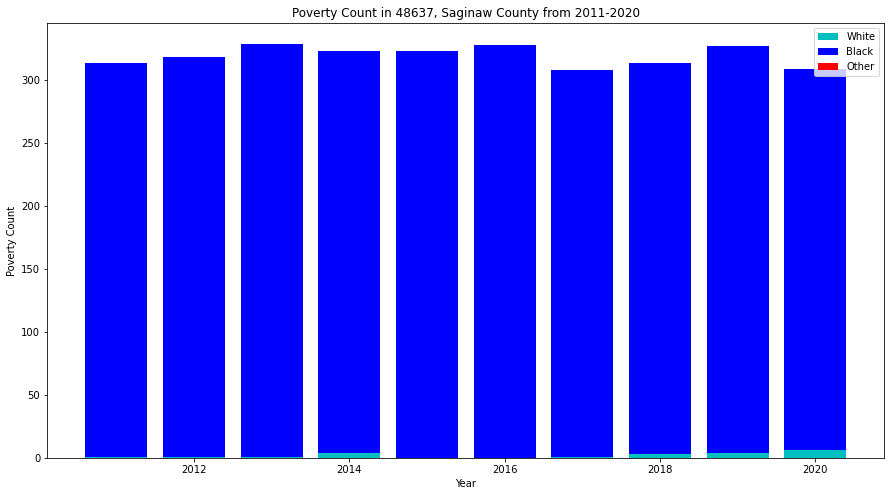

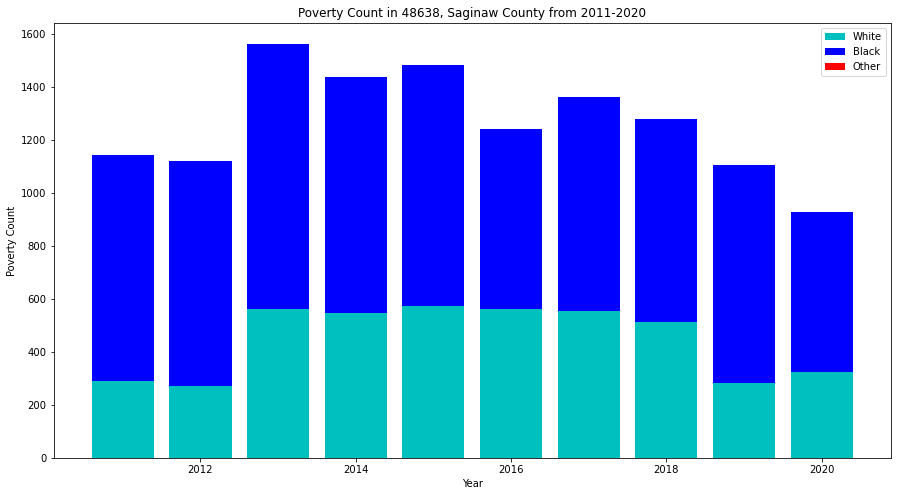

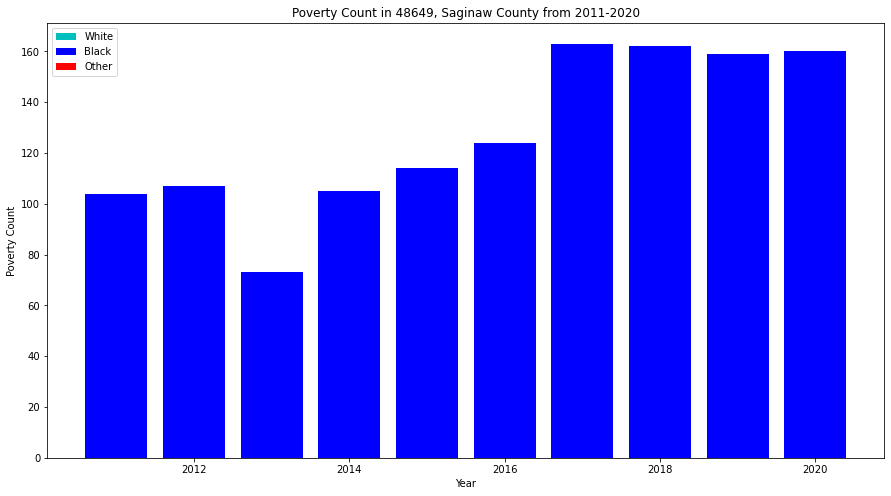

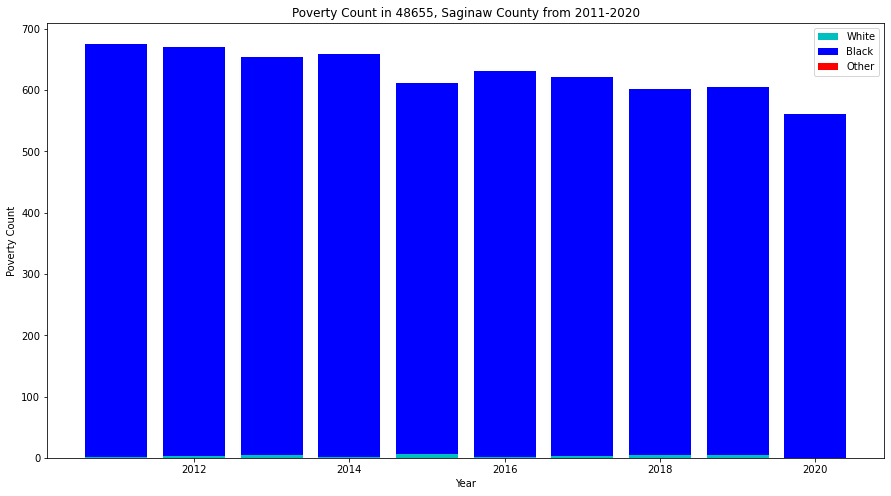

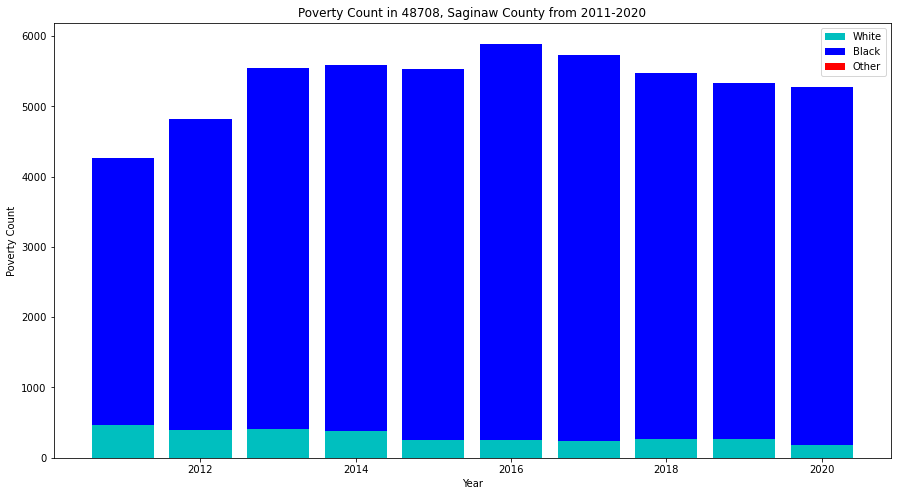

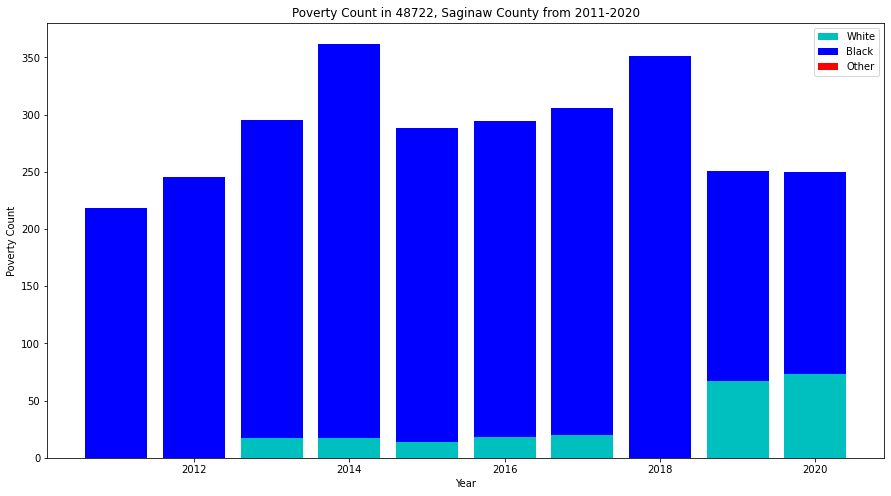

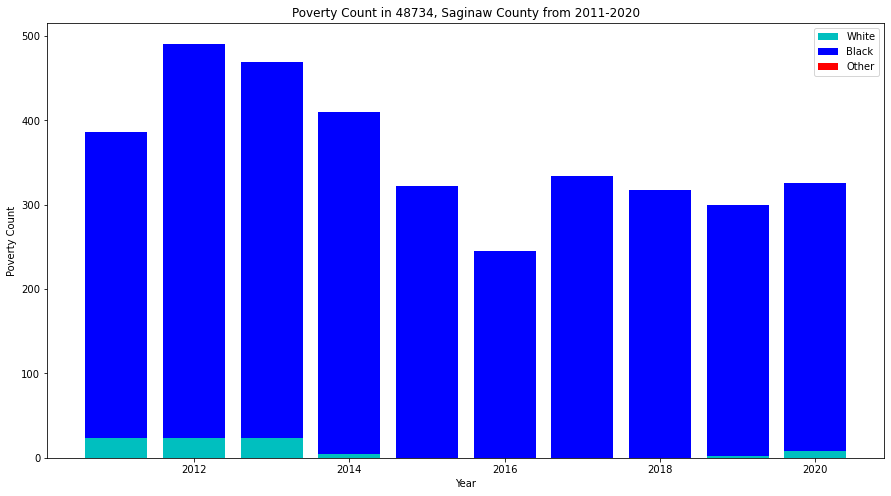

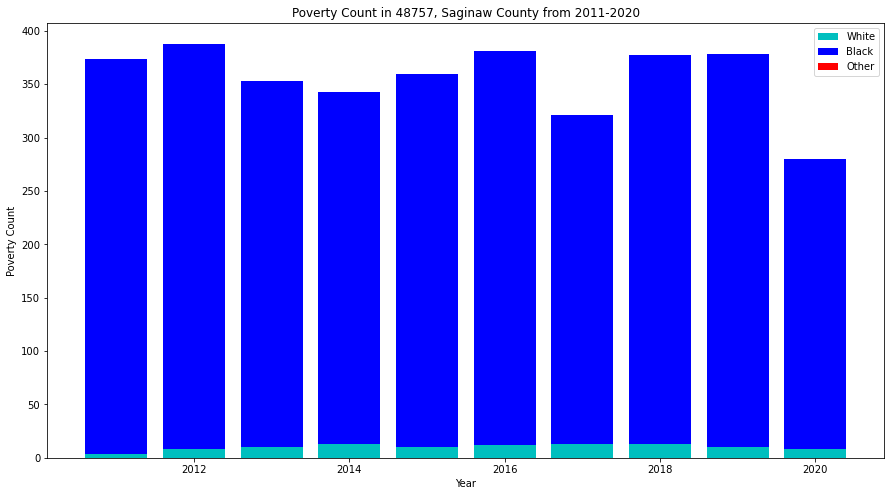

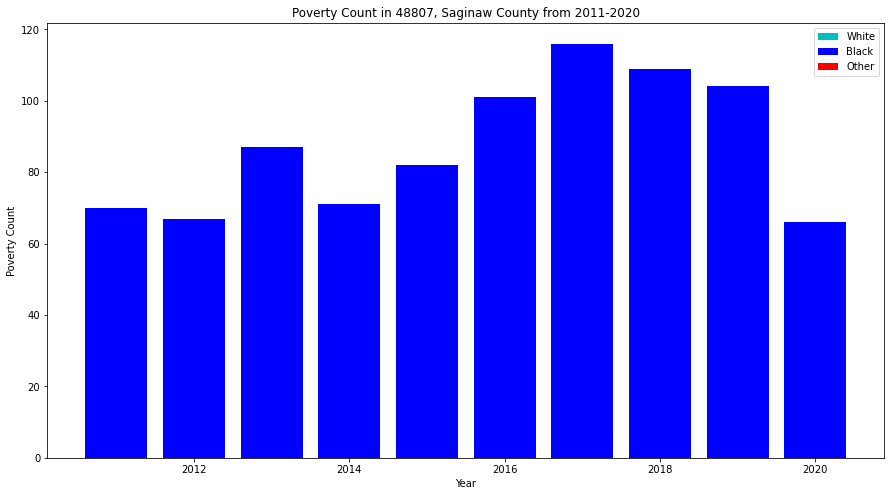

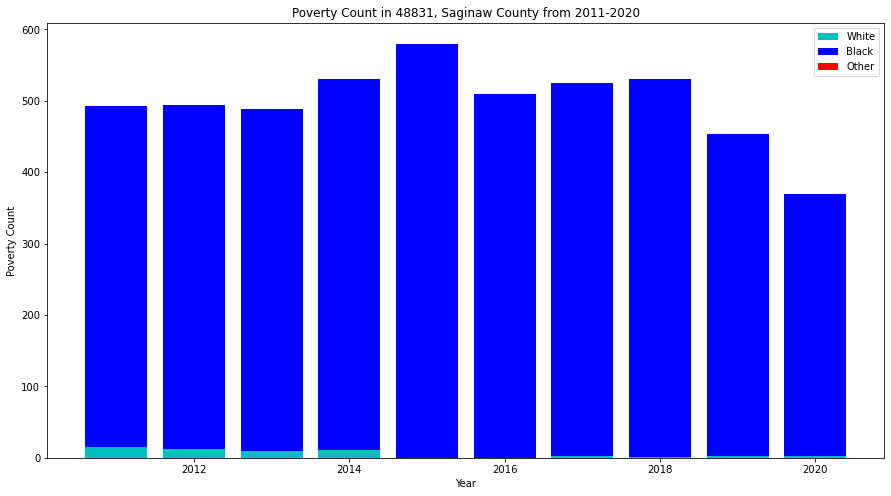

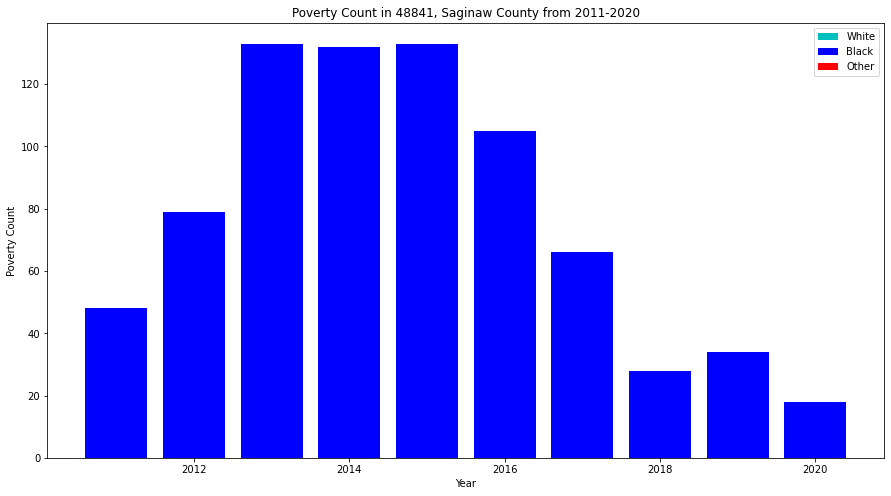

In [37]:
# Time analyses for poverty
fig = plt.figure(figsize = (7,4))
time_analyses_stacked(saginaw_data,"Poverty Count - White","Poverty Count - Black", 
                      "Poverty Count",["White","Black","Other"],"Saginaw")

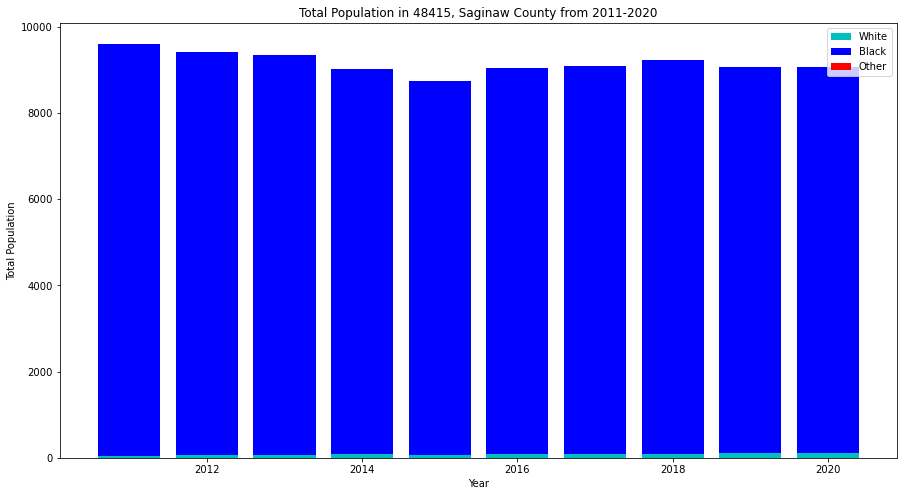

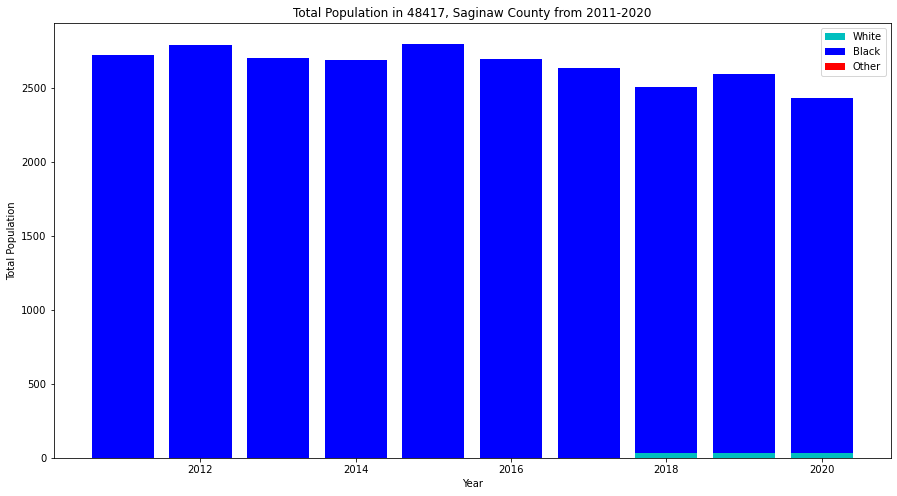

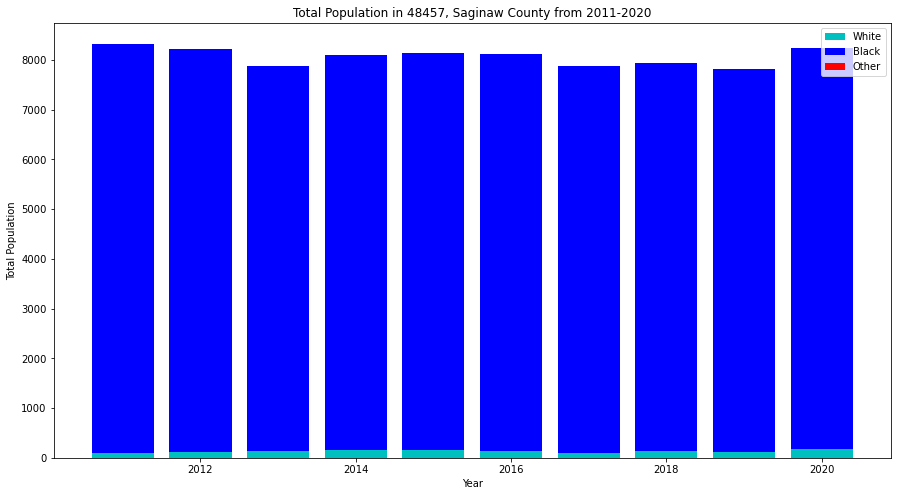

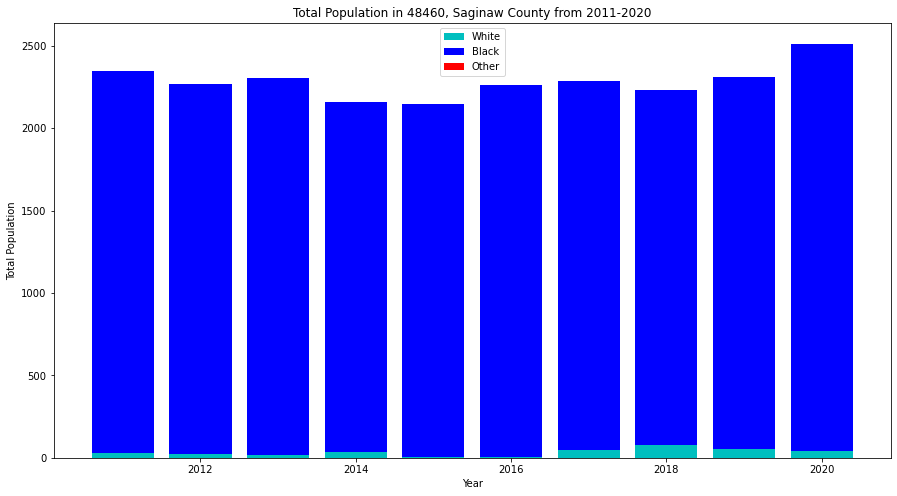

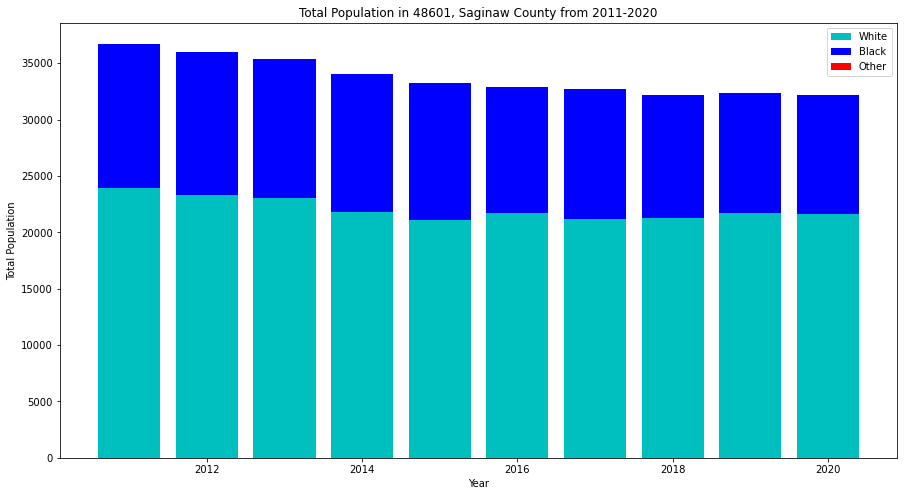

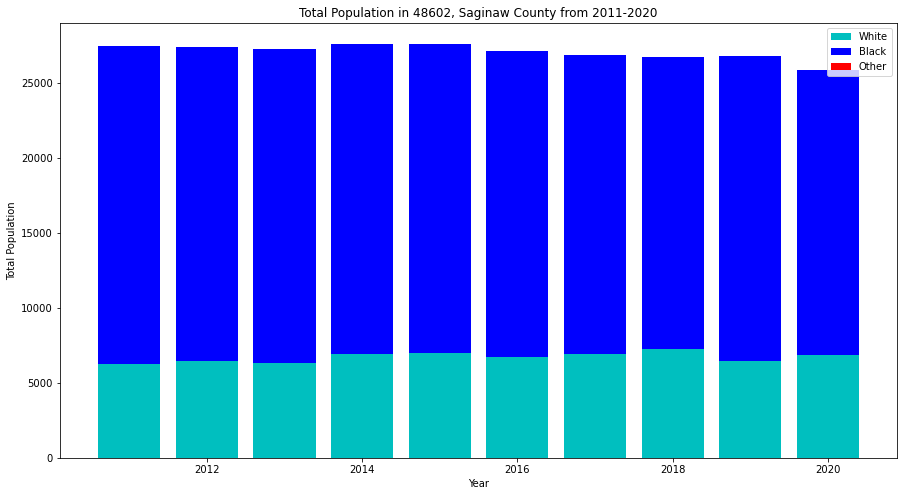

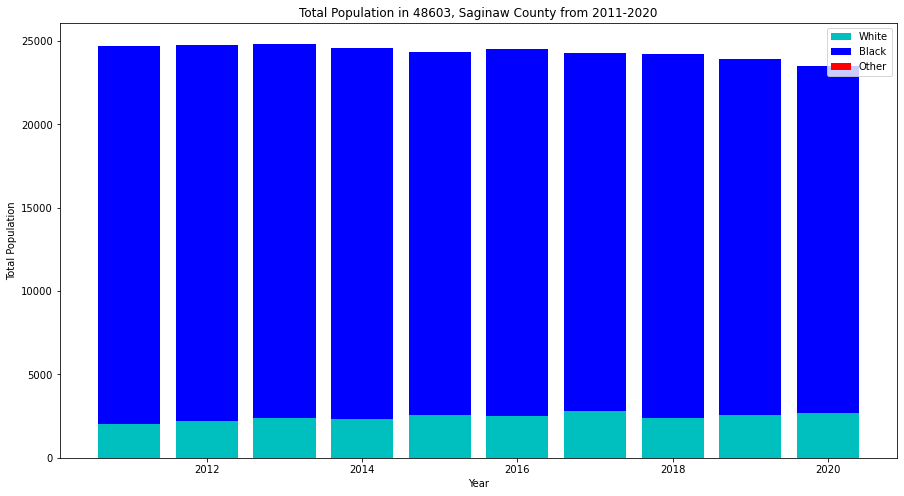

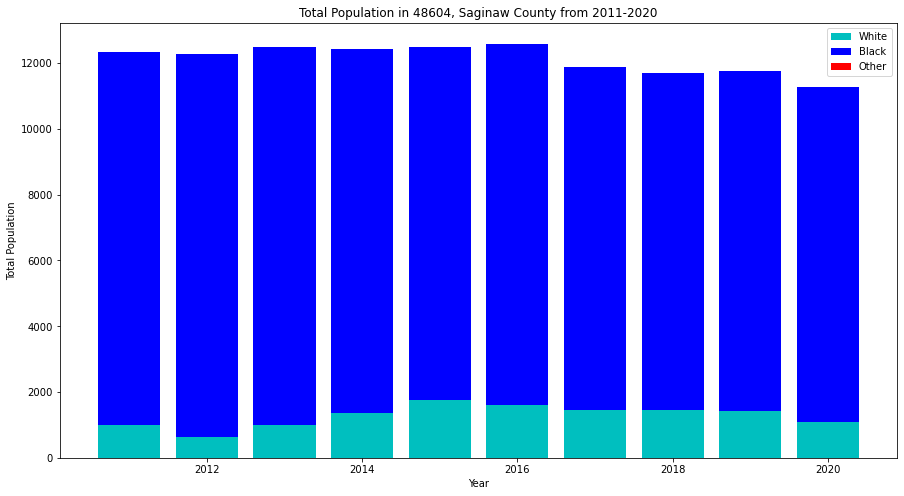

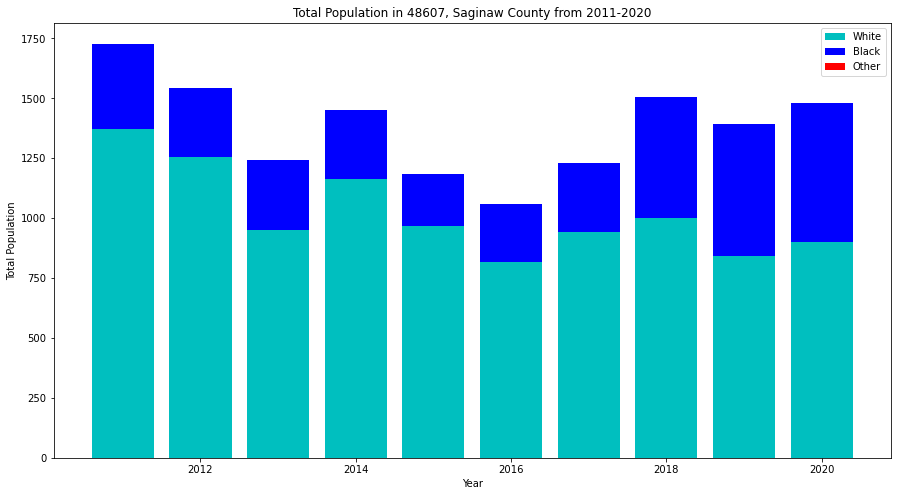

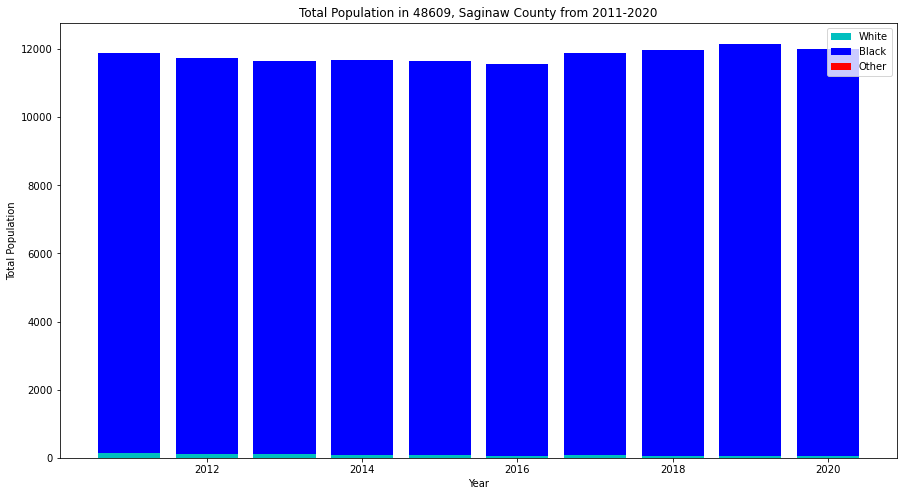

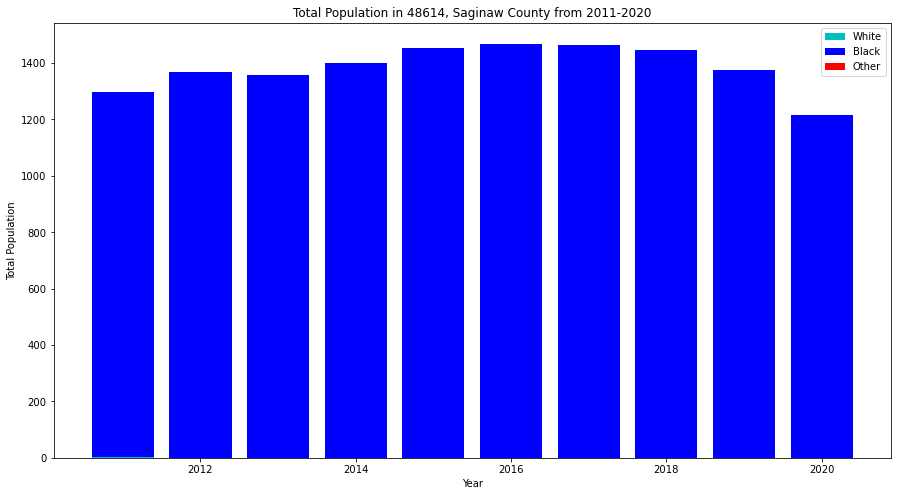

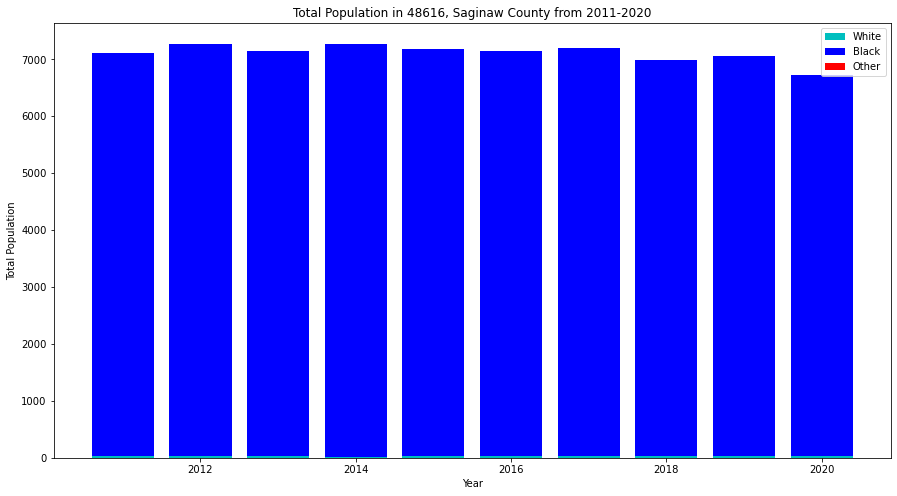

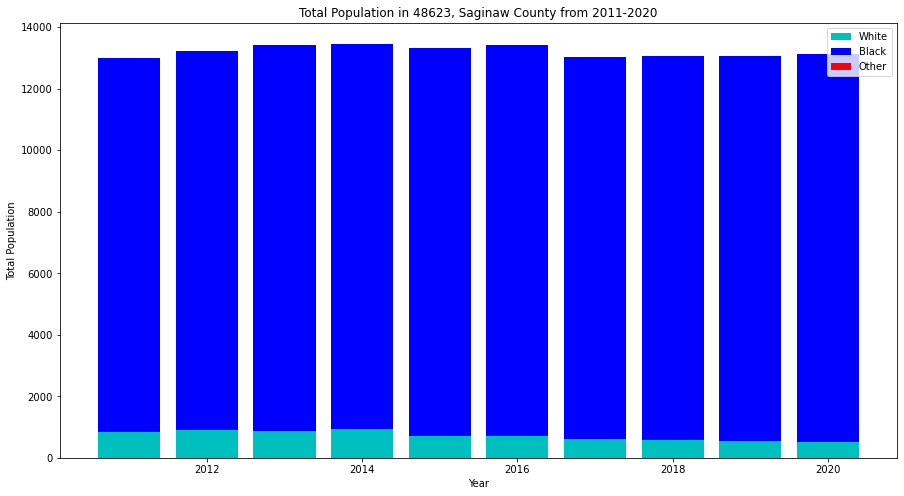

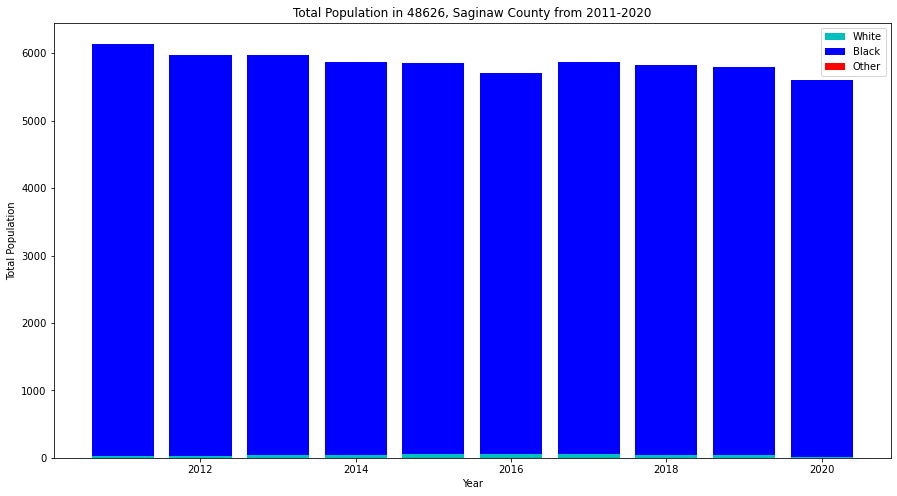

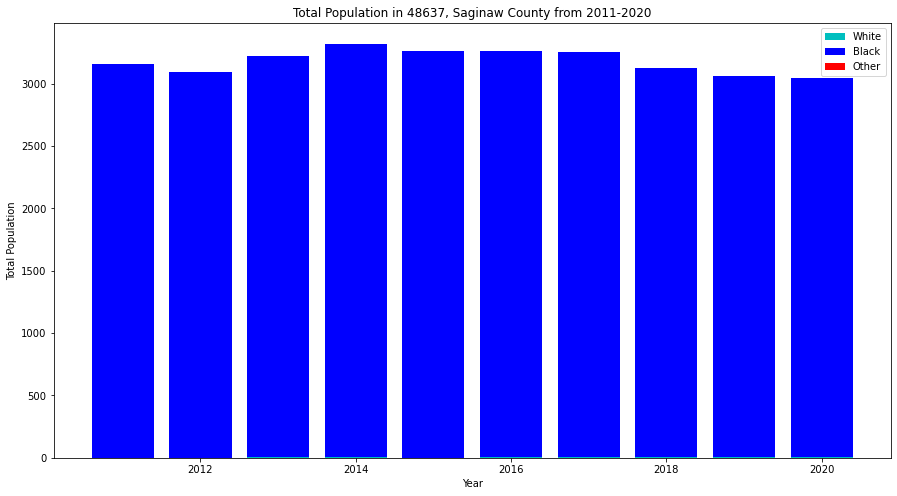

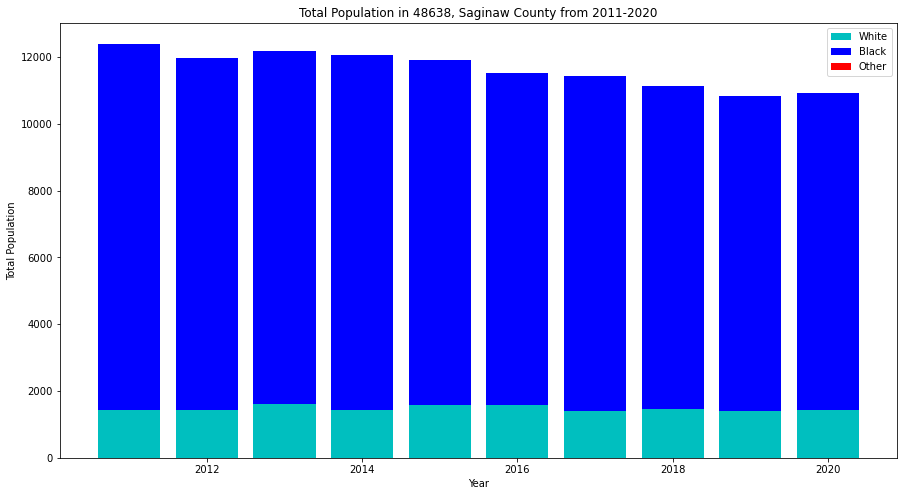

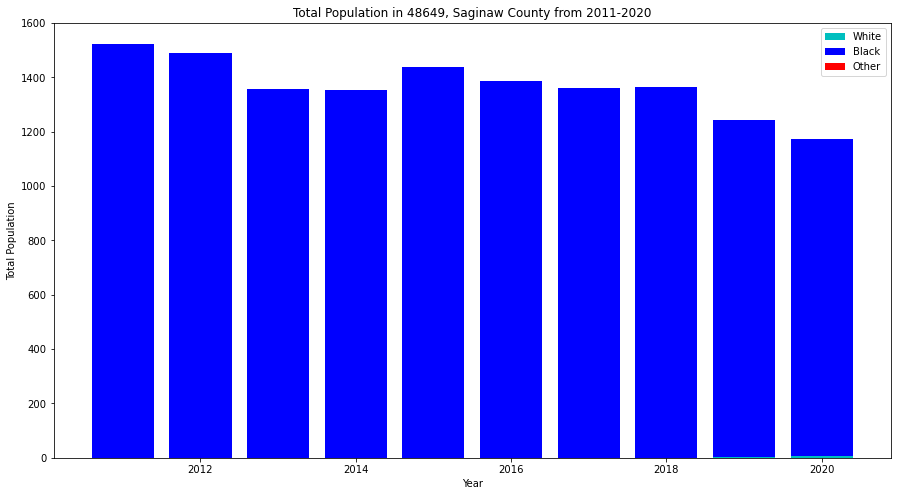

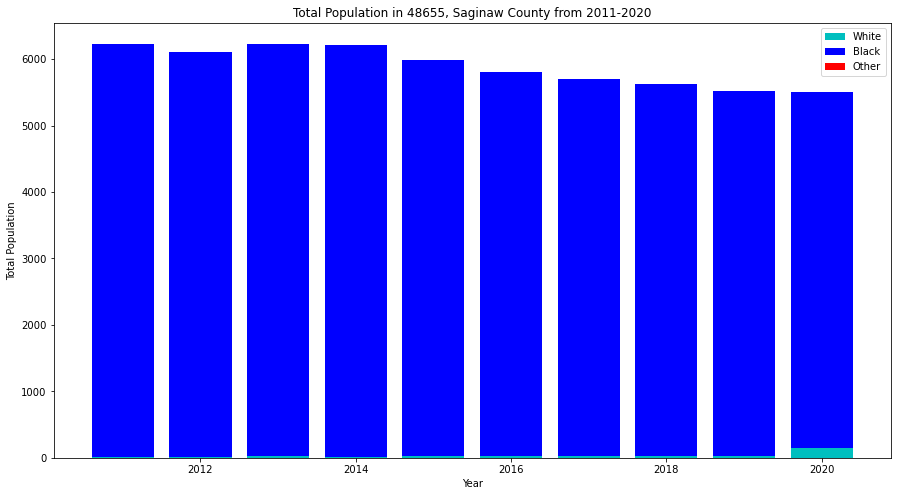

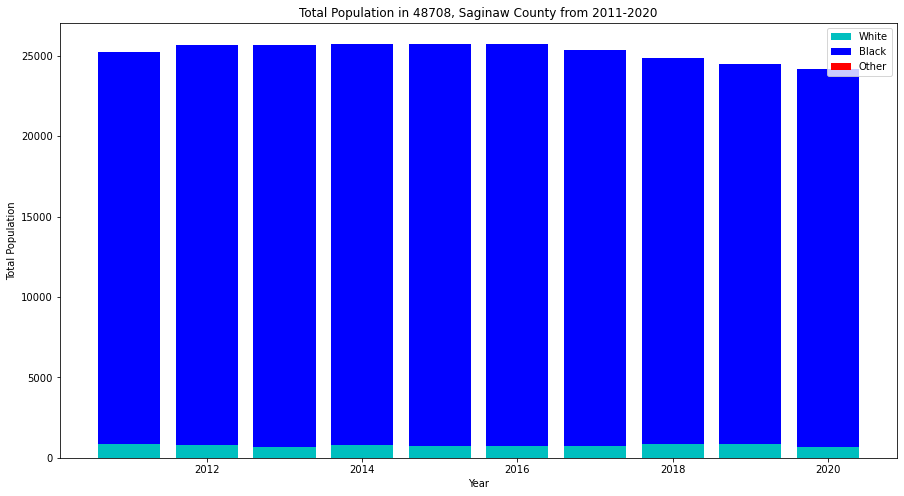

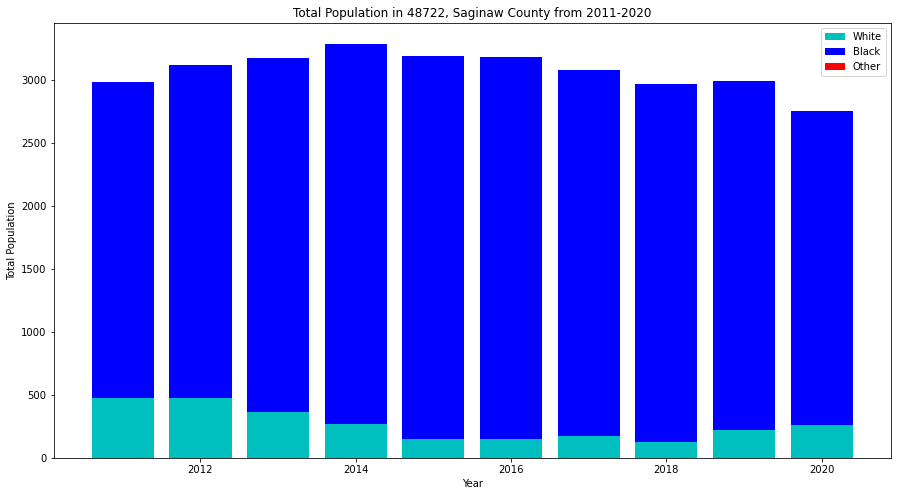

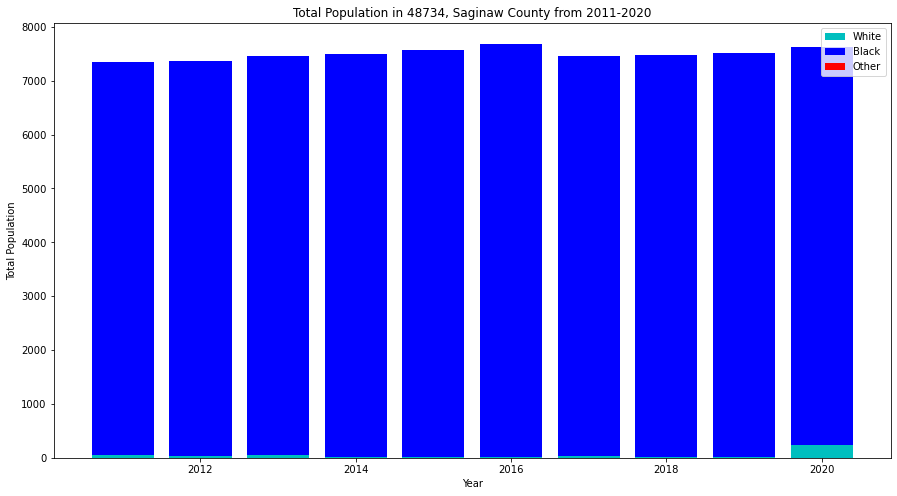

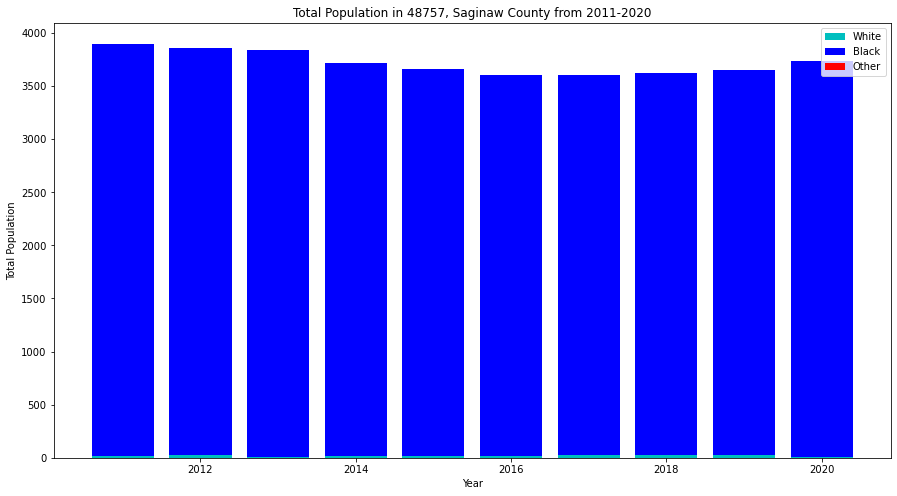

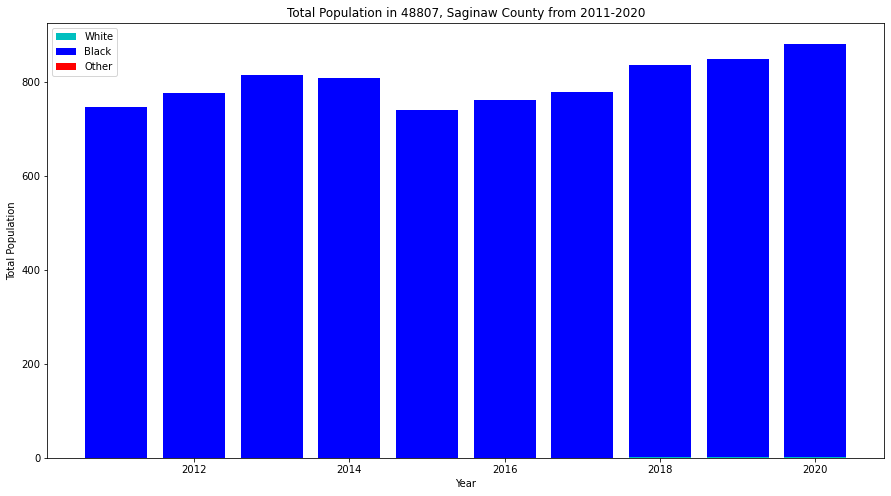

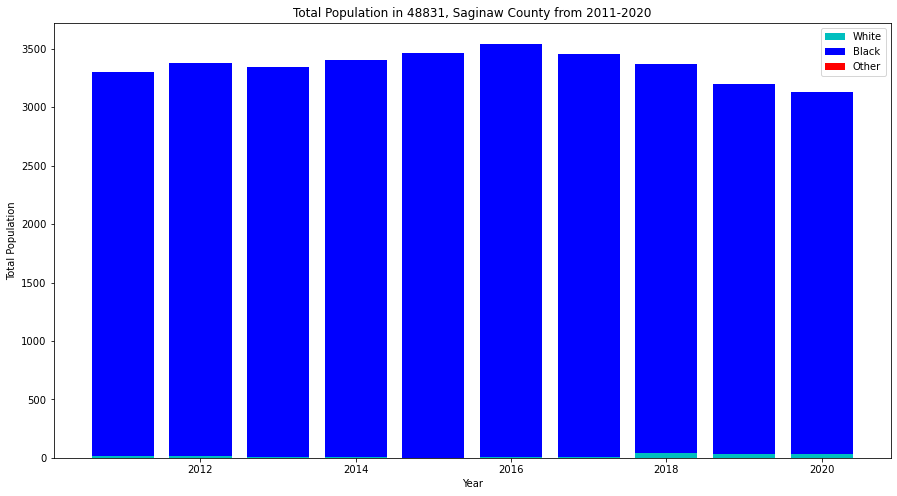

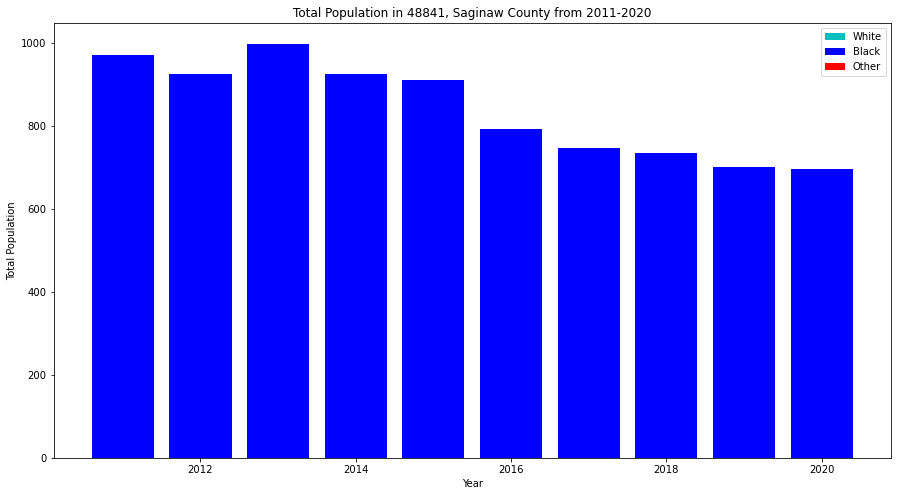

In [38]:
# Time analyses for population
time_analyses_stacked(saginaw_data,"White Population","Black Population", 
                      "Total Population",["White","Black","Other"],"Saginaw")

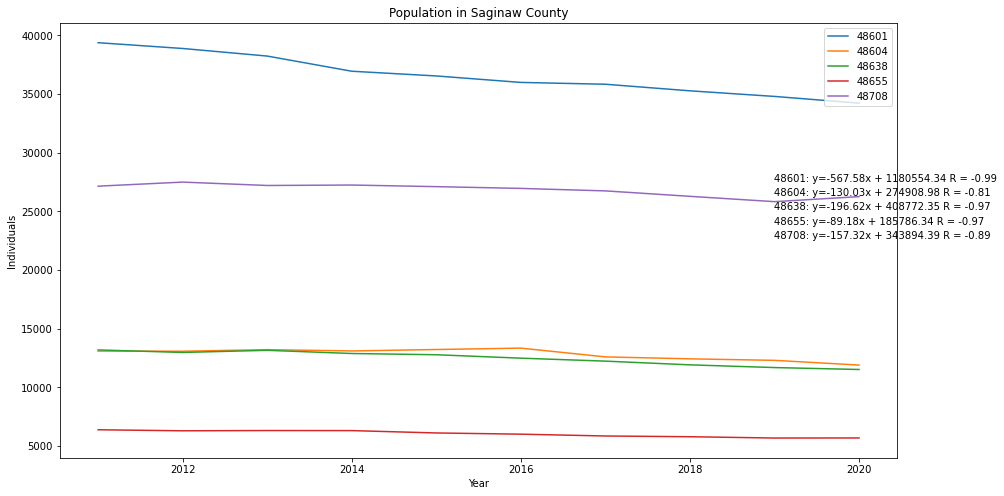

In [39]:
# Create initial plot ---Population
fig = plt.figure(figsize = (15,8))
# Blank lists for different values
r_values=[]
zipcodes=[]
slopes=[]
y_ints= []
# Calculate regression equations for all zipcodes
for zipcode in saginaw_data["Zipcode"].unique():
    filtered = saginaw_data.loc[saginaw_data["Zipcode"] == zipcode]
    filtered = filtered.sort_values(by=["Zipcode","Year"])
    x = filtered["Year"]
    y = filtered["Total Population"]
    
    plt_slope,plt_int,plt_r,plt_p,plt_std_err = linregress(x,y)
    r_values.append(plt_r)
    zipcodes.append(zipcode)
    slopes.append(plt_slope)
    y_ints.append(plt_int)
# Limit the number of zipcodes to those with the most change and plot those
equations_df = pd.DataFrame({"Zipcode":zipcodes,"R":r_values,"Slope":slopes,"Y-intercept":y_ints})
equations_df = equations_df.loc[(abs(equations_df["R"]) > .8) & (abs(equations_df["Slope"])> 80)]
equations_df = pd.merge(equations_df,saginaw_data,on="Zipcode",how="left")
equations_df = equations_df.sort_values(by=["Zipcode","Year"])
ann = 27500
for zipcode in equations_df["Zipcode"].unique():
    filtered_list = equations_df.loc[equations_df["Zipcode"]== zipcode]
    x = filtered_list["Year"]
    y = filtered_list["Total Population"]
    plt.plot(x,y)
    plt.legend(equations_df["Zipcode"].unique(),loc=1)    
    plt.annotate(f"{zipcode}: y={round((filtered_list['Slope'].mean()),2)}x + {round((filtered_list['Y-intercept'].mean()),2)} R = {round((filtered_list['R'].mean()),2)}", xy=(2019,ann))
    ann -= 1200
plt.title("Population in Saginaw County")
plt.xlabel("Year")
plt.ylabel("Individuals")
plt.savefig("output_data/linregress_population_Saginaw.png")
plt.show()

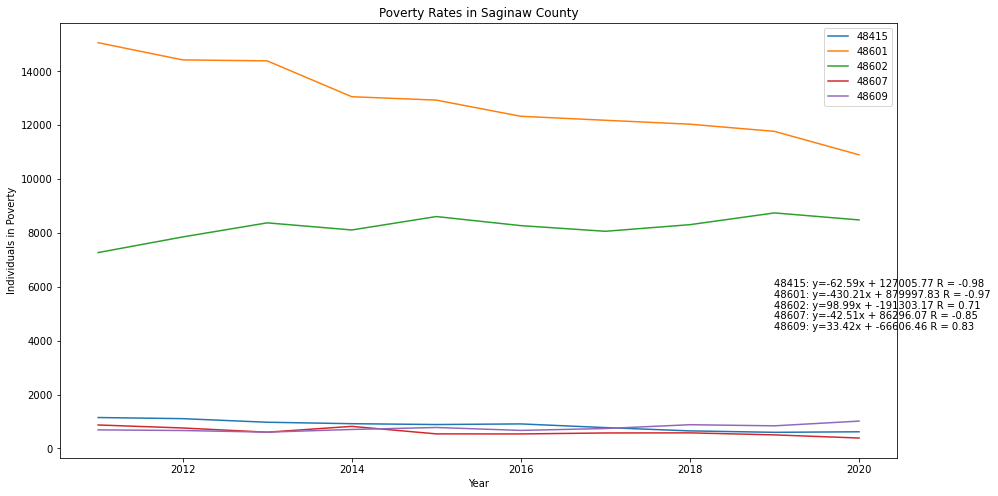

In [40]:
# Create initial plot ---Poverty
fig = plt.figure(figsize = (15,8))
# Blank lists for different values
r_values2=[]
zipcodes2=[]
slopes2=[]
y_ints2= []
# Calculate regression equations for all zipcodes
for zipcode in saginaw_data["Zipcode"].unique():
    filtered = saginaw_data.loc[saginaw_data["Zipcode"] == zipcode]
    filtered = filtered.sort_values(by=["Zipcode","Year"])
    x = filtered["Year"]
    y = filtered["Poverty Count"]
    
    plt_slope,plt_int,plt_r,plt_p,plt_std_err = linregress(x,y)
    r_values2.append(plt_r)
    zipcodes2.append(zipcode)
    slopes2.append(plt_slope)
    y_ints2.append(plt_int)

# Limit the number of zipcodes to those with the most change and plot those
equations2_df = pd.DataFrame({"Zipcode":zipcodes2,"R":r_values2,"Slope":slopes2,"Y-intercept":y_ints2})
equations2_df = equations2_df.loc[(abs(equations2_df["R"]) > .7) & (abs(equations2_df["Slope"])> 25)]
equations2_df = pd.merge(equations2_df,saginaw_data,on="Zipcode",how="left")
equations2_df = equations2_df.sort_values(by=["Zipcode","Year"])
# equations_df
ann = 6000
for zipcode in equations2_df["Zipcode"].unique():
    filtered_list = equations2_df.loc[equations2_df["Zipcode"]== zipcode]
    x = filtered_list["Year"]
    y = filtered_list["Poverty Count"]
    plt.plot(x,y)
    plt.legend(equations2_df["Zipcode"].unique(),loc=1)    
    plt.annotate(f"{zipcode}: y={round((filtered_list['Slope'].mean()),2)}x + {round((filtered_list['Y-intercept'].mean()),2)} R = {round((filtered_list['R'].mean()),2)}", xy=(2019,ann))
    ann -= 400
plt.title("Poverty Rates in Saginaw County")
plt.xlabel("Year")
plt.ylabel("Individuals in Poverty")
plt.savefig("output_data/linregress_poverty_Saginaw.png")
plt.show()

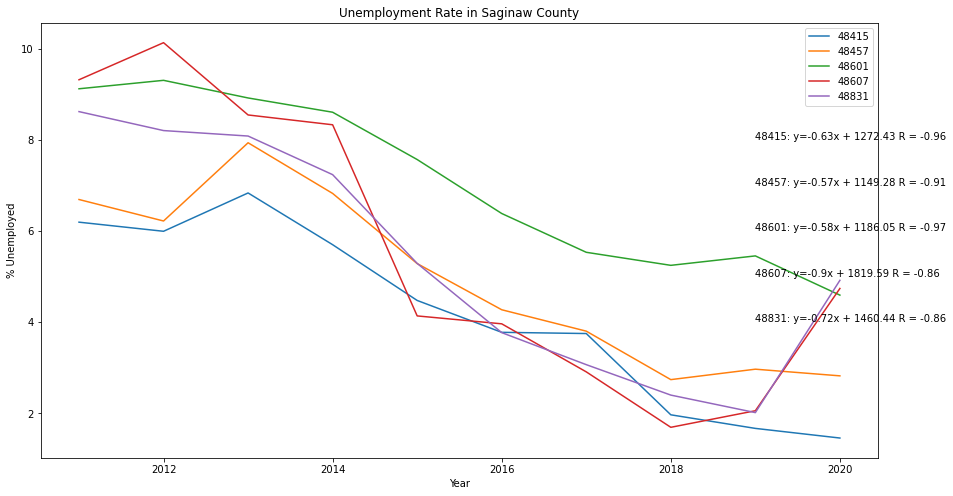

In [41]:
# Create initial plot --Unemployment
fig = plt.figure(figsize = (15,8))
# Blank lists for different values
r_values=[]
zipcodes=[]
slopes=[]
y_ints= []
# Calculate regression equations for all zipcodes
for zipcode in saginaw_data["Zipcode"].unique():
    filtered = saginaw_data.loc[saginaw_data["Zipcode"] == zipcode]
    filtered = filtered.sort_values(by=["Zipcode","Year"])
    x = filtered["Year"]
    y = filtered["% Unemployed"]
    
    plt_slope,plt_int,plt_r,plt_p,plt_std_err = linregress(x,y)
    r_values.append(plt_r)
    zipcodes.append(zipcode)
    slopes.append(plt_slope)
    y_ints.append(plt_int)
# Limit the number of zipcodes to those with the most change and plot those
equations_df = pd.DataFrame({"Zipcode":zipcodes,"R":r_values,"Slope":slopes,"Y-intercept":y_ints})
equations_df = equations_df.loc[(abs(equations_df["R"]) > .7) & (abs(equations_df["Slope"])> .55)]
equations_df = pd.merge(equations_df,saginaw_data,on="Zipcode",how="left")
equations_df = equations_df.sort_values(by=["Zipcode","Year"])
ann = 8
for zipcode in equations_df["Zipcode"].unique():
    filtered_list = equations_df.loc[equations_df["Zipcode"]== zipcode]
    x = filtered_list["Year"]
    y = filtered_list["% Unemployed"]
    plt.plot(x,y)
    plt.legend(equations_df["Zipcode"].unique(),loc=1)    
    plt.annotate(f"{zipcode}: y={round((filtered_list['Slope'].mean()),2)}x + {round((filtered_list['Y-intercept'].mean()),2)} R = {round((filtered_list['R'].mean()),2)}", xy=(2019,ann))
    ann -= 1
plt.title("Unemployment Rate in Saginaw County")
plt.xlabel("Year")
plt.ylabel("% Unemployed")
plt.savefig("output_data/linregress_unemployment_Saginaw.png")
plt.show()

# Combination Visualizations

# GIF Maps

In [42]:
# Add needed module

In [43]:
# Determine what specific visualizations to convert to map GIFs

In [44]:
# Create maps by county, showing individual points per zipcode (heat map)

In [45]:
# Export maps?